In [1]:
# Czym są kolejne df
# df1 - dane początkowe
# df2 - dane df1 bez niepotrzebnych kolumn
# df3 - dane df2 z uproszczonymi adresami (other bądź faktyczny adres, jeśli jest powtarzalny)
# df4 - dane df3 z usuniętymi wartościami skrajnymi
# df5 - dane df4 z usuniętymi polami gdy cena mieszkania z 2 pokojami przewyższa cenę z 3 pokojami
# Co z resztą ilości pokoi? Piętro może robić znaczenie i adres, który się nam zmieni na dzielnicę. Ja bym usunął
# df6 - dane df1 z kolumną prize_per_sq oraz z usuniętymi ekstramalnymi wartościami cenowymi
# df7 - dane df6 z podziałem na dzielnice zamiast adresów
# df8 - dane z df7 rozszerzone o konkatenację miast i dzielnic
# df9 - dane z df8 po usunięciu współrzędnych i ceny

In [2]:
# Wszystkie potrzbne importy w projekcie
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df1 = pd.read_csv("Houses.csv", encoding='windows-1250')
df1.head()

no                                            address      city  floor  \
0   0           Podgórze Zabłocie Stanisława Klimeckiego    Kraków    2.0   
1   1                          Praga-Południe Grochowska  Warszawa    3.0   
2   2                            Krowodrza Czarnowiejska    Kraków    2.0   
3   3                                           Grunwald    Poznań    2.0   
4   4  Ochota Gotowy budynek. Stan deweloperski. Osta...  Warszawa    1.0   

        id   latitude  longitude      price  rooms      sq    year  
0  23918.0  50.049224  19.970379   749000.0    3.0   74.05  2021.0  
1  17828.0  52.249775  21.106886   240548.0    1.0   24.38  2021.0  
2  22784.0  50.066964  19.920025   427000.0    2.0   37.00  1970.0  
3   4315.0  52.404212  16.882542  1290000.0    5.0  166.00  1935.0  
4  11770.0  52.212225  20.972630   996000.0    5.0  105.00  2020.0

In [4]:
df1.shape

(23764, 11)

In [5]:
df2 = df1.drop(["no","latitude", "longitude", "id"], axis='columns')

In [6]:
df2.head(10)

address      city  floor  \
0           Podgórze Zabłocie Stanisława Klimeckiego    Kraków    2.0   
1                          Praga-Południe Grochowska  Warszawa    3.0   
2                            Krowodrza Czarnowiejska    Kraków    2.0   
3                                           Grunwald    Poznań    2.0   
4  Ochota Gotowy budynek. Stan deweloperski. Osta...  Warszawa    1.0   
5                     Nowa Huta Czyżyny ul. Woźniców    Kraków    2.0   
6                       Podgórze Płaszów Koszykarska    Kraków    0.0   
7                                       Mokotów Pory  Warszawa   10.0   
8                                     Ursynów Wyżyny  Warszawa    3.0   
9                                             Bemowo  Warszawa    1.0   

       price  rooms      sq    year  
0   749000.0    3.0   74.05  2021.0  
1   240548.0    1.0   24.38  2021.0  
2   427000.0    2.0   37.00  1970.0  
3  1290000.0    5.0  166.00  1935.0  
4   996000.0    5.0  105.00  2020.0  
5   414600.0    1.0   34.55  2022.0  
6   750000.0    4.0   81.40  2021.0  
7  2890000.0    6.0  280.00  2003.0  
8   615000.0    4.0   63.40  1982.0  
9   429000.0    1.0   40.00  1999.0

In [7]:
df2.isnull().sum()

address    0
city       0
floor      0
price      0
rooms      0
sq         0
year       0
dtype: int64

In [8]:
df3 = df2.copy()
df3['price_per_sq'] = df3['price'] / df3['sq']

In [9]:
df3.head()

address      city  floor  \
0           Podgórze Zabłocie Stanisława Klimeckiego    Kraków    2.0   
1                          Praga-Południe Grochowska  Warszawa    3.0   
2                            Krowodrza Czarnowiejska    Kraków    2.0   
3                                           Grunwald    Poznań    2.0   
4  Ochota Gotowy budynek. Stan deweloperski. Osta...  Warszawa    1.0   

       price  rooms      sq    year  price_per_sq  
0   749000.0    3.0   74.05  2021.0  10114.787306  
1   240548.0    1.0   24.38  2021.0   9866.611977  
2   427000.0    2.0   37.00  1970.0  11540.540541  
3  1290000.0    5.0  166.00  1935.0   7771.084337  
4   996000.0    5.0  105.00  2020.0   9485.714286

In [10]:
len(df3.address.unique())

5419

In [11]:
df3.address = df3.address.apply(lambda x: x.strip())

address_stats = df3.groupby('address')['address'].agg('count').sort_values(ascending=False)
address_stats

address
Mokotów                                          426
Wola                                             384
Nowe Miasto Malta ul. Katowicka                  377
Śródmieście                                      352
Białołęka                                        248
                                                ... 
Praga-Północ Nowa Praga Plac Hallera               1
Praga-Północ Nowa Praga Stefana Starzyńskiego      1
Praga-Północ Nowa Praga Strzelecka                 1
Praga-Północ Nowa Praga Wileńska 16                1
Żoliborz Żoliborz Artystyczny                      1
Name: address, Length: 5392, dtype: int64

In [12]:
len(address_stats[address_stats<=10])

5084

In [13]:
address_stats_less_than_10 = address_stats[address_stats<=10]
df3.address = df3.address.apply(lambda x: 'Other' if x in address_stats_less_than_10 else x)

In [14]:
len(df3.address.unique())

309

In [15]:
df3.price_per_sq.describe()

count     23764.000000
mean      10760.979594
std        3861.161601
min           1.000000
25%        8400.000000
50%        9947.958273
75%       12318.157708
max      138636.363636
Name: price_per_sq, dtype: float64

In [16]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('city'):
        m = np.mean(subdf.price_per_sq)
        st = np.std(subdf.price_per_sq)
        reduced_df = subdf[(subdf.price_per_sq>(m-st)) & (subdf.price_per_sq <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df4 = remove_outliers(df3)
df4.shape

(19306, 8)

In [17]:
#df4 jest bez ekstremalnie malych i ekstremalnie duzych cen ( -4k rows :) )

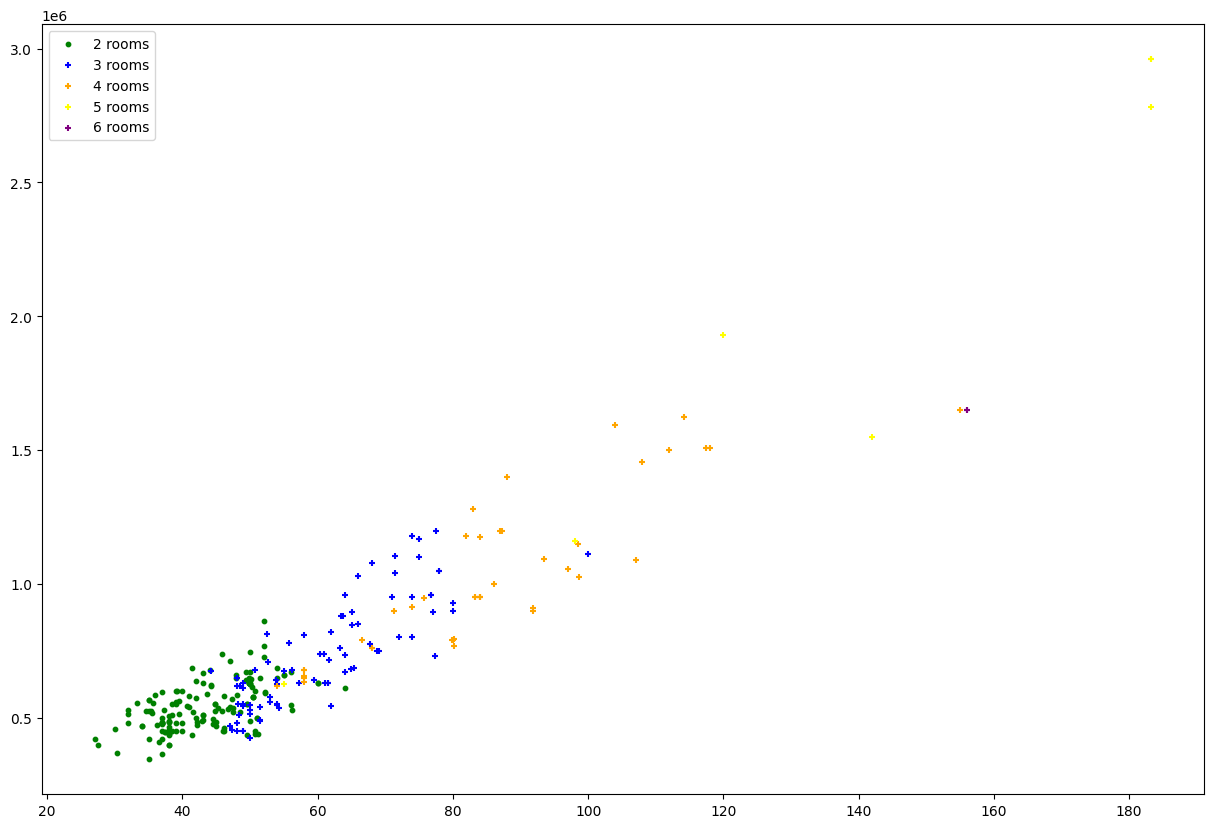

In [18]:
def plot_scatter(df, location, address):
    rooms2 = df[(df.city == location) & (df.rooms == 2) & (df.address == address)]
    rooms3 = df[(df.city == location) & (df.rooms == 3) & (df.address == address)]
    rooms4 = df[(df.city == location) & (df.rooms == 4) & (df.address == address)]
    rooms5 = df[(df.city == location) & (df.rooms == 5) & (df.address == address)]
    rooms6 = df[(df.city == location) & (df.rooms == 6) & (df.address == address)]
    rooms7 = df[(df.city == location) & (df.rooms == 7) & (df.address == address)]
    rooms8 = df[(df.city == location) & (df.rooms == 8) & (df.address == address)]
    rooms9 = df[(df.city == location) & (df.rooms == 9) & (df.address == address)]
    rooms10 = df[(df.city == location) & (df.rooms == 10) & (df.address == address)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(rooms2.sq, rooms2.price, color='green', label='2 rooms', s=10)
    plt.scatter(rooms3.sq, rooms3.price, marker='+', color='blue', label='3 rooms', s=20)
    plt.scatter(rooms4.sq, rooms4.price, marker='+', color='orange', label='4 rooms', s=20)
    plt.scatter(rooms5.sq, rooms5.price, marker='+', color='yellow', label='5 rooms', s=20)
    plt.scatter(rooms6.sq, rooms6.price, marker='+', color='purple', label='6 rooms', s=20)
    plt.legend()

plot_scatter(df4, 'Warszawa', 'Wola')

In [19]:
# bóg wie co tu sie dzieje generalnie
def remove_by_rooms_price_diff(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('city'):
        rooms_stats = {}
        for rooms, rooms_df in location_df.groupby('rooms'):
            rooms_stats[rooms] = {
                'mean':np.mean(rooms_df.price_per_sq),
                'std':np.std(rooms_df.price_per_sq),
                'count':rooms_df.shape[0]
            }
        for rooms, rooms_df in location_df.groupby('rooms'):
            stats = rooms_stats.get(rooms-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, rooms_df[rooms_df.price_per_sq<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [20]:
df5 = remove_by_rooms_price_diff(df4)
df5.shape


(7871, 8)

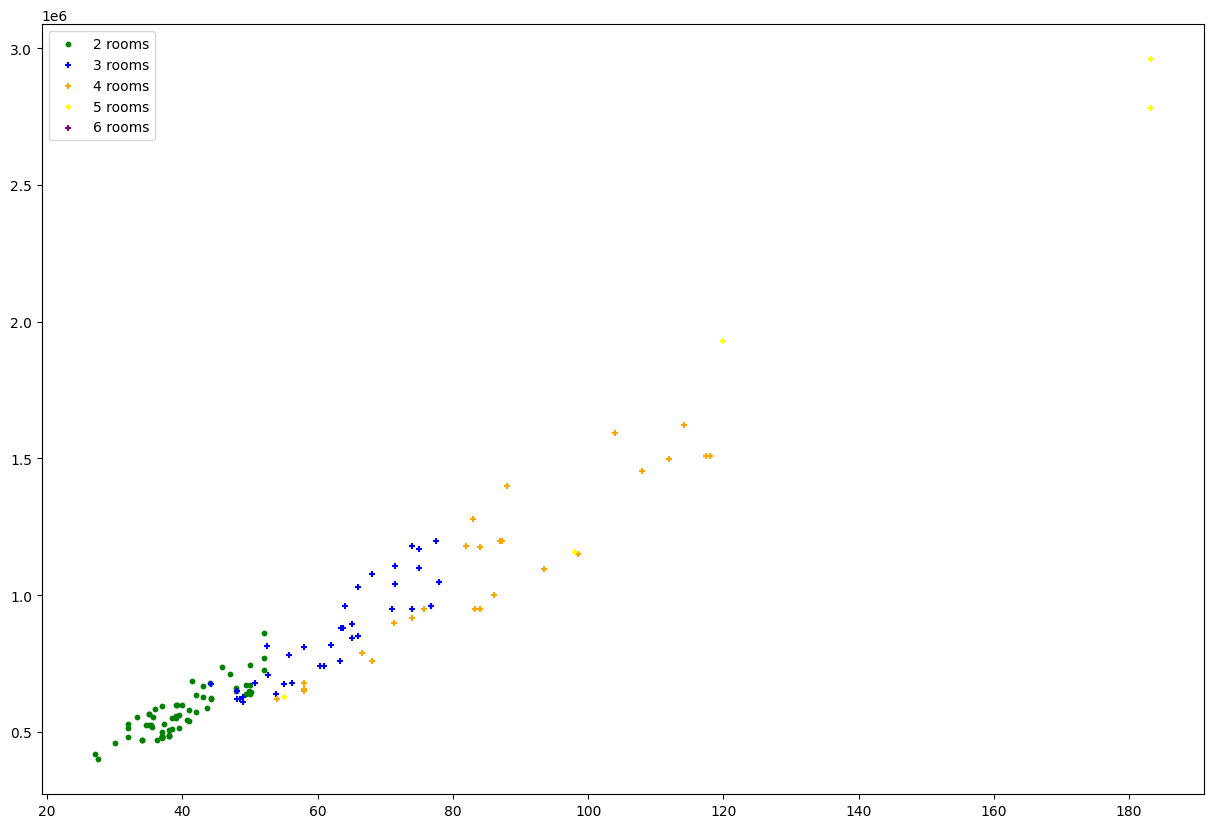

In [21]:
def plot_scatter(df, location, address):
    rooms2 = df[(df.city == location) & (df.rooms == 2) & (df.address == address)]
    rooms3 = df[(df.city == location) & (df.rooms == 3) & (df.address == address)]
    rooms4 = df[(df.city == location) & (df.rooms == 4) & (df.address == address)]
    rooms5 = df[(df.city == location) & (df.rooms == 5) & (df.address == address)]
    rooms6 = df[(df.city == location) & (df.rooms == 6) & (df.address == address)]
    rooms7 = df[(df.city == location) & (df.rooms == 7) & (df.address == address)]
    rooms8 = df[(df.city == location) & (df.rooms == 8) & (df.address == address)]
    rooms9 = df[(df.city == location) & (df.rooms == 9) & (df.address == address)]
    rooms10 = df[(df.city == location) & (df.rooms == 10) & (df.address == address)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(rooms2.sq, rooms2.price, color='green', label='2 rooms', s=10)
    plt.scatter(rooms3.sq, rooms3.price, marker='+', color='blue', label='3 rooms', s=20)
    plt.scatter(rooms4.sq, rooms4.price, marker='+', color='orange', label='4 rooms', s=20)
    plt.scatter(rooms5.sq, rooms5.price, marker='+', color='yellow', label='5 rooms', s=20)
    plt.scatter(rooms6.sq, rooms6.price, marker='+', color='purple', label='6 rooms', s=20)
    plt.legend()

plot_scatter(df5, 'Warszawa', 'Wola')

In [22]:
df5.head(5)

address    city  floor     price  rooms  \
0  Podgórze Zabłocie Stanisława Klimeckiego  Kraków    2.0  749000.0    3.0   
1                                     Other  Kraków    2.0  427000.0    2.0   
2            Nowa Huta Czyżyny ul. Woźniców  Kraków    2.0  414600.0    1.0   
5                              Stare Miasto  Kraków    0.0  949000.0    2.0   
7                                     Other  Kraków    4.0  699000.0    2.0   

      sq    year  price_per_sq  
0  74.05  2021.0  10114.787306  
1  37.00  1970.0  11540.540541  
2  34.55  2022.0  12000.000000  
5  84.80  1936.0  11191.037736  
7  60.00  2010.0  11650.000000

In [23]:
# ta 5ka strasznie dużo zjada tych danych, ja bym na tą chwilę został przy 4ce
df4.shape

(19306, 8)

In [24]:
# Trzeba przygotować nowy df, bo na początku wywaliliśmy koordynacje
# i uprościliśmy zapis adresów
df6 = df1.drop(["no", "id"], axis='columns')
df6['price_per_sq'] = df6['price'] / df6['sq']
df6 = remove_outliers(df6)
# linijka do usuwania danych co zaburzają uczenie przez odstępstwa w cenach, 
# gdzie cena z mniejszą ilością pokoi przewyższą tą z większą ilością
# df6 = remove_by_rooms_price_diff(df6) 

In [25]:
df6.shape

(19306, 10)

In [26]:
def count_addresses_without_neighborhood(df):
    licznik = 0
    for x in df['address']:
        if ("ul." in x) or (any(letter.isdigit() for letter in x)):
            licznik+=1
    return licznik

In [27]:
count_addresses_without_neighborhood(df6)

5511

In [28]:
len(df6.address.unique())

4616

In [29]:
print(f'Krk:{len(df6[df6.city == "Kraków"].address.unique())}')
print(f'WWa:{len(df6[df6.city == "Warszawa"].address.unique())}')
print(f'Pzn:{len(df6[df6.city == "Poznań"].address.unique())}')

Krk:1587
WWa:2504
Pzn:528


In [30]:
# df6.to_csv("temp_df2.csv", index=False, encoding='utf-8') # eksport df6

In [31]:
df7 =  pd.read_csv("neighborhood_df.csv", encoding="utf-8")
# df7 =  pd.read_csv("neighborhood2_df.csv", encoding="utf-8") # testowe wykonanie dla df obciętego o count_addresses_without_neighborhood()

In [32]:
df7.head(5)

address    city  floor   latitude  longitude     price  rooms     sq  \
0   Podgórze  Kraków    2.0  50.049224  19.970379  749000.0    3.0  74.05   
1  Krowodrza  Kraków    2.0  50.066964  19.920025  427000.0    2.0  37.00   
2  Nowa Huta  Kraków    2.0  50.046943  19.997153  414600.0    1.0  34.55   
3   Podgórze  Kraków    0.0  50.049893  19.990603  750000.0    4.0  81.40   
4  Nowa Huta  Kraków    1.0  50.046943  19.997153  756707.4    4.0  82.43   

     year  price_per_sq  
0  2021.0  10114.787306  
1  1970.0  11540.540541  
2  2022.0  12000.000000  
3  2021.0   9213.759214  
4  2021.0   9180.000000

In [33]:
df7.shape

(19303, 10)

In [34]:
# Trochę się udało poprawić wyniki :)
# To są unikalne dzielnice dla każdego miasta
print(f'Krk:{len(df7[df7.city == "Kraków"].address.unique())}')
print(f'WWa:{len(df7[df7.city == "Warszawa"].address.unique())}')
print(f'Pzn:{len(df7[df7.city == "Poznań"].address.unique())}')

Krk:17
WWa:18
Pzn:5


In [35]:
print("Krw")
print(df7[(df7.city == "Kraków")].address.unique())
print("Wwa")
print(df7[(df7.city == "Warszawa")].address.unique())
print("Pzn")
print(df7[(df7.city == "Poznań")].address.unique())

Krw
['Podgórze' 'Krowodrza' 'Nowa Huta' 'Stare Miasto' 'Prądnik Biały'
 'Dębniki' 'Zwierzyniec' 'Podgórze Duchackie' 'Grzegórzki' 'Bronowice'
 'Prądnik Czerwony' 'Bieżanów-Prokocim' 'Mistrzejowice'
 'Łagiewniki-Borek Fałęcki' 'Wzgórza Krzesławickie' 'Bieńczyce'
 'Swoszowice']
Wwa
['Praga-Południe' 'Ochota' 'Mokotów' 'Ursynów' 'Bemowo' 'Śródmieście'
 'Wola' 'Białołęka' 'Wilanów' 'Włochy' 'Żoliborz' 'Ursus' 'Bielany'
 'Targówek' 'Praga-Północ' 'Wesoła' 'Rembertów' 'Wawer']
Pzn
['Grunwald' 'Nowe Miasto' 'Stare Miasto' 'Jeżyce' 'Wilda']


In [36]:
print("Kraków\n------")
krakow_stats = df7.loc[df7['city'] == 'Kraków', 'address'].value_counts().sort_values(ascending=False)
krakow_stats

Kraków
------


address
Podgórze                    1062
Nowa Huta                   1055
Prądnik Biały                787
Podgórze Duchackie           655
Dębniki                      637
Grzegórzki                   574
Mistrzejowice                556
Krowodrza                    404
Stare Miasto                 396
Bieżanów-Prokocim            368
Prądnik Czerwony             345
Bronowice                    333
Zwierzyniec                  140
Łagiewniki-Borek Fałęcki     105
Bieńczyce                     82
Wzgórza Krzesławickie         37
Swoszowice                    19
Name: count, dtype: int64

In [37]:
print("Warszawa\n------")
warszawa_stats = df7.loc[df7['city'] == 'Warszawa', 'address'].value_counts().sort_values(ascending=False)
warszawa_stats

Warszawa
------


address
Mokotów           1391
Wola              1158
Praga-Południe     899
Bemowo             751
Białołęka          634
Śródmieście        501
Bielany            480
Ursynów            472
Ochota             418
Targówek           339
Wilanów            303
Ursus              270
Praga-Północ       255
Żoliborz           241
Włochy             205
Wawer              122
Rembertów           42
Wesoła              16
Name: count, dtype: int64

In [38]:
print("Poznań\n------")
poznan_stats = df7.loc[df7['city'] == 'Poznań', 'address'].value_counts().sort_values(ascending=False)
poznan_stats

Poznań
------


address
Nowe Miasto     951
Grunwald        879
Stare Miasto    829
Jeżyce          459
Wilda           133
Name: count, dtype: int64

In [39]:
# funkcja do dodawnia miasta ze względu na to, że nazwy dzielnic między miastami się powtarzają
dummies = pd.get_dummies(df7.city)
dummies.head(3)

Kraków  Poznań  Warszawa
0    True   False     False
1    True   False     False
2    True   False     False

In [40]:
df8 = pd.concat([df7,dummies],axis='columns')
df8.head(4)

address    city  floor   latitude  longitude     price  rooms     sq  \
0   Podgórze  Kraków    2.0  50.049224  19.970379  749000.0    3.0  74.05   
1  Krowodrza  Kraków    2.0  50.066964  19.920025  427000.0    2.0  37.00   
2  Nowa Huta  Kraków    2.0  50.046943  19.997153  414600.0    1.0  34.55   
3   Podgórze  Kraków    0.0  50.049893  19.990603  750000.0    4.0  81.40   

     year  price_per_sq  Kraków  Poznań  Warszawa  
0  2021.0  10114.787306    True   False     False  
1  1970.0  11540.540541    True   False     False  
2  2022.0  12000.000000    True   False     False  
3  2021.0   9213.759214    True   False     False

In [41]:
dummies = pd.get_dummies(df7.address)
dummies.head(3)

Bemowo  Białołęka  Bielany  Bieńczyce  Bieżanów-Prokocim  Bronowice  \
0   False      False    False      False              False      False   
1   False      False    False      False              False      False   
2   False      False    False      False              False      False   

   Dębniki  Grunwald  Grzegórzki  Jeżyce  ...  Wesoła  Wilanów  Wilda   Wola  \
0    False     False       False   False  ...   False    False  False  False   
1    False     False       False   False  ...   False    False  False  False   
2    False     False       False   False  ...   False    False  False  False   

   Wzgórza Krzesławickie  Włochy  Zwierzyniec  Łagiewniki-Borek Fałęcki  \
0                  False   False        False                     False   
1                  False   False        False                     False   
2                  False   False        False                     False   

   Śródmieście  Żoliborz  
0        False     False  
1        False     False  
2        False     False  

[3 rows x 39 columns]

In [42]:
df8 = pd.concat([df8,dummies],axis='columns')
df8.head(3)

address    city  floor   latitude  longitude     price  rooms     sq  \
0   Podgórze  Kraków    2.0  50.049224  19.970379  749000.0    3.0  74.05   
1  Krowodrza  Kraków    2.0  50.066964  19.920025  427000.0    2.0  37.00   
2  Nowa Huta  Kraków    2.0  50.046943  19.997153  414600.0    1.0  34.55   

     year  price_per_sq  ...  Wesoła  Wilanów  Wilda   Wola  \
0  2021.0  10114.787306  ...   False    False  False  False   
1  1970.0  11540.540541  ...   False    False  False  False   
2  2022.0  12000.000000  ...   False    False  False  False   

   Wzgórza Krzesławickie  Włochy  Zwierzyniec  Łagiewniki-Borek Fałęcki  \
0                  False   False        False                     False   
1                  False   False        False                     False   
2                  False   False        False                     False   

   Śródmieście  Żoliborz  
0        False     False  
1        False     False  
2        False     False  

[3 rows x 52 columns]

In [43]:
df9 = df8.drop('address',axis='columns')
df9 = df9.drop('city', axis='columns')
df9.head(3)

floor   latitude  longitude     price  rooms     sq    year  price_per_sq  \
0    2.0  50.049224  19.970379  749000.0    3.0  74.05  2021.0  10114.787306   
1    2.0  50.066964  19.920025  427000.0    2.0  37.00  1970.0  11540.540541   
2    2.0  50.046943  19.997153  414600.0    1.0  34.55  2022.0  12000.000000   

   Kraków  Poznań  ...  Wesoła  Wilanów  Wilda   Wola  Wzgórza Krzesławickie  \
0    True   False  ...   False    False  False  False                  False   
1    True   False  ...   False    False  False  False                  False   
2    True   False  ...   False    False  False  False                  False   

   Włochy  Zwierzyniec  Łagiewniki-Borek Fałęcki  Śródmieście  Żoliborz  
0   False        False                     False        False     False  
1   False        False                     False        False     False  
2   False        False                     False        False     False  

[3 rows x 50 columns]

In [44]:
X = df9.drop(['price',"latitude", "longitude", "price_per_sq"], axis='columns')
X_columns = X.columns
X.head()

floor  rooms     sq    year  Kraków  Poznań  Warszawa  Bemowo  Białołęka  \
0    2.0    3.0  74.05  2021.0    True   False     False   False      False   
1    2.0    2.0  37.00  1970.0    True   False     False   False      False   
2    2.0    1.0  34.55  2022.0    True   False     False   False      False   
3    0.0    4.0  81.40  2021.0    True   False     False   False      False   
4    1.0    4.0  82.43  2021.0    True   False     False   False      False   

   Bielany  ...  Wesoła  Wilanów  Wilda   Wola  Wzgórza Krzesławickie  Włochy  \
0    False  ...   False    False  False  False                  False   False   
1    False  ...   False    False  False  False                  False   False   
2    False  ...   False    False  False  False                  False   False   
3    False  ...   False    False  False  False                  False   False   
4    False  ...   False    False  False  False                  False   False   

   Zwierzyniec  Łagiewniki-Borek Fałęcki  Śródmieście  Żoliborz  
0        False                     False        False     False  
1        False                     False        False     False  
2        False                     False        False     False  
3        False                     False        False     False  
4        False                     False        False     False  

[5 rows x 46 columns]

In [45]:
y = df9.price
y.head()

0    749000.0
1    427000.0
2    414600.0
3    750000.0
4    756707.4
Name: price, dtype: float64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

In [47]:
X_train

floor  rooms     sq    year  Kraków  Poznań  Warszawa  Bemowo  \
9277     3.0    2.0  51.90  2010.0   False    True     False   False   
17367    7.0    2.0  64.00  1992.0   False   False      True   False   
14818    3.0    3.0  79.00  1938.0   False   False      True   False   
7359     5.0    3.0  61.03  2022.0    True   False     False   False   
5125     0.0    4.0  65.35  2020.0    True   False     False   False   
...      ...    ...    ...     ...     ...     ...       ...     ...   
9372     2.0    2.0  44.95  2022.0   False    True     False   False   
7291     3.0    3.0  77.00  1885.0    True   False     False   False   
17728    6.0    1.0  31.01  2017.0   False   False      True   False   
7293     0.0    2.0  43.00  1950.0    True   False     False   False   
17673    1.0    1.0  19.00  1955.0   False   False      True   False   

       Białołęka  Bielany  ...  Wesoła  Wilanów  Wilda   Wola  \
9277       False    False  ...   False    False  False  False   
17367      False    False  ...   False    False  False  False   
14818      False    False  ...   False    False  False  False   
7359       False    False  ...   False    False  False  False   
5125       False    False  ...   False    False  False  False   
...          ...      ...  ...     ...      ...    ...    ...   
9372       False    False  ...   False    False  False  False   
7291       False    False  ...   False    False  False  False   
17728      False    False  ...   False    False  False   True   
7293       False    False  ...   False    False  False  False   
17673      False    False  ...   False    False  False  False   

       Wzgórza Krzesławickie  Włochy  Zwierzyniec  Łagiewniki-Borek Fałęcki  \
9277                   False   False        False                     False   
17367                  False   False        False                     False   
14818                  False   False        False                     False   
7359                   False   False        False                     False   
5125                   False   False        False                     False   
...                      ...     ...          ...                       ...   
9372                   False   False        False                     False   
7291                   False   False        False                     False   
17728                  False   False        False                     False   
7293                   False   False        False                     False   
17673                  False   False        False                     False   

       Śródmieście  Żoliborz  
9277         False     False  
17367        False     False  
14818        False     False  
7359         False     False  
5125         False     False  
...            ...       ...  
9372         False     False  
7291         False     False  
17728        False     False  
7293         False     False  
17673         True     False  

[15442 rows x 46 columns]

In [48]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8786413553147192

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87867005, 0.87700863, 0.87467615, 0.87276827, 0.87010141,
       0.87491001, 0.87086454, 0.8765525 , 0.88776855, 0.88496819])

In [50]:
X.head(3)

floor  rooms     sq    year  Kraków  Poznań  Warszawa  Bemowo  Białołęka  \
0    2.0    3.0  74.05  2021.0    True   False     False   False      False   
1    2.0    2.0  37.00  1970.0    True   False     False   False      False   
2    2.0    1.0  34.55  2022.0    True   False     False   False      False   

   Bielany  ...  Wesoła  Wilanów  Wilda   Wola  Wzgórza Krzesławickie  Włochy  \
0    False  ...   False    False  False  False                  False   False   
1    False  ...   False    False  False  False                  False   False   
2    False  ...   False    False  False  False                  False   False   

   Zwierzyniec  Łagiewniki-Borek Fałęcki  Śródmieście  Żoliborz  
0        False                     False        False     False  
1        False                     False        False     False  
2        False                     False        False     False  

[3 rows x 46 columns]

In [51]:
# funkcja do szacowania cen
def predict_price(city, district, floor, rooms, sq, year, model):
    district_index = np.where(X.columns==district)[0][0]
    city_index = np.where(X.columns==city)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = floor
    x[1] = rooms
    x[2] = sq
    x[3] = year
    if district_index >= 0:
        x[district_index] = 1
    if city_index >= 0:
        x[city_index] = 1
    return model.predict([x])[0]

In [52]:
# tutaj jest dziwny komunikat, ale ogólnie to sie wykonuje
# cena originalna: 749000.0
predict_price('Kraków','Podgórze', 2.0, 3.0,	74.05, 2021.0, lr_clf)

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


760484.0399638254

In [53]:
predict_price('Kraków','Nowa Huta', 2.0, 1.0, 34.55, 2022.0, lr_clf)

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


366103.76241259417

In [54]:
print(X.columns)
np.where(X.columns=="Podgórze")[0][0]

Index(['floor', 'rooms', 'sq', 'year', 'Kraków', 'Poznań', 'Warszawa',
       'Bemowo', 'Białołęka', 'Bielany', 'Bieńczyce', 'Bieżanów-Prokocim',
       'Bronowice', 'Dębniki', 'Grunwald', 'Grzegórzki', 'Jeżyce', 'Krowodrza',
       'Mistrzejowice', 'Mokotów', 'Nowa Huta', 'Nowe Miasto', 'Ochota',
       'Podgórze', 'Podgórze Duchackie', 'Praga-Południe', 'Praga-Północ',
       'Prądnik Biały', 'Prądnik Czerwony', 'Rembertów', 'Stare Miasto',
       'Swoszowice', 'Targówek', 'Ursus', 'Ursynów', 'Wawer', 'Wesoła',
       'Wilanów', 'Wilda', 'Wola', 'Wzgórza Krzesławickie', 'Włochy',
       'Zwierzyniec', 'Łagiewniki-Borek Fałęcki', 'Śródmieście', 'Żoliborz'],
      dtype='object')


23

In [55]:
X_train.shape

(15442, 46)

In [56]:
weights = [1 for i in range(len(X_train.columns))]

In [57]:
def change_weight(column_name, new_weight):
    index = np.where(X.columns==column_name)[0][0]
    weights[index] = new_weight

In [58]:
# manupulacja wagami miast
for city in ["Kraków", "Warszawa","Poznań"]:
    change_weight(city, 4) 
weights

[1,
 1,
 1,
 1,
 4,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [59]:
# manupulacja wagami dzielnic
for index in range(6, len(X.columns)):
    weights[index] = 3

In [75]:
# Ustawienie wszystkich wag na 1
weights = [1 for i in range(len(X_train.columns))]

temp_weights = weights.copy()
samples_splited_by_weight = []

min_weight = 9
max_weight = 10
# Ustawienie zakresu wag dla testów
for weight_value in range(min_weight, max_weight+1, 1):
    # Nazwy próbek
    # Tu można dodawać swoje propozycje. Żeby nie testować wszystkich, można zakomentować niepotrzebne
    # Jako klucz podaje się zbiór próbek oddzielonych '_', a jako wartość wagi
    sample_names = {
        "Cities": [weight_value], 
        "Districts": [weight_value], 
        "Params": [weight_value],
        "Params_Cities1": [weight_value-1, weight_value+1], 
        "Params_Districts1": [weight_value-1, weight_value+1], 
        "Cities_Districts1": [weight_value-1, weight_value+1],
        "Params_Cities2": [weight_value+1, weight_value-1], 
        "Params_Districts2": [weight_value+1, weight_value-1], 
        "Cities_Districts2": [weight_value+1, weight_value-1],
        "Sq": [weight_value],
        "Rooms": [weight_value],
        "Floor": [weight_value],
        "Year": [weight_value],
        "Sq_Districts1": [weight_value-1, weight_value+1],
        "Sq_Districts2": [weight_value+1, weight_value-1],
        "Sq_Cities1": [weight_value-1, weight_value+1],
        "Sq_Cities2": [weight_value+1, weight_value-1],
        "Year_Districts1": [weight_value-1, weight_value+1],
        "Year_Districts2": [weight_value+1, weight_value-1],
        "Year_Cities1": [weight_value-1, weight_value+1],
        "Year_Cities2": [weight_value+1, weight_value-1],
    }
    samples_splited_by_weight.append(sample_names)


# Próbka dla wyższych wag miast
def cities_sample(weight_value):
    for city in ["Kraków", "Warszawa","Poznań"]:
        change_weight(city, weight_value) 

# Próbka dla wyższych wag dzielnic
def districts_sample(weight_value):
    for index in range(7, len(X.columns)):
        weights[index] = weight_value   

# Próbka dla wyższych wag parametrów
def params_sample(weight_value):
    for index in range(0, 4):
        weights[index] = weight_value

# Próbka dla wyższej wagi wybranego parametru
def param_sample(weight_value, param_name):
    index = np.where(X.columns==param_name)[0][0]
    weights[index] = weight_value



In [61]:
# Najelpiej prosperujące wagi

sample_names = {
        "Params_Districts1": [6, 8], 
        "Cities_Districts2": [4, 2],
        "Year_Districts2": [10, 8],
        "Year_Cities1": [5, 7],
    }
sample_names_keys = list(sample_names.keys())

samples_splited_by_weight = [
    sample_names
]

In [76]:
import re

def keep_letters(input_string):
    return re.sub(r'[^a-zA-Z]', '', input_string)
it=3
weighted_weights = []
for sample_names in samples_splited_by_weight:  
    weights_samples = []
    sample_names_keys = list(sample_names.keys())
    for name, weight in sample_names.items():
        samples = name.split("_")
        for i, sample in enumerate(samples):
            if "Params" in sample:
                params_sample(weight[i])
            elif "Districts" in sample:
                districts_sample(weight[i])
            elif "Cities" in sample:
                cities_sample(weight[i])
            else:
                param_sample(weight[i], keep_letters(sample.lower()))           
        weights_samples.append(weights)
        weights = temp_weights.copy()
    weighted_weights.append(weights_samples)

    print(it)
    for w in weights_samples:
        print(w)
    it+=1

3
[1, 1, 1, 1, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[8, 8, 8, 8, 10, 10, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[8, 8, 8, 8, 1, 1, 1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[1, 1, 1, 1, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[10, 10, 10, 10, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [63]:
test_weights = np.array(weights) 
test_sample_weights = np.dot(X_train, test_weights)
print(test_sample_weights)
print(test_weights)

[2068.9 2067.0 2025.0 ... 2057.01 1997.0 1978.0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [64]:
# Skalowanie danych
from sklearn.preprocessing import MinMaxScaler, RobustScaler, Normalizer, QuantileTransformer

# Inicjalizacja obiektów skalera dla różnych metod
min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
normalizer = Normalizer()
quantile_transformer = QuantileTransformer()

# Skalowanie danych treningowych dla różnych metod
X_train_min_max_scaled = min_max_scaler.fit_transform(X_train)

# Skalowanie danych testowych dla różnych metod z użyciem parametrów z danych treningowych
X_test_min_max_scaled = min_max_scaler.transform(X_test)

In [65]:
#samples_splited_by_weight[w-min_weight]
print(weighted_weights)
results= {}
for ww in range(len(weighted_weights[0])):
    results[sample_names_keys[ww]] = 0
print(results)

[[[6, 6, 6, 6, 1, 1, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [1, 1, 1, 1, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 10, 1, 1, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [1, 1, 1, 5, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]]
{'Params_Districts1': 0, 'Cities_Districts2': 0, 'Year_Districts2': 0, 'Year_Cities1': 0}


In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from datetime import datetime

# Można sobie testować włączając True. Dla tego zestawu robi się to parę godzin
weights_experiments = True

# Ustawiamy, czy chcemy mieć przeskalowane dane // ogółem to wyniki są słabsze
scaled_data = False

if scaled_data:
    X_train = X_train_min_max_scaled
    X_test = X_test_min_max_scaled
else:
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

if weights_experiments:
    results = {}
    w = min_weight
    reps = 5
    # Ilość powtórzeń dla modeli o tych samych wagach dla dokładniejszych wyników
    for weights_samples in weighted_weights: 
        for ww in range(len(weighted_weights[0])):
            results[sample_names_keys[ww]] = 0
            
        for i, current_weights in enumerate(weights_samples):
            for rep in range(reps):
                print(f'weight {w}/{max_weight}, sample {i}/{len(weights_samples)-1}')
                current_weights = np.array(current_weights) 
                sample_weights = np.dot(X_train, current_weights)
                sample_weights_tensor = tf.convert_to_tensor(sample_weights, dtype=tf.float32)
                
                # Definicja modelu
                model = Sequential([
                    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                    Dense(32, activation='relu'),
                    Dense(1) 
                ])
                # Kompilowanie modelu
                model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])
                
                # Trenowanie modelu
                history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, sample_weight=sample_weights_tensor)
                
                test_loss, test_mse, test_mae = model.evaluate(X_test, y_test)
                
                # Sprawdzanie wyniku modelu
                y_pred = model.predict(X_test)
                r2 = r2_score(y_test, y_pred)
                results[sample_names_keys[i]] += r2
          
        current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
        with open("results.txt", "a", encoding="utf-8") as file:
            file.write(f"\n\n=== Wyniki dla wywołania z danymi {'przeskalowanymi' if scaled_data else 'nieprzeskalowanymi'} z ")
            file.write(current_time)
            file.write(" ===\n")
            for key, value in results.items():
                if value > 0:
                    file.write(f"{key} {samples_splited_by_weight[w-min_weight][key]}: {value/reps}\n")
                    print(f'{key}: {value/reps}')
        w += 1 

weight 9/10, sample 0/20
Epoch 1/100


C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 890665420455936.0000 - mae: 576335.5625 - mse: 423312818176.0000 - val_loss: 489140906885120.0000 - val_mae: 379697.5938 - val_mse: 231011254272.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 313194954358784.0000 - mae: 266608.3750 - mse: 147517440000.0000 - val_loss: 180308850769920.0000 - val_mae: 192654.3438 - val_mse: 84484784128.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 174990003535872.0000 - mae: 191223.0312 - mse: 82209497088.0000 - val_loss: 178501156077568.0000 - val_mae: 191422.9844 - val_mse: 83634413568.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 181531138064384.0000 - mae: 194017.0156 - mse: 85194203136.0000 - val_loss: 176492956876800.0000 - val_mae: 191106.5625 - val_mse: 82709766144.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 182476550963200.0000 - mae: 190014.9844 - mse: 85307981824.0000 - val_loss: 174391778344960.0000 - val_mae: 1906

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 896577510047744.0000 - mae: 576309.0625 - mse: 425717858304.0000 - val_loss: 497355669372928.0000 - val_mae: 384674.5625 - val_mse: 234934927360.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 319004132507648.0000 - mae: 269488.1250 - mse: 150486761472.0000 - val_loss: 180606294032384.0000 - val_mae: 194011.5938 - val_mse: 84647313408.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 174948463149056.0000 - mae: 192377.3594 - mse: 82216140800.0000 - val_loss: 178873543163904.0000 - val_mae: 191516.4531 - val_mse: 83806519296.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 178531438952448.0000 - mae: 192324.9219 - mse: 84003897344.0000 - val_loss: 176899586260992.0000 - val_mae: 194000.0781 - val_mse: 82951782400.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 176911867183104.0000 - mae: 192910.1250 - mse: 83088990208.0000 - val_loss: 175077496717312.0000 - val_mae: 1952

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 862092143886336.0000 - mae: 568233.0000 - mse: 409749782528.0000 - val_loss: 466758758563840.0000 - val_mae: 365465.9688 - val_mse: 220312616960.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 313630054678528.0000 - mae: 256881.7188 - mse: 147042467840.0000 - val_loss: 180386931933184.0000 - val_mae: 193292.1406 - val_mse: 84532846592.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 185264018292736.0000 - mae: 194115.7344 - mse: 86652878848.0000 - val_loss: 178453676556288.0000 - val_mae: 191076.6719 - val_mse: 83606241280.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 180048267051008.0000 - mae: 192154.1250 - mse: 84528578560.0000 - val_loss: 176181940846592.0000 - val_mae: 190497.9844 - val_mse: 82555961344.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 165937655316480.0000 - mae: 187641.1719 - mse: 78147919872.0000 - val_loss: 173682689310720.0000 - val_mae: 1915

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 874788671193088.0000 - mae: 570150.1875 - mse: 415441649664.0000 - val_loss: 420162993913856.0000 - val_mae: 334365.0000 - val_mse: 198053363712.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 296186749648896.0000 - mae: 244036.4375 - mse: 139142807552.0000 - val_loss: 180595623723008.0000 - val_mae: 191932.7812 - val_mse: 84602331136.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 177880298422272.0000 - mae: 191582.1719 - mse: 83635978240.0000 - val_loss: 178539458461696.0000 - val_mae: 193669.4062 - val_mse: 83695321088.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 173212977594368.0000 - mae: 192405.9844 - mse: 81476567040.0000 - val_loss: 176521897574400.0000 - val_mae: 193608.9844 - val_mse: 82771361792.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 159797563359232.0000 - mae: 186262.0312 - mse: 75389820928.0000 - val_loss: 174277760385024.0000 - val_mae: 1916

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 874379978211328.0000 - mae: 574600.6875 - mse: 415826116608.0000 - val_loss: 615026968756224.0000 - val_mae: 451541.9375 - val_mse: 291220783104.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 433192582512640.0000 - mae: 339253.4375 - mse: 204579717120.0000 - val_loss: 183135023136768.0000 - val_mae: 186532.6562 - val_mse: 85678088192.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 191235817996288.0000 - mae: 190903.6094 - mse: 89267585024.0000 - val_loss: 179433264644096.0000 - val_mae: 192663.6406 - val_mse: 84084498432.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 181368801722368.0000 - mae: 191010.2656 - mse: 84991475712.0000 - val_loss: 177803374886912.0000 - val_mae: 192041.0781 - val_mse: 83327057920.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 170139324514304.0000 - mae: 190152.4375 - mse: 80039575552.0000 - val_loss: 176237607649280.0000 - val_mae: 1895

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 887749204770816.0000 - mae: 572249.3125 - mse: 421609111552.0000 - val_loss: 356332834127872.0000 - val_mae: 288233.0938 - val_mse: 167592787968.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 266783571312640.0000 - mae: 221001.9531 - mse: 124874260480.0000 - val_loss: 180744706064384.0000 - val_mae: 190640.2812 - val_mse: 84646993920.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 174066803671040.0000 - mae: 189047.4375 - mse: 81855348736.0000 - val_loss: 178365747167232.0000 - val_mae: 191095.9688 - val_mse: 83566223360.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 198261545631744.0000 - mae: 196436.9375 - mse: 92448530432.0000 - val_loss: 176425680240640.0000 - val_mae: 188305.3906 - val_mse: 82627584000.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 169015318151168.0000 - mae: 187244.1562 - mse: 79398862848.0000 - val_loss: 173725236330496.0000 - val_mae: 1887

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 890815677202432.0000 - mae: 573714.3125 - mse: 422994280448.0000 - val_loss: 461671000702976.0000 - val_mae: 362148.6875 - val_mse: 217880625152.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 320078545420288.0000 - mae: 260186.0938 - mse: 150375546880.0000 - val_loss: 180613021696000.0000 - val_mae: 192200.7188 - val_mse: 84615323648.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 185613118603264.0000 - mae: 196585.7656 - mse: 86963183616.0000 - val_loss: 179324112076800.0000 - val_mae: 194184.5156 - val_mse: 84064239616.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 167501124075520.0000 - mae: 188875.9219 - mse: 78814322688.0000 - val_loss: 178054009716736.0000 - val_mae: 194821.6562 - val_mse: 83495878656.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 180952022122496.0000 - mae: 193399.7344 - mse: 84749320192.0000 - val_loss: 176419388784640.0000 - val_mae: 1916

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 884532744028160.0000 - mae: 573840.6875 - mse: 420551065600.0000 - val_loss: 480690726502400.0000 - val_mae: 374279.6250 - val_mse: 226968715264.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 305604606296064.0000 - mae: 262124.9375 - mse: 144205266944.0000 - val_loss: 180579869917184.0000 - val_mae: 195363.2812 - val_mse: 84661821440.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 193992381693952.0000 - mae: 196047.8750 - mse: 90579894272.0000 - val_loss: 178697868935168.0000 - val_mae: 192458.0938 - val_mse: 83744227328.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 177764132978688.0000 - mae: 191175.3281 - mse: 83537403904.0000 - val_loss: 176509952196608.0000 - val_mae: 193913.1250 - val_mse: 82771935232.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 174124735397888.0000 - mae: 192255.3594 - mse: 81751228416.0000 - val_loss: 174031722512384.0000 - val_mae: 1910

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 885309462020096.0000 - mae: 571410.2500 - mse: 420498604032.0000 - val_loss: 405110106619904.0000 - val_mae: 323876.3750 - val_mse: 190868062208.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 283398350307328.0000 - mae: 235984.7500 - mse: 133078294528.0000 - val_loss: 180493383368704.0000 - val_mae: 190837.5000 - val_mse: 84535533568.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 173741963214848.0000 - mae: 190376.0312 - mse: 81660960768.0000 - val_loss: 178358415523840.0000 - val_mae: 190663.1719 - val_mse: 83554951168.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 190517635710976.0000 - mae: 192255.8906 - mse: 89120808960.0000 - val_loss: 175999874498560.0000 - val_mae: 192082.0625 - val_mse: 82502901760.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 175190340272128.0000 - mae: 191798.5469 - mse: 82228781056.0000 - val_loss: 173509078679552.0000 - val_mae: 1893

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 863137834205184.0000 - mae: 569611.0000 - mse: 410611220480.0000 - val_loss: 421131609702400.0000 - val_mae: 335125.4688 - val_mse: 198518210560.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 271713120026624.0000 - mae: 237763.0938 - mse: 127870541824.0000 - val_loss: 180336851943424.0000 - val_mae: 190973.2812 - val_mse: 84466302976.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 173395043942400.0000 - mae: 191437.8281 - mse: 81613365248.0000 - val_loss: 178014767808512.0000 - val_mae: 192167.0312 - val_mse: 83426189312.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 170881632436224.0000 - mae: 187482.5625 - mse: 80198615040.0000 - val_loss: 175922565087232.0000 - val_mae: 190243.2500 - val_mse: 82432516096.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 172883842170880.0000 - mae: 188816.2188 - mse: 81069096960.0000 - val_loss: 173639907409920.0000 - val_mae: 1886

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7947063887134720.0000 - mae: 572827.3750 - mse: 421495144448.0000 - val_loss: 4011062441541632.0000 - val_mae: 353042.8125 - val_mse: 211224264704.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2633421079707648.0000 - mae: 251057.0156 - mse: 138327359488.0000 - val_loss: 1617586286493696.0000 - val_mae: 191201.7500 - val_mse: 84571996160.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1653377993801728.0000 - mae: 191218.9531 - mse: 86430343168.0000 - val_loss: 1596794484031488.0000 - val_mae: 192882.7031 - val_mse: 83542401024.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1563740281503744.0000 - mae: 189771.7812 - mse: 81953751040.0000 - val_loss: 1576062945329152.0000 - val_mae: 190885.8125 - val_mse: 82445377536.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1606272000458752.0000 - mae: 192512.9688 - mse: 84138090496.0000 - val_loss: 1554782456119296.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7681793285160960.0000 - mae: 571548.3750 - mse: 408667717632.0000 - val_loss: 4480120920211456.0000 - val_mae: 386401.1562 - val_mse: 236248678400.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3058745785450496.0000 - mae: 277498.0312 - mse: 160676528128.0000 - val_loss: 1620149308227584.0000 - val_mae: 191080.9062 - val_mse: 84700774400.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1469688953438208.0000 - mae: 187437.6094 - mse: 77261463552.0000 - val_loss: 1600944093528064.0000 - val_mae: 193176.1406 - val_mse: 83759923200.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1562046856429568.0000 - mae: 190002.8594 - mse: 81787322368.0000 - val_loss: 1583046025281536.0000 - val_mae: 191365.6562 - val_mse: 82811084800.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1634134527049728.0000 - mae: 193196.1406 - mse: 85593800704.0000 - val_loss: 1563639349772288.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8069812978712576.0000 - mae: 581594.7500 - mse: 428244140032.0000 - val_loss: 5843693848231936.0000 - val_mae: 470802.1875 - val_mse: 309071216640.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4186909945364480.0000 - mae: 359902.3750 - mse: 221114728448.0000 - val_loss: 1652861389766656.0000 - val_mae: 184969.1094 - val_mse: 86281912320.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1692078333493248.0000 - mae: 189673.9531 - mse: 88350580736.0000 - val_loss: 1607770407174144.0000 - val_mae: 192656.9531 - val_mse: 84098146304.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1560462281932800.0000 - mae: 189520.6250 - mse: 81820975104.0000 - val_loss: 1593535543377920.0000 - val_mae: 192219.0938 - val_mse: 83363078144.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1608952060051456.0000 - mae: 191999.3125 - mse: 84200120320.0000 - val_loss: 1578586909704192.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7634801511104512.0000 - mae: 562970.1250 - mse: 405415297024.0000 - val_loss: 2849275935457280.0000 - val_mae: 259535.8750 - val_mse: 149352398848.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1966470103826432.0000 - mae: 204199.7969 - mse: 103147257856.0000 - val_loss: 1611209736454144.0000 - val_mae: 192844.2031 - val_mse: 84277362688.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1598257859919872.0000 - mae: 190642.1406 - mse: 83812311040.0000 - val_loss: 1590825016360960.0000 - val_mae: 193337.6406 - val_mse: 83246407680.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1572798501748736.0000 - mae: 192753.6875 - mse: 82509627392.0000 - val_loss: 1572892454158336.0000 - val_mae: 187773.8438 - val_mse: 82226307072.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1485707973492736.0000 - mae: 185759.7656 - mse: 78036164608.0000 - val_loss: 1545468014231552.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7854360239276032.0000 - mae: 573873.5625 - mse: 417273839616.0000 - val_loss: 4370671194865664.0000 - val_mae: 378954.8438 - val_mse: 230411190272.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2905461087010816.0000 - mae: 270404.1875 - mse: 153034047488.0000 - val_loss: 1615395047866368.0000 - val_mae: 192419.4062 - val_mse: 84482916352.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1571873741602816.0000 - mae: 192736.3594 - mse: 82579111936.0000 - val_loss: 1599536552214528.0000 - val_mae: 191584.6562 - val_mse: 83657228288.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1538443729436672.0000 - mae: 189787.9219 - mse: 80905207808.0000 - val_loss: 1582043955724288.0000 - val_mae: 192282.6875 - val_mse: 82777718784.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1517942776791040.0000 - mae: 189192.1094 - mse: 79579824128.0000 - val_loss: 1564292721672192.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6968342308978688.0000 - mae: 573038.5000 - mse: 416033734656.0000 - val_loss: 3754482705891328.0000 - val_mae: 368236.1562 - val_mse: 222445944832.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2475091405307904.0000 - mae: 262662.2812 - mse: 146302550016.0000 - val_loss: 1441908836532224.0000 - val_mae: 190791.7500 - val_mse: 84752719872.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1477254538330112.0000 - mae: 193884.5625 - mse: 86982713344.0000 - val_loss: 1423687303561216.0000 - val_mae: 192067.1094 - val_mse: 83729825792.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1477577197748224.0000 - mae: 193427.0000 - mse: 86867156992.0000 - val_loss: 1406439922860032.0000 - val_mae: 190762.1406 - val_mse: 82714812416.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1433372186378240.0000 - mae: 191298.2031 - mse: 84195418112.0000 - val_loss: 1388240670031872.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6920657971445760.0000 - mae: 571107.7500 - mse: 413083795456.0000 - val_loss: 3548932818862080.0000 - val_mae: 351641.9375 - val_mse: 210124275712.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2288159933071360.0000 - mae: 250018.4531 - mse: 135320051712.0000 - val_loss: 1435352300519424.0000 - val_mae: 192397.0156 - val_mse: 84405895168.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1436438256156672.0000 - mae: 193101.6406 - mse: 84627996672.0000 - val_loss: 1420989661446144.0000 - val_mae: 190222.6875 - val_mse: 83540434944.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1414143349358592.0000 - mae: 191854.4531 - mse: 83371425792.0000 - val_loss: 1401787265318912.0000 - val_mae: 192354.4375 - val_mse: 82478366720.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1438124433473536.0000 - mae: 191321.1719 - mse: 84536352768.0000 - val_loss: 1383954292670464.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7028111073869824.0000 - mae: 575085.1250 - mse: 419336617984.0000 - val_loss: 3982697135341568.0000 - val_mae: 386197.7188 - val_mse: 236138102784.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2594798317862912.0000 - mae: 273538.6875 - mse: 153276006400.0000 - val_loss: 1442519795630080.0000 - val_mae: 191611.1719 - val_mse: 84802699264.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1402219446403072.0000 - mae: 191459.6406 - mse: 82713239552.0000 - val_loss: 1425932229279744.0000 - val_mae: 191587.9844 - val_mse: 83849551872.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1416416460800000.0000 - mae: 191905.9688 - mse: 83568549888.0000 - val_loss: 1408138582425600.0000 - val_mae: 191587.4062 - val_mse: 82827902976.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1360249294422016.0000 - mae: 186896.9062 - mse: 80034201600.0000 - val_loss: 1389823902351360.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7084413800153088.0000 - mae: 574266.5625 - mse: 422482477056.0000 - val_loss: 4044225494646784.0000 - val_mae: 391014.1875 - val_mse: 239833808896.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2826595286908928.0000 - mae: 283536.7500 - mse: 166951239680.0000 - val_loss: 1440068711481344.0000 - val_mae: 191269.6719 - val_mse: 84655661056.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1419909342953472.0000 - mae: 192031.1875 - mse: 83742818304.0000 - val_loss: 1426959665987584.0000 - val_mae: 190030.8281 - val_mse: 83879911424.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1364443866857472.0000 - mae: 187931.1875 - mse: 80334274560.0000 - val_loss: 1411405441925120.0000 - val_mae: 195638.2969 - val_mse: 83096313856.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1363470922547200.0000 - mae: 193726.8125 - mse: 80575307776.0000 - val_loss: 1394435891920896.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7173626176471040.0000 - mae: 579072.9375 - mse: 427868880896.0000 - val_loss: 4534504601419776.0000 - val_mae: 426636.5625 - val_mse: 269261406208.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3272128887521280.0000 - mae: 316427.8750 - mse: 193199505408.0000 - val_loss: 1450066321604608.0000 - val_mae: 188641.7500 - val_mse: 85185560576.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1367147817205760.0000 - mae: 187377.1094 - mse: 80591052800.0000 - val_loss: 1428719126183936.0000 - val_mae: 194710.1875 - val_mse: 84070367232.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1420498961432576.0000 - mae: 190122.1406 - mse: 83507150848.0000 - val_loss: 1415041265958912.0000 - val_mae: 192006.2344 - val_mse: 83232423936.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1525108258635776.0000 - mae: 196256.4375 - mse: 89720004608.0000 - val_loss: 1400175847276544.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6921828886904832.0000 - mae: 570902.6250 - mse: 413076586496.0000 - val_loss: 3635766320168960.0000 - val_mae: 358630.4062 - val_mse: 215326425088.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2493345821622272.0000 - mae: 256631.1406 - mse: 147079413760.0000 - val_loss: 1440505321750528.0000 - val_mae: 193112.8906 - val_mse: 84715413504.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1559777234649088.0000 - mae: 199599.1094 - mse: 91652849664.0000 - val_loss: 1429380282712064.0000 - val_mae: 189807.7969 - val_mse: 84015079424.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1391537862737920.0000 - mae: 192018.3750 - mse: 82181914624.0000 - val_loss: 1411419803222016.0000 - val_mae: 190914.9688 - val_mse: 83003629568.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1398900778860544.0000 - mae: 193098.2656 - mse: 82596560896.0000 - val_loss: 1393554349883392.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6934004045447168.0000 - mae: 574224.5000 - mse: 414141546496.0000 - val_loss: 5001529144639488.0000 - val_mae: 458219.4375 - val_mse: 297312976896.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3391959817256960.0000 - mae: 340479.0312 - mse: 201370583040.0000 - val_loss: 1444274423988224.0000 - val_mae: 189873.4531 - val_mse: 84872814592.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1457073963401216.0000 - mae: 191257.1875 - mse: 85651234816.0000 - val_loss: 1427044491591680.0000 - val_mae: 192605.4219 - val_mse: 83933077504.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1545496736825344.0000 - mae: 196305.8281 - mse: 90595180544.0000 - val_loss: 1414136638472192.0000 - val_mae: 191102.4688 - val_mse: 83163234304.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1393876606648320.0000 - mae: 190766.8906 - mse: 82171453440.0000 - val_loss: 1399752390344704.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6787728196763648.0000 - mae: 555385.1875 - mse: 404683161600.0000 - val_loss: 1977168062054400.0000 - val_mae: 207460.4844 - val_mse: 116134297600.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1665187274817536.0000 - mae: 190183.2812 - mse: 97601667072.0000 - val_loss: 1434109041704960.0000 - val_mae: 189875.2188 - val_mse: 84288126976.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1369408580616192.0000 - mae: 189349.0781 - mse: 80882147328.0000 - val_loss: 1409969178017792.0000 - val_mae: 190897.1719 - val_mse: 82920005632.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1361243445133312.0000 - mae: 187827.0312 - mse: 80352321536.0000 - val_loss: 1386239215271936.0000 - val_mae: 190751.1562 - val_mse: 81554833408.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1359878182404096.0000 - mae: 188730.8594 - mse: 80172548096.0000 - val_loss: 1360433575362560.0000 - val_

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7106126470447104.0000 - mae: 575095.3750 - mse: 423742144512.0000 - val_loss: 3500331505811456.0000 - val_mae: 347336.5000 - val_mse: 207203958784.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2317925667045376.0000 - mae: 243593.9531 - mse: 136516280320.0000 - val_loss: 1439949391921152.0000 - val_mae: 192558.5625 - val_mse: 84672782336.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1564398887895040.0000 - mae: 196949.7031 - mse: 91897856000.0000 - val_loss: 1428121186205696.0000 - val_mae: 189218.1250 - val_mse: 83932372992.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1529671392952320.0000 - mae: 193330.2031 - mse: 89891995648.0000 - val_loss: 1408362189160448.0000 - val_mae: 190852.2031 - val_mse: 82826838016.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1354844480733184.0000 - mae: 188663.6094 - mse: 79876423680.0000 - val_loss: 1390687459213312.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6725433454231552.0000 - mae: 564052.0000 - mse: 402023383040.0000 - val_loss: 2868130305015808.0000 - val_mae: 291132.4062 - val_mse: 169334652928.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1885550504050688.0000 - mae: 214849.7656 - mse: 111301394432.0000 - val_loss: 1434262586785792.0000 - val_mae: 193289.3281 - val_mse: 84360667136.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1378207626428416.0000 - mae: 191328.5781 - mse: 81401053184.0000 - val_loss: 1417583483944960.0000 - val_mae: 193749.9688 - val_mse: 83412312064.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1339675461550080.0000 - mae: 189896.6875 - mse: 79193292800.0000 - val_loss: 1399597637304320.0000 - val_mae: 191991.1094 - val_mse: 82345582592.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1430215385415680.0000 - mae: 191681.1094 - mse: 84066115584.0000 - val_loss: 1380501407399936.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 876599335452672.0000 - mae: 569210.6875 - mse: 414898094080.0000 - val_loss: 428560091185152.0000 - val_mae: 339146.2188 - val_mse: 201296871424.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 292820602585088.0000 - mae: 246925.8594 - mse: 137201524736.0000 - val_loss: 181141118124032.0000 - val_mae: 191583.4062 - val_mse: 84536041472.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 175027366395904.0000 - mae: 189971.7656 - mse: 82027175936.0000 - val_loss: 179097552551936.0000 - val_mae: 193193.1250 - val_mse: 83635347456.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 172881795350528.0000 - mae: 189732.7500 - mse: 80802725888.0000 - val_loss: 177222262456320.0000 - val_mae: 190606.9375 - val_mse: 82731180032.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 185669859147776.0000 - mae: 191783.5000 - mse: 86566502400.0000 - val_loss: 175235269656576.0000 - val_mae: 1887

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 896801183891456.0000 - mae: 575639.0000 - mse: 424274329600.0000 - val_loss: 515146262773760.0000 - val_mae: 394243.9688 - val_mse: 242511052800.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 357641389867008.0000 - mae: 287327.1250 - mse: 167724924928.0000 - val_loss: 183262915854336.0000 - val_mae: 189906.9844 - val_mse: 85475008512.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 181137058037760.0000 - mae: 192771.3281 - mse: 84751179776.0000 - val_loss: 181209552388096.0000 - val_mae: 192580.7188 - val_mse: 84585701376.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 191068767256576.0000 - mae: 193366.6250 - mse: 88959778816.0000 - val_loss: 179598570553344.0000 - val_mae: 193170.1719 - val_mse: 83863027712.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 181675489230848.0000 - mae: 191883.2188 - mse: 84773289984.0000 - val_loss: 178075752988672.0000 - val_mae: 1898

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 896332160040960.0000 - mae: 573984.6250 - mse: 424288550912.0000 - val_loss: 509499588739072.0000 - val_mae: 390991.5312 - val_mse: 239825829888.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 328248445632512.0000 - mae: 276170.6562 - mse: 154074447872.0000 - val_loss: 181208881299456.0000 - val_mae: 192120.0000 - val_mse: 84576837632.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 187449468780544.0000 - mae: 192986.0000 - mse: 87429103616.0000 - val_loss: 179417057853440.0000 - val_mae: 191119.4375 - val_mse: 83741302784.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 175150158839808.0000 - mae: 191515.5781 - mse: 81960763392.0000 - val_loss: 177332304216064.0000 - val_mae: 191918.0781 - val_mse: 82806251520.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 174065595711488.0000 - mae: 190958.9062 - mse: 81562566656.0000 - val_loss: 175284426899456.0000 - val_mae: 1900

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 904361131638784.0000 - mae: 574181.5625 - mse: 427443650560.0000 - val_loss: 515646928453632.0000 - val_mae: 394731.5000 - val_mse: 242755207168.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 361341671964672.0000 - mae: 284828.1250 - mse: 169169813504.0000 - val_loss: 181570983952384.0000 - val_mae: 190007.0469 - val_mse: 84704116736.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 177704691302400.0000 - mae: 189846.7031 - mse: 83116572672.0000 - val_loss: 179188283736064.0000 - val_mae: 192913.9062 - val_mse: 83671269376.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 176537399721984.0000 - mae: 189989.4375 - mse: 82631434240.0000 - val_loss: 176935808270336.0000 - val_mae: 191155.6094 - val_mse: 82610970624.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 166267998699520.0000 - mae: 188135.2031 - mse: 77949591552.0000 - val_loss: 174469322637312.0000 - val_mae: 1925

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 862040738496512.0000 - mae: 566198.0625 - mse: 408567349248.0000 - val_loss: 367359558680576.0000 - val_mae: 295506.9688 - val_mse: 172196872192.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 242931067781120.0000 - mae: 219338.7500 - mse: 113953693696.0000 - val_loss: 180910330740736.0000 - val_mae: 192823.8125 - val_mse: 84454096896.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 183636141801472.0000 - mae: 194399.3906 - mse: 85982560256.0000 - val_loss: 178825258336256.0000 - val_mae: 192891.0938 - val_mse: 83505381376.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 171149514244096.0000 - mae: 190929.3906 - mse: 80176807936.0000 - val_loss: 176854120005632.0000 - val_mae: 194552.6406 - val_mse: 82640019456.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 172365761740800.0000 - mae: 191500.0938 - mse: 80667516928.0000 - val_loss: 174498045231104.0000 - val_mae: 1908

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8833132283297792.0000 - mae: 572426.3125 - mse: 421247975424.0000 - val_loss: 4845624516149248.0000 - val_mae: 378113.1562 - val_mse: 229821399040.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3332122332889088.0000 - mae: 271938.3438 - mse: 157571940352.0000 - val_loss: 1797571588653056.0000 - val_mae: 192713.9062 - val_mse: 84585693184.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1923861478113280.0000 - mae: 194776.2188 - mse: 90341990400.0000 - val_loss: 1779363611672576.0000 - val_mae: 192860.7031 - val_mse: 83752386560.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1987086081064960.0000 - mae: 197470.4219 - mse: 93440630784.0000 - val_loss: 1761686063153152.0000 - val_mae: 190395.1094 - val_mse: 82893086720.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1821861641977856.0000 - mae: 192121.2656 - mse: 85714329600.0000 - val_loss: 1741784929533952.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8973358133673984.0000 - mae: 578874.0000 - mse: 428245614592.0000 - val_loss: 5422690416459776.0000 - val_mae: 412737.4375 - val_mse: 257530740736.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3517244818587648.0000 - mae: 297372.6875 - mse: 167081377792.0000 - val_loss: 1805676326158336.0000 - val_mae: 190541.7969 - val_mse: 84918149120.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1753370066944000.0000 - mae: 189287.8438 - mse: 82669690880.0000 - val_loss: 1785226376249344.0000 - val_mae: 193866.6250 - val_mse: 84041269248.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1853141351923712.0000 - mae: 196144.0156 - mse: 87254474752.0000 - val_loss: 1770095609118720.0000 - val_mae: 190184.2500 - val_mse: 83275538432.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1706425000656896.0000 - mae: 188959.7188 - mse: 80581050368.0000 - val_loss: 1753725072834560.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9029908894318592.0000 - mae: 583544.1250 - mse: 430961983488.0000 - val_loss: 6084433207623680.0000 - val_mae: 449503.2188 - val_mse: 289332035584.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4455634506350592.0000 - mae: 339924.6875 - mse: 211086049280.0000 - val_loss: 1823719483768832.0000 - val_mae: 186098.3594 - val_mse: 85679636480.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1686821696176128.0000 - mae: 183598.3281 - mse: 79374721024.0000 - val_loss: 1784852848312320.0000 - val_mae: 195242.2188 - val_mse: 84051279872.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1773614797946880.0000 - mae: 190732.2344 - mse: 83436453888.0000 - val_loss: 1769036631244800.0000 - val_mae: 190934.1250 - val_mse: 83240902656.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1735952363945984.0000 - mae: 189310.5469 - mse: 81825349632.0000 - val_loss: 1751155742867456.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8557685830057984.0000 - mae: 566425.3750 - mse: 408633573376.0000 - val_loss: 3320180444758016.0000 - val_mae: 271221.3750 - val_mse: 156686893056.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2339034089127936.0000 - mae: 209332.6875 - mse: 110166032384.0000 - val_loss: 1792800819511296.0000 - val_mae: 191732.9219 - val_mse: 84347830272.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1821714136694784.0000 - mae: 191326.7656 - mse: 85510742016.0000 - val_loss: 1770758913130496.0000 - val_mae: 190986.4062 - val_mse: 83321061376.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1752451212378112.0000 - mae: 192091.3906 - mse: 82631213056.0000 - val_loss: 1747382345662464.0000 - val_mae: 189485.4531 - val_mse: 82218876928.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1784651387502592.0000 - mae: 191989.0938 - mse: 84143202304.0000 - val_loss: 1721239148167168.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8983786851139584.0000 - mae: 573298.9375 - mse: 427676860416.0000 - val_loss: 4675800972394496.0000 - val_mae: 367205.5625 - val_mse: 221666623488.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3115887640969216.0000 - mae: 263600.4375 - mse: 147749830656.0000 - val_loss: 1802652534964224.0000 - val_mae: 190766.1406 - val_mse: 84783079424.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1772785869258752.0000 - mae: 189951.4531 - mse: 83644456960.0000 - val_loss: 1779521988591616.0000 - val_mae: 192589.2031 - val_mse: 83754164224.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1815473012342784.0000 - mae: 194687.6719 - mse: 85647122432.0000 - val_loss: 1757971184877568.0000 - val_mae: 190149.0000 - val_mse: 82717515776.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1665889233534976.0000 - mae: 186480.4531 - mse: 78684610560.0000 - val_loss: 1733130570432512.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8588788909473792.0000 - mae: 564419.4375 - mse: 409760399360.0000 - val_loss: 3754532903321600.0000 - val_mae: 303612.7812 - val_mse: 177483808768.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2828624122085376.0000 - mae: 228575.0312 - mse: 132705132544.0000 - val_loss: 1798008735793152.0000 - val_mae: 191443.6562 - val_mse: 84581851136.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1796765342760960.0000 - mae: 191943.2969 - mse: 84716863488.0000 - val_loss: 1775806305009664.0000 - val_mae: 192281.3438 - val_mse: 83577667584.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1653999153446912.0000 - mae: 185851.5156 - mse: 78053892096.0000 - val_loss: 1754961486544896.0000 - val_mae: 194469.3281 - val_mse: 82663604224.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1699929667928064.0000 - mae: 190597.6719 - mse: 80237436928.0000 - val_loss: 1733249621557248.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8641482252615680.0000 - mae: 564415.6250 - mse: 411967684608.0000 - val_loss: 3213062618218496.0000 - val_mae: 263031.7500 - val_mse: 151560929280.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2321724834054144.0000 - mae: 205149.2500 - mse: 109317120000.0000 - val_loss: 1790945393639424.0000 - val_mae: 193577.4219 - val_mse: 84298301440.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1878271608225792.0000 - mae: 194095.2031 - mse: 88394563584.0000 - val_loss: 1768201796976640.0000 - val_mae: 189442.3750 - val_mse: 83175079936.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1854285826490368.0000 - mae: 191978.1719 - mse: 87162167296.0000 - val_loss: 1735748755652608.0000 - val_mae: 192612.2969 - val_mse: 81744355328.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1734769503109120.0000 - mae: 189850.8125 - mse: 81857167360.0000 - val_loss: 1701031192821760.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8813177328369664.0000 - mae: 576996.6250 - mse: 420995366912.0000 - val_loss: 6003098338197504.0000 - val_mae: 445125.8125 - val_mse: 285421568000.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4019814779584512.0000 - mae: 327340.7188 - mse: 190902812672.0000 - val_loss: 1808424702574592.0000 - val_mae: 189114.7656 - val_mse: 85020475392.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1693666397650944.0000 - mae: 188900.1094 - mse: 79876366336.0000 - val_loss: 1784786947407872.0000 - val_mae: 192578.3438 - val_mse: 83995885568.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1726579268911104.0000 - mae: 192874.7188 - mse: 81634869248.0000 - val_loss: 1768091604221952.0000 - val_mae: 192721.9688 - val_mse: 83231989760.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1773840283729920.0000 - mae: 193204.7969 - mse: 83687858176.0000 - val_loss: 1752745283420160.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8622270327029760.0000 - mae: 565428.5000 - mse: 411425603584.0000 - val_loss: 3680622421737472.0000 - val_mae: 298150.4062 - val_mse: 173942587392.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2661010875875328.0000 - mae: 220537.0625 - mse: 124841549824.0000 - val_loss: 1796616092647424.0000 - val_mae: 194645.7812 - val_mse: 84579713024.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1790341011210240.0000 - mae: 192831.6250 - mse: 84391731200.0000 - val_loss: 1777506440970240.0000 - val_mae: 191178.2969 - val_mse: 83634610176.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1795767433953280.0000 - mae: 194562.8594 - mse: 84760207360.0000 - val_loss: 1755035843166208.0000 - val_mae: 191649.4844 - val_mse: 82611421184.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1651680810631168.0000 - mae: 188227.5312 - mse: 78008172544.0000 - val_loss: 1732176953475072.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8597496418795520.0000 - mae: 570663.3750 - mse: 411085602816.0000 - val_loss: 4605183120113664.0000 - val_mae: 362725.5625 - val_mse: 218280017920.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3168146118672384.0000 - mae: 259066.1094 - mse: 149545730048.0000 - val_loss: 1796956334587904.0000 - val_mae: 191786.3125 - val_mse: 84539817984.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1801451286298624.0000 - mae: 190125.5156 - mse: 84724670464.0000 - val_loss: 1775101393502208.0000 - val_mae: 192681.8906 - val_mse: 83553132544.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1834715002699776.0000 - mae: 192530.8281 - mse: 86263455744.0000 - val_loss: 1753415700971520.0000 - val_mae: 193907.5469 - val_mse: 82581233664.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1747662592278528.0000 - mae: 193540.2812 - mse: 82521186304.0000 - val_loss: 1729792038666240.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 868269313490944.0000 - mae: 569791.3125 - mse: 411302887424.0000 - val_loss: 424864741588992.0000 - val_mae: 336631.9062 - val_mse: 199539294208.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 286927068594176.0000 - mae: 242591.1094 - mse: 134410665984.0000 - val_loss: 180808191049728.0000 - val_mae: 193992.5156 - val_mse: 84430438400.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 185767334772736.0000 - mae: 191827.3750 - mse: 86552731648.0000 - val_loss: 178885488541696.0000 - val_mae: 192221.4375 - val_mse: 83519905792.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 174032695590912.0000 - mae: 191710.7188 - mse: 81696063488.0000 - val_loss: 176815666626560.0000 - val_mae: 190251.2344 - val_mse: 82539192320.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 178446646902784.0000 - mae: 191394.4688 - mse: 83490234368.0000 - val_loss: 174641725308928.0000 - val_mae: 1887

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 866021300764672.0000 - mae: 575432.0625 - mse: 411150090240.0000 - val_loss: 560942727299072.0000 - val_mae: 420878.0000 - val_mse: 264331427840.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 389490518523904.0000 - mae: 306885.1250 - mse: 182898409472.0000 - val_loss: 182310808846336.0000 - val_mae: 189469.3594 - val_mse: 85032837120.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 187115551850496.0000 - mae: 193754.1719 - mse: 87474954240.0000 - val_loss: 179850295902208.0000 - val_mae: 193364.0312 - val_mse: 83981606912.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 180935630782464.0000 - mae: 193379.5312 - mse: 84651302912.0000 - val_loss: 177907578175488.0000 - val_mae: 192674.4375 - val_mse: 83082862592.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 174163155222528.0000 - mae: 188827.1562 - mse: 81394630656.0000 - val_loss: 175811416031232.0000 - val_mae: 1921

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 862908657434624.0000 - mae: 570038.9375 - mse: 409204424704.0000 - val_loss: 513182053433344.0000 - val_mae: 393149.8125 - val_mse: 241578049536.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 360651054645248.0000 - mae: 286548.4688 - mse: 169049948160.0000 - val_loss: 181774340587520.0000 - val_mae: 191000.2188 - val_mse: 84814315520.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 172688773480448.0000 - mae: 189948.8906 - mse: 80899604480.0000 - val_loss: 179837612326912.0000 - val_mae: 192513.8594 - val_mse: 83959341056.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 179099649703936.0000 - mae: 191505.2812 - mse: 83640188928.0000 - val_loss: 178108317564928.0000 - val_mae: 190972.0625 - val_mse: 83141869568.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 179444337606656.0000 - mae: 193016.0156 - mse: 84012834816.0000 - val_loss: 176261380964352.0000 - val_mae: 1896

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 876903338606592.0000 - mae: 569515.1250 - mse: 415157452800.0000 - val_loss: 425993714008064.0000 - val_mae: 337105.8750 - val_mse: 200068726784.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 304284373614592.0000 - mae: 246526.0312 - mse: 141974437888.0000 - val_loss: 181927432683520.0000 - val_mae: 191889.8125 - val_mse: 84900175872.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 181799439302656.0000 - mae: 193417.4844 - mse: 84978548736.0000 - val_loss: 179911717289984.0000 - val_mae: 193661.6562 - val_mse: 84015390720.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 187456917864448.0000 - mae: 193203.1094 - mse: 87458652160.0000 - val_loss: 178025907879936.0000 - val_mae: 194450.0625 - val_mse: 83171434496.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 173239250714624.0000 - mae: 188779.3438 - mse: 81111146496.0000 - val_loss: 175865103122432.0000 - val_mae: 1907

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 862661831032832.0000 - mae: 564294.1875 - mse: 408636227584.0000 - val_loss: 388880331177984.0000 - val_mae: 311137.3438 - val_mse: 182422896640.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 272762820100096.0000 - mae: 230353.1875 - mse: 127583780864.0000 - val_loss: 181468827484160.0000 - val_mae: 190966.2188 - val_mse: 84674265088.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 178384185327616.0000 - mae: 191170.7969 - mse: 83593773056.0000 - val_loss: 179242423812096.0000 - val_mae: 192094.2969 - val_mse: 83680034816.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 178544961388544.0000 - mae: 191103.5000 - mse: 83412082688.0000 - val_loss: 176892640493568.0000 - val_mae: 191434.8906 - val_mse: 82596585472.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 178763014864896.0000 - mae: 190207.7188 - mse: 83646398464.0000 - val_loss: 174265613680640.0000 - val_mae: 1896

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1175240625356800.0000 - mae: 565904.1250 - mse: 416310460416.0000 - val_loss: 511354813284352.0000 - val_mae: 293339.2500 - val_mse: 170784227328.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 367933641457664.0000 - mae: 222306.5625 - mse: 120037261312.0000 - val_loss: 258127098281984.0000 - val_mae: 197925.6406 - val_mse: 84678549504.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 255777969274880.0000 - mae: 197502.5156 - mse: 84507353088.0000 - val_loss: 255435227529216.0000 - val_mae: 195879.0312 - val_mse: 83679674368.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 246055102840832.0000 - mae: 195782.8125 - mse: 81962876928.0000 - val_loss: 252171673141248.0000 - val_mae: 198021.3281 - val_mse: 83041230848.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 259452179578880.0000 - mae: 200934.3438 - mse: 86245318656.0000 - val_loss: 249266748522496.0000 - val_mae: 193

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1116552111849472.0000 - mae: 559286.6875 - mse: 400897736704.0000 - val_loss: 404029150593024.0000 - val_mae: 231553.8438 - val_mse: 131848798208.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 298424092065792.0000 - mae: 195244.7656 - mse: 97850818560.0000 - val_loss: 256672144556032.0000 - val_mae: 199680.4375 - val_mse: 84499783680.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 253123109060608.0000 - mae: 197130.0625 - mse: 83669098496.0000 - val_loss: 253115626422272.0000 - val_mae: 196021.0000 - val_mse: 83051929600.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 267133258825728.0000 - mae: 198650.4219 - mse: 87696891904.0000 - val_loss: 249582596390912.0000 - val_mae: 192540.7812 - val_mse: 81654497280.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 261773122863104.0000 - mae: 196182.5312 - mse: 85264433152.0000 - val_loss: 244782349680640.0000 - val_mae: 1934

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1178207374016512.0000 - mae: 573504.5625 - mse: 421739921408.0000 - val_loss: 594506688757760.0000 - val_mae: 339374.8125 - val_mse: 201458548736.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 382971362148352.0000 - mae: 241032.3281 - mse: 129248575488.0000 - val_loss: 257927600406528.0000 - val_mae: 199275.4688 - val_mse: 84794613760.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 252267773034496.0000 - mae: 201172.9688 - mse: 84764278784.0000 - val_loss: 255135284461568.0000 - val_mae: 197850.9375 - val_mse: 83840131072.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 241957838258176.0000 - mae: 196953.1094 - mse: 81437433856.0000 - val_loss: 252166035996672.0000 - val_mae: 197364.3281 - val_mse: 82956197888.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 238277068062720.0000 - mae: 192956.2812 - mse: 79165308928.0000 - val_loss: 249246968184832.0000 - val_mae: 194

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1122285154992128.0000 - mae: 566633.1250 - mse: 405457862656.0000 - val_loss: 583175222853632.0000 - val_mae: 333186.5625 - val_mse: 197243830272.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 409827524214784.0000 - mae: 243043.2188 - mse: 135851278336.0000 - val_loss: 258728293040128.0000 - val_mae: 196872.5000 - val_mse: 84717387776.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 278389193703424.0000 - mae: 201190.6094 - mse: 90216390656.0000 - val_loss: 255612847915008.0000 - val_mae: 199200.9219 - val_mse: 84144480256.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 265845590720512.0000 - mae: 202670.6094 - mse: 87981776896.0000 - val_loss: 252699417247744.0000 - val_mae: 195783.4531 - val_mse: 82906759168.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 241574613090304.0000 - mae: 194226.9531 - mse: 80978665472.0000 - val_loss: 249212222570496.0000 - val_mae: 198

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1166214483148800.0000 - mae: 569169.3750 - mse: 416895139840.0000 - val_loss: 544926592925696.0000 - val_mae: 312237.1875 - val_mse: 183119888384.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 388845501677568.0000 - mae: 227786.0156 - mse: 126413414400.0000 - val_loss: 258538358177792.0000 - val_mae: 197295.9219 - val_mse: 84715356160.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 272175919529984.0000 - mae: 201439.0781 - mse: 89337217024.0000 - val_loss: 255572515487744.0000 - val_mae: 197422.7188 - val_mse: 83907141632.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 261283781804032.0000 - mae: 202413.2500 - mse: 87373012992.0000 - val_loss: 252456315387904.0000 - val_mae: 199554.2656 - val_mse: 83317874688.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 259401680158720.0000 - mae: 199087.8125 - mse: 85518606336.0000 - val_loss: 249301695463424.0000 - val_mae: 196

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 895067292172288.0000 - mae: 572968.0625 - mse: 421283430400.0000 - val_loss: 467612819521536.0000 - val_mae: 363053.3750 - val_mse: 218572898304.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 320380703080448.0000 - mae: 260109.9375 - mse: 148905312256.0000 - val_loss: 182543945039872.0000 - val_mae: 192655.7500 - val_mse: 84683735040.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 181138115002368.0000 - mae: 191843.0312 - mse: 84153229312.0000 - val_loss: 180665400164352.0000 - val_mae: 192469.8125 - val_mse: 83832700928.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 172756050116608.0000 - mae: 189954.5312 - mse: 80555687936.0000 - val_loss: 178688725352448.0000 - val_mae: 192110.0156 - val_mse: 82933424128.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 173071327559680.0000 - mae: 188829.9375 - mse: 80408543232.0000 - val_loss: 176624758685696.0000 - val_mae: 1917

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 888046564147200.0000 - mae: 576033.5000 - mse: 418807283712.0000 - val_loss: 524570729644032.0000 - val_mae: 398231.7500 - val_mse: 245591932928.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 368414946230272.0000 - mae: 285247.6562 - mse: 171057741824.0000 - val_loss: 182730658676736.0000 - val_mae: 190376.0000 - val_mse: 84717305856.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 169607067336704.0000 - mae: 187453.3438 - mse: 78956838912.0000 - val_loss: 180438974857216.0000 - val_mae: 193574.0469 - val_mse: 83756597248.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 183852014239744.0000 - mae: 193719.4375 - mse: 85418868736.0000 - val_loss: 178506155687936.0000 - val_mae: 192355.5156 - val_mse: 82856763392.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 171673248595968.0000 - mae: 190148.8281 - mse: 79875743744.0000 - val_loss: 176463512862720.0000 - val_mae: 1916

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 900003014901760.0000 - mae: 576678.5000 - mse: 423900643328.0000 - val_loss: 473244729606144.0000 - val_mae: 366760.3125 - val_mse: 221246504960.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 310621530750976.0000 - mae: 259576.6094 - mse: 144776740864.0000 - val_loss: 182159595798528.0000 - val_mae: 194115.0469 - val_mse: 84544970752.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 189214901665792.0000 - mae: 198953.1875 - mse: 87927554048.0000 - val_loss: 180418355658752.0000 - val_mae: 192090.0000 - val_mse: 83712532480.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 177225030696960.0000 - mae: 191466.0625 - mse: 82556534784.0000 - val_loss: 178336856801280.0000 - val_mae: 191807.6250 - val_mse: 82767757312.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 165609492971520.0000 - mae: 186386.8594 - mse: 77244932096.0000 - val_loss: 176702252646400.0000 - val_mae: 1970

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 864949572206592.0000 - mae: 571117.0625 - mse: 408215486464.0000 - val_loss: 522087366131712.0000 - val_mae: 396709.3750 - val_mse: 244411744256.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 355498536730624.0000 - mae: 286263.0312 - mse: 165880135680.0000 - val_loss: 183012633346048.0000 - val_mae: 190301.2188 - val_mse: 84843044864.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 179393318092800.0000 - mae: 190970.2031 - mse: 83377340416.0000 - val_loss: 180813861748736.0000 - val_mae: 193806.6875 - val_mse: 83931070464.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 185305525125120.0000 - mae: 192862.8750 - mse: 85882806272.0000 - val_loss: 179027658670080.0000 - val_mae: 191860.7656 - val_mse: 83080372224.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 174016220364800.0000 - mae: 192497.7031 - mse: 81103060992.0000 - val_loss: 177084370518016.0000 - val_mae: 1917

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 875181526482944.0000 - mae: 571740.5000 - mse: 412755230720.0000 - val_loss: 490183510196224.0000 - val_mae: 377434.8438 - val_mse: 229279662080.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 341550596882432.0000 - mae: 271978.2812 - mse: 159299731456.0000 - val_loss: 182386524422144.0000 - val_mae: 191425.0781 - val_mse: 84584898560.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 182955121049600.0000 - mae: 192956.6094 - mse: 85142544384.0000 - val_loss: 180188994338816.0000 - val_mae: 193132.1719 - val_mse: 83633577984.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 174921384722432.0000 - mae: 190872.9219 - mse: 81455964160.0000 - val_loss: 178092731531264.0000 - val_mae: 190498.5156 - val_mse: 82627600384.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 181295871164416.0000 - mae: 190513.6875 - mse: 84175478784.0000 - val_loss: 175704293507072.0000 - val_mae: 1891

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 857443311550464.0000 - mae: 563041.6875 - mse: 404754497536.0000 - val_loss: 369090900262912.0000 - val_mae: 295745.1875 - val_mse: 172329074688.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 256187920547840.0000 - mae: 220603.0938 - mse: 119339892736.0000 - val_loss: 181729193099264.0000 - val_mae: 191379.1250 - val_mse: 84489920512.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 189635623911424.0000 - mae: 195173.2656 - mse: 88305704960.0000 - val_loss: 179498125361152.0000 - val_mae: 191813.5312 - val_mse: 83486834688.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 174049372143616.0000 - mae: 190834.6719 - mse: 80957005824.0000 - val_loss: 177503515705344.0000 - val_mae: 191319.2188 - val_mse: 82572705792.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 182911332515840.0000 - mae: 192972.8750 - mse: 85021310976.0000 - val_loss: 175338164322304.0000 - val_mae: 1894

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 864374046588928.0000 - mae: 563471.0000 - mse: 407564320768.0000 - val_loss: 351519819956224.0000 - val_mae: 282829.5000 - val_mse: 164013686784.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 251871528747008.0000 - mae: 215539.5312 - mse: 117098741760.0000 - val_loss: 181369003048960.0000 - val_mae: 192282.0781 - val_mse: 84344455168.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 162659840294912.0000 - mae: 187296.9375 - mse: 76092448768.0000 - val_loss: 179072353173504.0000 - val_mae: 192641.4844 - val_mse: 83310911488.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 176349931110400.0000 - mae: 194057.2969 - mse: 82162745344.0000 - val_loss: 176666718502912.0000 - val_mae: 189527.5781 - val_mse: 82157576192.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 166831813820416.0000 - mae: 187283.6719 - mse: 77918412800.0000 - val_loss: 173774880112640.0000 - val_mae: 1916

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 874043762802688.0000 - mae: 572766.5625 - mse: 412966518784.0000 - val_loss: 506980791746560.0000 - val_mae: 388315.3125 - val_mse: 237707051008.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 323473817731072.0000 - mae: 273330.8125 - mse: 151361503232.0000 - val_loss: 181783735828480.0000 - val_mae: 192645.6406 - val_mse: 84539842560.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 177404362358784.0000 - mae: 192314.6875 - mse: 82529443840.0000 - val_loss: 180076989644800.0000 - val_mae: 191422.8125 - val_mse: 83741433856.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 177045128609792.0000 - mae: 190778.6719 - mse: 82537521152.0000 - val_loss: 178139875508224.0000 - val_mae: 190896.4219 - val_mse: 82852618240.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 178824419475456.0000 - mae: 189819.5000 - mse: 83069247488.0000 - val_loss: 176092098854912.0000 - val_mae: 1900

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 875435734859776.0000 - mae: 570759.3125 - mse: 413133471744.0000 - val_loss: 526015885475840.0000 - val_mae: 399686.6875 - val_mse: 246743351296.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 352766937530368.0000 - mae: 289536.2812 - mse: 165139922944.0000 - val_loss: 182149932122112.0000 - val_mae: 190608.8906 - val_mse: 84666073088.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 175725650903040.0000 - mae: 191569.3438 - mse: 81974878208.0000 - val_loss: 180090814070784.0000 - val_mae: 192072.6406 - val_mse: 83760766976.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 178866077302784.0000 - mae: 191074.9844 - mse: 83181404160.0000 - val_loss: 178201095569408.0000 - val_mae: 191360.0625 - val_mse: 82889711616.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 180682177380352.0000 - mae: 192290.8594 - mse: 84273954816.0000 - val_loss: 176156020047872.0000 - val_mae: 1912

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 910696074182656.0000 - mae: 579990.0000 - mse: 429084114944.0000 - val_loss: 574160489152512.0000 - val_mae: 427041.8438 - val_mse: 269602013184.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 372476710223872.0000 - mae: 303885.5938 - mse: 174620983296.0000 - val_loss: 182242810789888.0000 - val_mae: 192092.5469 - val_mse: 84736909312.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 188142233583616.0000 - mae: 194631.5469 - mse: 87345577984.0000 - val_loss: 180501201551360.0000 - val_mae: 191576.7031 - val_mse: 83936886784.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 188032611254272.0000 - mae: 194446.5469 - mse: 87359275008.0000 - val_loss: 178582861119488.0000 - val_mae: 192349.6719 - val_mse: 83082993664.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 186819635314688.0000 - mae: 193862.6094 - mse: 86893174784.0000 - val_loss: 176731361116160.0000 - val_mae: 1900

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7720408262377472.0000 - mae: 579770.8750 - mse: 426259808256.0000 - val_loss: 4962325756903424.0000 - val_mae: 432185.7188 - val_mse: 274070929408.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3444523506073600.0000 - mae: 315847.5938 - mse: 190233886720.0000 - val_loss: 1545166426996736.0000 - val_mae: 188359.1406 - val_mse: 85271003136.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1606263678959616.0000 - mae: 192006.1250 - mse: 88630747136.0000 - val_loss: 1525903767109632.0000 - val_mae: 189583.5000 - val_mse: 84209524736.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1580122226294784.0000 - mae: 191332.6562 - mse: 87126491136.0000 - val_loss: 1507552177160192.0000 - val_mae: 190116.8594 - val_mse: 83198042112.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1472481084833792.0000 - mae: 189142.8594 - mse: 81300996096.0000 - val_loss: 1488672843104256.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7757434638565376.0000 - mae: 573762.5000 - mse: 428536102912.0000 - val_loss: 3560461853261824.0000 - val_mae: 332256.3750 - val_mse: 196603101184.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2319665128800256.0000 - mae: 237507.2344 - mse: 128138633216.0000 - val_loss: 1532249312854016.0000 - val_mae: 192859.5156 - val_mse: 84561403904.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1551916773408768.0000 - mae: 193198.4844 - mse: 85732139008.0000 - val_loss: 1518089208332288.0000 - val_mae: 189834.9844 - val_mse: 83778822144.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1453429952086016.0000 - mae: 190397.0312 - mse: 80212615168.0000 - val_loss: 1498416379068416.0000 - val_mae: 190777.0156 - val_mse: 82694774784.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1575958121283584.0000 - mae: 193547.4531 - mse: 87046045696.0000 - val_loss: 1476533789130752.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7362486089023488.0000 - mae: 564706.4375 - mse: 406869344256.0000 - val_loss: 3002435274539008.0000 - val_mae: 285531.6562 - val_mse: 165768282112.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1910184960065536.0000 - mae: 210702.3750 - mse: 105600319488.0000 - val_loss: 1527357747757056.0000 - val_mae: 192768.8906 - val_mse: 84291665920.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1496446868127744.0000 - mae: 191574.5781 - mse: 82622701568.0000 - val_loss: 1508521900244992.0000 - val_mae: 192177.3125 - val_mse: 83252871168.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1534952323678208.0000 - mae: 191629.2031 - mse: 84682801152.0000 - val_loss: 1489385807675392.0000 - val_mae: 188552.6562 - val_mse: 82195505152.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1446058714464256.0000 - mae: 188807.2031 - mse: 79862857728.0000 - val_loss: 1467191966826496.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7505154702049280.0000 - mae: 570072.7500 - mse: 414998003712.0000 - val_loss: 3346070507618304.0000 - val_mae: 314798.5625 - val_mse: 184756453376.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2296165215240192.0000 - mae: 229256.1562 - mse: 126771470336.0000 - val_loss: 1529166868512768.0000 - val_mae: 193269.9375 - val_mse: 84391755776.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1599681910013952.0000 - mae: 192013.6250 - mse: 88220073984.0000 - val_loss: 1510538924261376.0000 - val_mae: 191303.5000 - val_mse: 83363446784.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1523801514835968.0000 - mae: 192639.3906 - mse: 84045520896.0000 - val_loss: 1489503785058304.0000 - val_mae: 191535.8125 - val_mse: 82203983872.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1404843939856384.0000 - mae: 185935.5469 - mse: 77617315840.0000 - val_loss: 1466990237581312.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7362540312985600.0000 - mae: 570962.1250 - mse: 406956802048.0000 - val_loss: 4820133885247488.0000 - val_mae: 423132.7812 - val_mse: 266213376000.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3240761399181312.0000 - mae: 308822.4375 - mse: 179083575296.0000 - val_loss: 1538577141858304.0000 - val_mae: 189509.8906 - val_mse: 84908253184.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1533494450716672.0000 - mae: 189768.3906 - mse: 84751998976.0000 - val_loss: 1519736194072576.0000 - val_mae: 192099.1875 - val_mse: 83871064064.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1560748299911168.0000 - mae: 193850.7656 - mse: 86110937088.0000 - val_loss: 1503146882891776.0000 - val_mae: 191471.7969 - val_mse: 82956075008.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1495142137593856.0000 - mae: 192234.9688 - mse: 82602377216.0000 - val_loss: 1485767029293056.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1146946454552576.0000 - mae: 571630.7500 - mse: 420443357184.0000 - val_loss: 541155880075264.0000 - val_mae: 320335.3438 - val_mse: 188521267200.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 341461979627520.0000 - mae: 229914.5625 - mse: 118816579584.0000 - val_loss: 249212625223680.0000 - val_mae: 197659.5938 - val_mse: 84680335360.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 257413160632320.0000 - mae: 202039.8281 - mse: 88123719680.0000 - val_loss: 246416869949440.0000 - val_mae: 197806.6562 - val_mse: 83884056576.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 255684352409600.0000 - mae: 199879.3906 - mse: 86635585536.0000 - val_loss: 243721039773696.0000 - val_mae: 199959.1562 - val_mse: 83360047104.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 239165773971456.0000 - mae: 196488.9062 - mse: 82122342400.0000 - val_loss: 240738117877760.0000 - val_mae: 194

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1116042889789440.0000 - mae: 574692.5000 - mse: 414427643904.0000 - val_loss: 752097561673728.0000 - val_mae: 426537.3438 - val_mse: 269107822592.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 513080618385408.0000 - mae: 310639.4688 - mse: 180678197248.0000 - val_loss: 251007535677440.0000 - val_mae: 192402.8750 - val_mse: 84644028416.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 246211583934464.0000 - mae: 195736.9844 - mse: 84145790976.0000 - val_loss: 247406859911168.0000 - val_mae: 196407.0156 - val_mse: 84010876928.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 248706121072640.0000 - mae: 194661.2344 - mse: 84523335680.0000 - val_loss: 244855263461376.0000 - val_mae: 199226.7188 - val_mse: 83600359424.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 251428945788928.0000 - mae: 202204.8281 - mse: 86770114560.0000 - val_loss: 242438572605440.0000 - val_mae: 193

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1104131536191488.0000 - mae: 569198.7500 - mse: 408347017216.0000 - val_loss: 702920723005440.0000 - val_mae: 403874.0312 - val_mse: 250211565568.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 482931357253632.0000 - mae: 290043.2500 - mse: 168066220032.0000 - val_loss: 250440314781696.0000 - val_mae: 194873.2656 - val_mse: 84736049152.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 249428111785984.0000 - mae: 195891.4531 - mse: 84909473792.0000 - val_loss: 247578759266304.0000 - val_mae: 197027.0000 - val_mse: 84131282944.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 230638703607808.0000 - mae: 195982.9375 - mse: 80313368576.0000 - val_loss: 245004782010368.0000 - val_mae: 198993.6562 - val_mse: 83615399936.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 245720112168960.0000 - mae: 199616.7812 - mse: 84937572352.0000 - val_loss: 242451658833920.0000 - val_mae: 195

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1098380977635328.0000 - mae: 564305.5000 - mse: 406089105408.0000 - val_loss: 478260446101504.0000 - val_mae: 284008.0000 - val_mse: 164799627264.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 353797461245952.0000 - mae: 218206.9219 - mse: 119121674240.0000 - val_loss: 249046128132096.0000 - val_mae: 197061.0938 - val_mse: 84563664896.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 272006620643328.0000 - mae: 203157.1094 - mse: 91525054464.0000 - val_loss: 246303019761664.0000 - val_mae: 195503.0156 - val_mse: 83587334144.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 252592395386880.0000 - mae: 195542.8750 - mse: 85579063296.0000 - val_loss: 243494731907072.0000 - val_mae: 193602.1094 - val_mse: 82557534208.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 224865009270784.0000 - mae: 193437.4062 - mse: 78450630656.0000 - val_loss: 239999819710464.0000 - val_mae: 198

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1127390394712064.0000 - mae: 571681.5000 - mse: 416170967040.0000 - val_loss: 621316411490304.0000 - val_mae: 363589.3750 - val_mse: 218986692608.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 410075827011584.0000 - mae: 255152.2969 - mse: 142058962944.0000 - val_loss: 249720991645696.0000 - val_mae: 197775.8125 - val_mse: 84841832448.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 233476871684096.0000 - mae: 194147.4062 - mse: 81073373184.0000 - val_loss: 246925756465152.0000 - val_mae: 197921.6406 - val_mse: 84045357056.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 259368796815360.0000 - mae: 197555.5781 - mse: 87539589120.0000 - val_loss: 244134111608832.0000 - val_mae: 197430.4531 - val_mse: 83176325120.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 222414982086656.0000 - mae: 191728.4062 - mse: 77762617344.0000 - val_loss: 241143354753024.0000 - val_mae: 198

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1202767473410048.0000 - mae: 574746.3750 - mse: 417922580480.0000 - val_loss: 684318682775552.0000 - val_mae: 372592.1250 - val_mse: 225693499392.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 486599091552256.0000 - mae: 262871.0625 - mse: 153965133824.0000 - val_loss: 269425345298432.0000 - val_mae: 197246.4531 - val_mse: 84833165312.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 304214009970688.0000 - mae: 203959.2031 - mse: 93328334848.0000 - val_loss: 266229017214976.0000 - val_mae: 198081.4219 - val_mse: 84098269184.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 247387180236800.0000 - mae: 197546.3125 - mse: 80803094528.0000 - val_loss: 263198196367360.0000 - val_mae: 202633.2031 - val_mse: 83930816512.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 252594375098368.0000 - mae: 196522.4375 - mse: 81591787520.0000 - val_loss: 259608744558592.0000 - val_mae: 196

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1225031241695232.0000 - mae: 578173.1875 - mse: 424609644544.0000 - val_loss: 783262649679872.0000 - val_mae: 417672.1562 - val_mse: 261602607104.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 523060444659712.0000 - mae: 298285.6875 - mse: 171813683200.0000 - val_loss: 269388871630848.0000 - val_mae: 196631.7188 - val_mse: 84745977856.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 257107412647936.0000 - mae: 195268.8281 - mse: 82049548288.0000 - val_loss: 266435175645184.0000 - val_mae: 200090.5625 - val_mse: 84425859072.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 258822966870016.0000 - mae: 199940.3906 - mse: 83850412032.0000 - val_loss: 263801605718016.0000 - val_mae: 198277.9844 - val_mse: 83485802496.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 261166475509760.0000 - mae: 198520.4844 - mse: 83813441536.0000 - val_loss: 261075660439552.0000 - val_mae: 197

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1223300101439488.0000 - mae: 572533.6875 - mse: 420407312384.0000 - val_loss: 647844545429504.0000 - val_mae: 354816.3438 - val_mse: 212529332224.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 467991313514496.0000 - mae: 252076.7812 - mse: 145545428992.0000 - val_loss: 269436921577472.0000 - val_mae: 196789.9688 - val_mse: 84778565632.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 261969198186496.0000 - mae: 199587.6094 - mse: 84256702464.0000 - val_loss: 266229201764352.0000 - val_mae: 199245.6094 - val_mse: 84255973376.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 255817580281856.0000 - mae: 198374.5312 - mse: 82710339584.0000 - val_loss: 263214067613696.0000 - val_mae: 199756.5312 - val_mse: 83533479936.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 265605475205120.0000 - mae: 198331.7969 - mse: 84887035904.0000 - val_loss: 260227974823936.0000 - val_mae: 196

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1205981987995648.0000 - mae: 569184.5625 - mse: 416521224192.0000 - val_loss: 564359105347584.0000 - val_mae: 311241.5312 - val_mse: 182545858560.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 370871432642560.0000 - mae: 226671.2969 - mse: 118809001984.0000 - val_loss: 268893088120832.0000 - val_mae: 199817.3906 - val_mse: 85034254336.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 263750988857344.0000 - mae: 202438.1875 - mse: 85208104960.0000 - val_loss: 265939996114944.0000 - val_mae: 197288.7188 - val_mse: 83916447744.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 233090727280640.0000 - mae: 193997.8906 - mse: 76384354304.0000 - val_loss: 262593998487552.0000 - val_mae: 201838.4062 - val_mse: 83659636736.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 257333401747456.0000 - mae: 195557.9062 - mse: 82011095040.0000 - val_loss: 259005771415552.0000 - val_mae: 198

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1174308080582656.0000 - mae: 563074.5625 - mse: 406992551936.0000 - val_loss: 499203646160896.0000 - val_mae: 275736.1875 - val_mse: 159447613440.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 383539539345408.0000 - mae: 210749.9531 - mse: 117517721600.0000 - val_loss: 267884207013888.0000 - val_mae: 197612.3125 - val_mse: 84473085952.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 266521007882240.0000 - mae: 198212.5938 - mse: 84631035904.0000 - val_loss: 264629544550400.0000 - val_mae: 197880.9531 - val_mse: 83650854912.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 287594466246656.0000 - mae: 201261.0156 - mse: 89933889536.0000 - val_loss: 261687609393152.0000 - val_mae: 194666.2031 - val_mse: 82453839872.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 263440123822080.0000 - mae: 196321.1719 - mse: 83814367232.0000 - val_loss: 257618043994112.0000 - val_mae: 196

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1157392217669632.0000 - mae: 578462.6875 - mse: 426009165824.0000 - val_loss: 721399282925568.0000 - val_mae: 412573.4062 - val_mse: 257314848768.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 515574819979264.0000 - mae: 298189.0000 - mse: 179293372416.0000 - val_loss: 250501820055552.0000 - val_mae: 193519.9062 - val_mse: 84611383296.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 241597581099008.0000 - mae: 194057.6406 - mse: 82855575552.0000 - val_loss: 247403605131264.0000 - val_mae: 195515.7500 - val_mse: 83911426048.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 247938412445696.0000 - mae: 195549.7812 - mse: 84981751808.0000 - val_loss: 244789412888576.0000 - val_mae: 200607.8594 - val_mse: 83748995072.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 261196892602368.0000 - mae: 199621.1562 - mse: 87346978816.0000 - val_loss: 242100629143552.0000 - val_mae: 195

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1158241950105600.0000 - mae: 576050.7500 - mse: 424678916096.0000 - val_loss: 712328580431872.0000 - val_mae: 408197.7188 - val_mse: 253804920832.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 493728770818048.0000 - mae: 296401.7188 - mse: 173016170496.0000 - val_loss: 251309643005952.0000 - val_mae: 193543.8594 - val_mse: 84850778112.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 249294934245376.0000 - mae: 197200.4375 - mse: 85731188736.0000 - val_loss: 247933580607488.0000 - val_mae: 198867.7812 - val_mse: 84450091008.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 269305555976192.0000 - mae: 200398.0000 - mse: 91055734784.0000 - val_loss: 245549018120192.0000 - val_mae: 198760.4375 - val_mse: 83744899072.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 229779911475200.0000 - mae: 194489.7500 - mse: 79339388928.0000 - val_loss: 243009803255808.0000 - val_mae: 196

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1090578833997824.0000 - mae: 566433.0625 - mse: 404892352512.0000 - val_loss: 565318091014144.0000 - val_mae: 333836.7188 - val_mse: 197683445760.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 372727798038528.0000 - mae: 238260.1562 - mse: 128101048320.0000 - val_loss: 249504699777024.0000 - val_mae: 199808.1094 - val_mse: 85018877952.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 258052238344192.0000 - mae: 200982.8594 - mse: 88271020032.0000 - val_loss: 247279839608832.0000 - val_mae: 195005.2812 - val_mse: 83819372544.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 234066674712576.0000 - mae: 194269.7500 - mse: 80781811712.0000 - val_loss: 244209072209920.0000 - val_mae: 195056.7344 - val_mse: 82924937216.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 241967451602944.0000 - mae: 195745.4062 - mse: 82669682688.0000 - val_loss: 240506760069120.0000 - val_mae: 195

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1163309340426240.0000 - mae: 580445.1875 - mse: 428292440064.0000 - val_loss: 714809662242816.0000 - val_mae: 409547.5000 - val_mse: 254790778880.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 502872554864640.0000 - mae: 295960.0312 - mse: 175279489024.0000 - val_loss: 250450716655616.0000 - val_mae: 193566.7500 - val_mse: 84601405440.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 256027949793280.0000 - mae: 197365.3281 - mse: 86903873536.0000 - val_loss: 247349850931200.0000 - val_mae: 197280.6094 - val_mse: 84094066688.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 248895619727360.0000 - mae: 200487.5000 - mse: 85790720000.0000 - val_loss: 245478889357312.0000 - val_mae: 193252.4688 - val_mse: 83104489472.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 250083765387264.0000 - mae: 195738.8281 - mse: 85133230080.0000 - val_loss: 242497158643712.0000 - val_mae: 195

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1129573311840256.0000 - mae: 576564.5000 - mse: 418818260992.0000 - val_loss: 749611111153664.0000 - val_mae: 425403.1875 - val_mse: 268148817920.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 520803875553280.0000 - mae: 312061.0312 - mse: 183903928320.0000 - val_loss: 250913566490624.0000 - val_mae: 193335.1562 - val_mse: 84712660992.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 246361958121472.0000 - mae: 194646.5000 - mse: 83795853312.0000 - val_loss: 247615803359232.0000 - val_mae: 199900.7500 - val_mse: 84482162688.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 257220189093888.0000 - mae: 205677.8906 - mse: 88093097984.0000 - val_loss: 246402458320896.0000 - val_mae: 195148.2812 - val_mse: 83577217024.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 240780128026624.0000 - mae: 193956.8125 - mse: 82268618752.0000 - val_loss: 244581358632960.0000 - val_mae: 198

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1186280436137984.0000 - mae: 568989.6250 - mse: 411738570752.0000 - val_loss: 627374999732224.0000 - val_mae: 344556.6250 - val_mse: 205162512384.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 433581813923840.0000 - mae: 245780.8281 - mse: 138391044096.0000 - val_loss: 269053830627328.0000 - val_mae: 198383.3906 - val_mse: 84883120128.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 276228623826944.0000 - mae: 204174.2344 - mse: 88745197568.0000 - val_loss: 266701631389696.0000 - val_mae: 199205.2656 - val_mse: 84374487040.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 253342068506624.0000 - mae: 198145.2500 - mse: 82201395200.0000 - val_loss: 264431640510464.0000 - val_mae: 202234.7031 - val_mse: 84197261312.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 261529568018432.0000 - mae: 205893.0781 - mse: 84543913984.0000 - val_loss: 262452096794624.0000 - val_mae: 196

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1194731321163776.0000 - mae: 569970.5625 - mse: 414685364224.0000 - val_loss: 574376244150272.0000 - val_mae: 316751.9062 - val_mse: 186146668544.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 373875057623040.0000 - mae: 229015.0625 - mse: 120047632384.0000 - val_loss: 268570596474880.0000 - val_mae: 200598.0312 - val_mse: 85056946176.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 264094150033408.0000 - mae: 200953.3906 - mse: 84722425856.0000 - val_loss: 265689680052224.0000 - val_mae: 197061.2969 - val_mse: 83820806144.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 259894359883776.0000 - mae: 197558.3438 - mse: 83455483904.0000 - val_loss: 262308433494016.0000 - val_mae: 200072.2188 - val_mse: 83338878976.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 264632631558144.0000 - mae: 200471.0156 - mse: 84350181376.0000 - val_loss: 258873382404096.0000 - val_mae: 196

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1217660540944384.0000 - mae: 575978.9375 - mse: 421477842944.0000 - val_loss: 720047643295744.0000 - val_mae: 389461.9688 - val_mse: 238643658752.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 498273383088128.0000 - mae: 280813.5000 - mse: 161927528448.0000 - val_loss: 269356676153344.0000 - val_mae: 196828.3438 - val_mse: 84762181632.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 267595940888576.0000 - mae: 198780.5938 - mse: 85469945856.0000 - val_loss: 266405228314624.0000 - val_mae: 198956.0625 - val_mse: 84262920192.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 260288154697728.0000 - mae: 200239.1719 - mse: 84079779840.0000 - val_loss: 263695422717952.0000 - val_mae: 198579.5312 - val_mse: 83498737664.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 264421842616320.0000 - mae: 201109.1719 - mse: 84993368064.0000 - val_loss: 261021688135680.0000 - val_mae: 195

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1187483966504960.0000 - mae: 568774.7500 - mse: 411896250368.0000 - val_loss: 578829319929856.0000 - val_mae: 319161.4375 - val_mse: 187743092736.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 398803584679936.0000 - mae: 229811.1719 - mse: 125848854528.0000 - val_loss: 268637185245184.0000 - val_mae: 198812.5938 - val_mse: 84830617600.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 260151470718976.0000 - mae: 198209.6562 - mse: 83519266816.0000 - val_loss: 265412990205952.0000 - val_mae: 200011.2969 - val_mse: 84146446336.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 255510154575872.0000 - mae: 199940.3281 - mse: 82734931968.0000 - val_loss: 262206847451136.0000 - val_mae: 197554.0781 - val_mse: 82968305664.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 258288411213824.0000 - mae: 196810.8750 - mse: 82575482880.0000 - val_loss: 258803438190592.0000 - val_mae: 199

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1151227597422592.0000 - mae: 565009.0000 - mse: 403212763136.0000 - val_loss: 554417531125760.0000 - val_mae: 305935.5625 - val_mse: 179011944448.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 371274723360768.0000 - mae: 223471.5312 - mse: 118748086272.0000 - val_loss: 268679631601664.0000 - val_mae: 200576.9062 - val_mse: 85082570752.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 267866238615552.0000 - mae: 200576.1094 - mse: 85475786752.0000 - val_loss: 265622202089472.0000 - val_mae: 199218.0781 - val_mse: 84092329984.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 273013639479296.0000 - mae: 199783.6875 - mse: 86629588992.0000 - val_loss: 262285616480256.0000 - val_mae: 198062.0781 - val_mse: 83057582080.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 278082539749376.0000 - mae: 202655.2188 - mse: 88012251136.0000 - val_loss: 258879287984128.0000 - val_mae: 194

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6961405399924736.0000 - mae: 579861.9375 - mse: 431901769728.0000 - val_loss: 4142069681487872.0000 - val_mae: 412154.3750 - val_mse: 257020968960.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2909719010213888.0000 - mae: 302475.2500 - mse: 180382007296.0000 - val_loss: 1371763967524864.0000 - val_mae: 189278.3281 - val_mse: 85041815552.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1386497047527424.0000 - mae: 190870.8438 - mse: 85842837504.0000 - val_loss: 1355449936904192.0000 - val_mae: 191261.1250 - val_mse: 84033421312.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1459213528203264.0000 - mae: 196285.5156 - mse: 90554376192.0000 - val_loss: 1342881520418816.0000 - val_mae: 189850.7969 - val_mse: 83254001664.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1397806635941888.0000 - mae: 192901.5469 - mse: 86655172608.0000 - val_loss: 1328028583985152.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6574332209790976.0000 - mae: 568007.5625 - mse: 408128290816.0000 - val_loss: 3346143253626880.0000 - val_mae: 347992.5938 - val_mse: 207595569152.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2266258015780864.0000 - mae: 250368.4531 - mse: 140541870080.0000 - val_loss: 1366767175729152.0000 - val_mae: 190621.7969 - val_mse: 84733558784.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1455208605417472.0000 - mae: 195068.0938 - mse: 90149306368.0000 - val_loss: 1351447295819776.0000 - val_mae: 191522.3906 - val_mse: 83785875456.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1303944152219648.0000 - mae: 189842.3906 - mse: 80975970304.0000 - val_loss: 1336617310617600.0000 - val_mae: 190945.9531 - val_mse: 82867191808.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1320224091537408.0000 - mae: 190153.0156 - mse: 81873666048.0000 - val_loss: 1321756052684800.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6689969372397568.0000 - mae: 568839.6875 - mse: 415245500416.0000 - val_loss: 3288071537688576.0000 - val_mae: 343007.1875 - val_mse: 203989811200.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2301591906418688.0000 - mae: 246072.6719 - mse: 142662729728.0000 - val_loss: 1362147669966848.0000 - val_mae: 193202.3125 - val_mse: 84450017280.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1416983933353984.0000 - mae: 193591.4062 - mse: 87794016256.0000 - val_loss: 1348005147967488.0000 - val_mae: 191666.7812 - val_mse: 83572940800.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1303357218095104.0000 - mae: 188948.9688 - mse: 80846757888.0000 - val_loss: 1331157870313472.0000 - val_mae: 191075.2188 - val_mse: 82529345536.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1396778796580864.0000 - mae: 193909.4531 - mse: 86605012992.0000 - val_loss: 1313789827874816.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6813919444205568.0000 - mae: 580542.3750 - mse: 423179812864.0000 - val_loss: 4529694774919168.0000 - val_mae: 440254.6250 - val_mse: 281092816896.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3077507007905792.0000 - mae: 325774.0000 - mse: 191106908160.0000 - val_loss: 1374338666201088.0000 - val_mae: 188037.6094 - val_mse: 85200371712.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1461327860072448.0000 - mae: 193873.3281 - mse: 90595344384.0000 - val_loss: 1356392950661120.0000 - val_mae: 190060.8594 - val_mse: 84090699776.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1438018133032960.0000 - mae: 195538.1719 - mse: 89116934144.0000 - val_loss: 1343193308200960.0000 - val_mae: 189822.5156 - val_mse: 83273269248.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1282773989982208.0000 - mae: 188523.5000 - mse: 79558074368.0000 - val_loss: 1330727165624320.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6638595121086464.0000 - mae: 570907.0000 - mse: 412236906496.0000 - val_loss: 3655874283307008.0000 - val_mae: 374216.4688 - val_mse: 226829025280.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2448363555389440.0000 - mae: 267799.6875 - mse: 151936450560.0000 - val_loss: 1366657922498560.0000 - val_mae: 189475.8594 - val_mse: 84725792768.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1365661221650432.0000 - mae: 190711.7656 - mse: 84623474688.0000 - val_loss: 1350629775638528.0000 - val_mae: 189386.9531 - val_mse: 83733307392.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1378969312034816.0000 - mae: 191223.5312 - mse: 85533622272.0000 - val_loss: 1331654610124800.0000 - val_mae: 190337.7344 - val_mse: 82559385600.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1260169845538816.0000 - mae: 187168.5625 - mse: 78189453312.0000 - val_loss: 1312940766527488.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8317206853058560.0000 - mae: 570203.5625 - mse: 413569318912.0000 - val_loss: 3812879228731392.0000 - val_mae: 321959.2812 - val_mse: 189536829440.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2513894824214528.0000 - mae: 228759.6875 - mse: 124981207040.0000 - val_loss: 1699786189176832.0000 - val_mae: 191713.7500 - val_mse: 84456046592.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1609798302826496.0000 - mae: 187871.3594 - mse: 79982600192.0000 - val_loss: 1679623465205760.0000 - val_mae: 192743.2344 - val_mse: 83455451136.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1630179667476480.0000 - mae: 191598.8594 - mse: 80970276864.0000 - val_loss: 1658931923386368.0000 - val_mae: 188687.8438 - val_mse: 82426437632.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1718634250502144.0000 - mae: 190657.7188 - mse: 85344305152.0000 - val_loss: 1633000789901312.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8493209244139520.0000 - mae: 577436.5625 - mse: 422441844736.0000 - val_loss: 5155123617595392.0000 - val_mae: 411238.3438 - val_mse: 256299171840.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3613011314999296.0000 - mae: 301624.4375 - mse: 179624804352.0000 - val_loss: 1714067089653760.0000 - val_mae: 188910.0781 - val_mse: 85164253184.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1800568402083840.0000 - mae: 191701.3281 - mse: 89368018944.0000 - val_loss: 1691240009564160.0000 - val_mae: 192315.8281 - val_mse: 84032036864.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1780774508429312.0000 - mae: 193941.4688 - mse: 88527732736.0000 - val_loss: 1677071851978752.0000 - val_mae: 188870.2188 - val_mse: 83327229952.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1646561612267520.0000 - mae: 188591.9531 - mse: 81897070592.0000 - val_loss: 1656341118582784.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8297747966853120.0000 - mae: 566000.1875 - mse: 412827648000.0000 - val_loss: 3415206327746560.0000 - val_mae: 291619.1875 - val_mse: 169757032448.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2384322103345152.0000 - mae: 217705.0781 - mse: 118574579712.0000 - val_loss: 1701447267778560.0000 - val_mae: 192649.9219 - val_mse: 84538949632.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1648173701398528.0000 - mae: 188657.8594 - mse: 81919688704.0000 - val_loss: 1681747863404544.0000 - val_mae: 191284.3906 - val_mse: 83560308736.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1738005224095744.0000 - mae: 193134.0625 - mse: 86428696576.0000 - val_loss: 1658300563193856.0000 - val_mae: 191510.5469 - val_mse: 82396209152.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1611877335433216.0000 - mae: 191955.0781 - mse: 80173637632.0000 - val_loss: 1632864424689664.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8107408974938112.0000 - mae: 568414.3125 - mse: 403292389376.0000 - val_loss: 4744194568486912.0000 - val_mae: 385907.3125 - val_mse: 235859509248.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3274186176856064.0000 - mae: 279330.3125 - mse: 162826485760.0000 - val_loss: 1708141511180288.0000 - val_mae: 189891.7031 - val_mse: 84870242304.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1732257618329600.0000 - mae: 191828.6562 - mse: 86069460992.0000 - val_loss: 1688490156752896.0000 - val_mae: 191497.1094 - val_mse: 83895115776.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1692089742000128.0000 - mae: 189791.0781 - mse: 84131053568.0000 - val_loss: 1671112853291008.0000 - val_mae: 193159.5156 - val_mse: 83033071616.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1574860086050816.0000 - mae: 188250.0469 - mse: 78223892480.0000 - val_loss: 1652674156036096.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8353346318499840.0000 - mae: 572801.9375 - mse: 415430377472.0000 - val_loss: 4375427602710528.0000 - val_mae: 361664.4375 - val_mse: 217517162496.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3024315716993024.0000 - mae: 259184.0312 - mse: 150245474304.0000 - val_loss: 1704703792513024.0000 - val_mae: 191142.3438 - val_mse: 84699963392.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1636381600251904.0000 - mae: 188195.2812 - mse: 81305542656.0000 - val_loss: 1686572185419776.0000 - val_mae: 193685.2969 - val_mse: 83800834048.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1662284413796352.0000 - mae: 191272.1094 - mse: 82568052736.0000 - val_loss: 1668522182705152.0000 - val_mae: 190551.0469 - val_mse: 82903277568.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1682485658255360.0000 - mae: 190585.4531 - mse: 83571589120.0000 - val_loss: 1649240195465216.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6880434528976896.0000 - mae: 578907.3125 - mse: 427194417152.0000 - val_loss: 4149404948758528.0000 - val_mae: 412899.0312 - val_mse: 257477033984.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2765306103595008.0000 - mae: 296473.4688 - mse: 171645108224.0000 - val_loss: 1363362743058432.0000 - val_mae: 189926.6406 - val_mse: 84522131456.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1452377416663040.0000 - mae: 192336.3281 - mse: 90087153664.0000 - val_loss: 1348908433276928.0000 - val_mae: 190850.0156 - val_mse: 83628015616.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1433383058014208.0000 - mae: 193995.5469 - mse: 88800370688.0000 - val_loss: 1335587189555200.0000 - val_mae: 189647.3281 - val_mse: 82802212864.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1428261041078272.0000 - mae: 193035.2344 - mse: 88506662912.0000 - val_loss: 1321275150565376.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6817963155914752.0000 - mae: 575933.0000 - mse: 423228571648.0000 - val_loss: 3554071210360832.0000 - val_mae: 365778.4062 - val_mse: 220507308032.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2358350972977152.0000 - mae: 261380.4844 - mse: 146446041088.0000 - val_loss: 1365862816677888.0000 - val_mae: 190072.0625 - val_mse: 84677066752.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1338047668944896.0000 - mae: 191509.3125 - mse: 82906169344.0000 - val_loss: 1351305964552192.0000 - val_mae: 189887.6406 - val_mse: 83775610880.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1340980997390336.0000 - mae: 188725.2188 - mse: 83112927232.0000 - val_loss: 1335634031542272.0000 - val_mae: 193428.7812 - val_mse: 82808840192.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1315436410961920.0000 - mae: 190911.0156 - mse: 81585774592.0000 - val_loss: 1321510702678016.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6730768877355008.0000 - mae: 571309.4375 - mse: 417820573696.0000 - val_loss: 3236031029575680.0000 - val_mae: 338469.5625 - val_mse: 200758509568.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2206896064823296.0000 - mae: 245705.7500 - mse: 136865234944.0000 - val_loss: 1361073928142848.0000 - val_mae: 191363.4844 - val_mse: 84381712384.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1452315944943616.0000 - mae: 193233.5938 - mse: 89943621632.0000 - val_loss: 1345906922225664.0000 - val_mae: 192310.7969 - val_mse: 83443671040.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1374302293196800.0000 - mae: 192167.1719 - mse: 85148884992.0000 - val_loss: 1330246666158080.0000 - val_mae: 190419.5938 - val_mse: 82472304640.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1380114860343296.0000 - mae: 192150.8125 - mse: 85490163712.0000 - val_loss: 1318117141643264.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6630566753468416.0000 - mae: 565495.0625 - mse: 411697053696.0000 - val_loss: 2579284627554304.0000 - val_mae: 276422.7188 - val_mse: 159979290624.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1764557114572800.0000 - mae: 209968.0156 - mse: 109419094016.0000 - val_loss: 1361882187300864.0000 - val_mae: 191305.7188 - val_mse: 84431716352.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1338923036966912.0000 - mae: 190402.9219 - mse: 83006496768.0000 - val_loss: 1345876454801408.0000 - val_mae: 190660.7188 - val_mse: 83440099328.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1274083526311936.0000 - mae: 189817.9688 - mse: 79041454080.0000 - val_loss: 1328272591814656.0000 - val_mae: 191409.3906 - val_mse: 82351013888.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1367759313174528.0000 - mae: 190556.2500 - mse: 84712906752.0000 - val_loss: 1310606988673024.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6615705629753344.0000 - mae: 567609.3125 - mse: 410832371712.0000 - val_loss: 3178113395589120.0000 - val_mae: 333232.0000 - val_mse: 197162057728.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2113413283053568.0000 - mae: 238079.6094 - mse: 131128147968.0000 - val_loss: 1361721797115904.0000 - val_mae: 190780.7812 - val_mse: 84421271552.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1389779073630208.0000 - mae: 191096.6562 - mse: 86184845312.0000 - val_loss: 1342280090779648.0000 - val_mae: 191653.6406 - val_mse: 83218448384.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1374042716110848.0000 - mae: 190882.0156 - mse: 85138915328.0000 - val_loss: 1322627796828160.0000 - val_mae: 188078.4688 - val_mse: 81998462976.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1329304055054336.0000 - mae: 187864.2188 - mse: 82479325184.0000 - val_loss: 1298350896840704.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8530195891879936.0000 - mae: 573818.3125 - mse: 424232615936.0000 - val_loss: 4581919966625792.0000 - val_mae: 375363.2812 - val_mse: 227787931648.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3195604113031168.0000 - mae: 266941.8125 - mse: 158662819840.0000 - val_loss: 1704020624277504.0000 - val_mae: 192499.1094 - val_mse: 84666638336.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1722168740151296.0000 - mae: 195173.0781 - mse: 85584519168.0000 - val_loss: 1686188859588608.0000 - val_mae: 192398.4688 - val_mse: 83781296128.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1613085831856128.0000 - mae: 189001.6250 - mse: 80154312704.0000 - val_loss: 1668443531116544.0000 - val_mae: 189880.5469 - val_mse: 82899173376.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1620027438530560.0000 - mae: 188540.9062 - mse: 80524091392.0000 - val_loss: 1649056719831040.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8405290189848576.0000 - mae: 572775.4375 - mse: 418617753600.0000 - val_loss: 4379889536860160.0000 - val_mae: 361981.8125 - val_mse: 217739116544.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2944602466156544.0000 - mae: 259839.8750 - mse: 146263736320.0000 - val_loss: 1704028945776640.0000 - val_mae: 190792.5156 - val_mse: 84666368000.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1690798030585856.0000 - mae: 191757.2188 - mse: 84010115072.0000 - val_loss: 1685143571922944.0000 - val_mae: 191030.7656 - val_mse: 83728809984.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1745141580693504.0000 - mae: 192595.5625 - mse: 86658547712.0000 - val_loss: 1666673333501952.0000 - val_mae: 189437.1875 - val_mse: 82811076608.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1734393425035264.0000 - mae: 191507.4531 - mse: 86046285824.0000 - val_loss: 1645241044041728.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8010478542389248.0000 - mae: 560783.0000 - mse: 398566817792.0000 - val_loss: 3392586077175808.0000 - val_mae: 290271.3750 - val_mse: 168632680448.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2371363918577664.0000 - mae: 216411.7031 - mse: 117832081408.0000 - val_loss: 1693688946229248.0000 - val_mae: 194578.6094 - val_mse: 84154621952.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1766090149462016.0000 - mae: 193816.9375 - mse: 87731937280.0000 - val_loss: 1673725401366528.0000 - val_mae: 192085.0938 - val_mse: 83162284032.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1584739584573440.0000 - mae: 189022.0781 - mse: 78736752640.0000 - val_loss: 1653021779951616.0000 - val_mae: 189770.6250 - val_mse: 82133377024.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1597999222358016.0000 - mae: 190060.2188 - mse: 79428771840.0000 - val_loss: 1629684269842432.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8412962612051968.0000 - mae: 573046.8750 - mse: 418384379904.0000 - val_loss: 4581252636082176.0000 - val_mae: 375389.3438 - val_mse: 227754999808.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3047361706196992.0000 - mae: 267302.5938 - mse: 151491690496.0000 - val_loss: 1702837226569728.0000 - val_mae: 193019.7656 - val_mse: 84608065536.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1670107562508288.0000 - mae: 190267.3281 - mse: 83000918016.0000 - val_loss: 1685912773722112.0000 - val_mae: 192694.9219 - val_mse: 83767623680.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1780167038992384.0000 - mae: 194023.8125 - mse: 88391426048.0000 - val_loss: 1666026135617536.0000 - val_mae: 191583.9219 - val_mse: 82779766784.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1701808179249152.0000 - mae: 192420.8750 - mse: 84490321920.0000 - val_loss: 1643571241287680.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8092340082180096.0000 - mae: 560607.6250 - mse: 402477187072.0000 - val_loss: 3197282371502080.0000 - val_mae: 274912.1875 - val_mse: 158918754304.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2210448539648000.0000 - mae: 210054.8125 - mse: 109990076416.0000 - val_loss: 1695991719788544.0000 - val_mae: 190229.4219 - val_mse: 84267089920.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1815590050201600.0000 - mae: 194852.9844 - mse: 90240450560.0000 - val_loss: 1672977003315200.0000 - val_mae: 191263.3906 - val_mse: 83124748288.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1604191357239296.0000 - mae: 189302.2969 - mse: 79731245056.0000 - val_loss: 1652055412310016.0000 - val_mae: 188154.2031 - val_mse: 82084814848.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1686666808918016.0000 - mae: 190256.1719 - mse: 83725762560.0000 - val_loss: 1626859523538944.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 844702223958016.0000 - mae: 565186.4375 - mse: 401945133056.0000 - val_loss: 387281965809664.0000 - val_mae: 310945.6562 - val_mse: 182270590976.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 272686450212864.0000 - mae: 231130.4219 - mse: 128080912384.0000 - val_loss: 180659746242560.0000 - val_mae: 191946.5938 - val_mse: 84593213440.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 179988506607616.0000 - mae: 192309.4531 - mse: 84432707584.0000 - val_loss: 178679883759616.0000 - val_mae: 191834.4219 - val_mse: 83685629952.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 176910692777984.0000 - mae: 192780.2344 - mse: 83142918144.0000 - val_loss: 176601773899776.0000 - val_mae: 191176.0000 - val_mse: 82722996224.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 168652242419712.0000 - mae: 186509.6719 - mse: 79154053120.0000 - val_loss: 174401274249216.0000 - val_mae: 1916

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 885687016488960.0000 - mae: 578230.6875 - mse: 420958732288.0000 - val_loss: 529045481586688.0000 - val_mae: 403586.0625 - val_mse: 249967804416.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 375500971180032.0000 - mae: 293488.5312 - mse: 176509173760.0000 - val_loss: 181238056878080.0000 - val_mae: 190633.7656 - val_mse: 84834074624.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 177950947278848.0000 - mae: 191775.5781 - mse: 83528024064.0000 - val_loss: 179125654388736.0000 - val_mae: 192417.8906 - val_mse: 83900702720.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 176482957656064.0000 - mae: 194448.9219 - mse: 83017392128.0000 - val_loss: 177270899605504.0000 - val_mae: 191349.6562 - val_mse: 83032260608.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 177486721712128.0000 - mae: 188131.2031 - mse: 83052044288.0000 - val_loss: 175362055077888.0000 - val_mae: 1899

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 854220676792320.0000 - mae: 568601.6875 - mse: 406384214016.0000 - val_loss: 465349841518592.0000 - val_mae: 364454.0312 - val_mse: 219535556608.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 297713409196032.0000 - mae: 256710.2500 - mse: 140302106624.0000 - val_loss: 180404128579584.0000 - val_mae: 193201.5625 - val_mse: 84500299776.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 184428764594176.0000 - mae: 192743.8438 - mse: 86439821312.0000 - val_loss: 178344540766208.0000 - val_mae: 193445.0000 - val_mse: 83563585536.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 172744926822400.0000 - mae: 192421.7812 - mse: 81266049024.0000 - val_loss: 176271531180032.0000 - val_mae: 191304.3750 - val_mse: 82574548992.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 173327029108736.0000 - mae: 189354.7969 - mse: 81403207680.0000 - val_loss: 174097153654784.0000 - val_mae: 1885

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 900662426599424.0000 - mae: 579683.6875 - mse: 427734466560.0000 - val_loss: 539627341479936.0000 - val_mae: 409742.7812 - val_mse: 255025397760.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 361630642733056.0000 - mae: 295214.3125 - mse: 170760339456.0000 - val_loss: 181422757249024.0000 - val_mae: 190110.8281 - val_mse: 84909613056.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 172864967802880.0000 - mae: 189916.7969 - mse: 81370603520.0000 - val_loss: 179260945858560.0000 - val_mae: 192530.3750 - val_mse: 83964706816.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 171081163866112.0000 - mae: 190663.6562 - mse: 80467836928.0000 - val_loss: 177463132946432.0000 - val_mae: 192684.1094 - val_mse: 83145875456.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 165338826145792.0000 - mae: 188132.7656 - mse: 77777592320.0000 - val_loss: 175598043398144.0000 - val_mae: 1910

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 882027838570496.0000 - mae: 569558.6250 - mse: 418383757312.0000 - val_loss: 423869483581440.0000 - val_mae: 336722.6562 - val_mse: 199726219264.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 282450840256512.0000 - mae: 240170.0625 - mse: 132742094848.0000 - val_loss: 180701789945856.0000 - val_mae: 194401.7969 - val_mse: 84659953664.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 179790183137280.0000 - mae: 193827.9219 - mse: 84363419648.0000 - val_loss: 178759508426752.0000 - val_mae: 192524.6875 - val_mse: 83735412736.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 180947123175424.0000 - mae: 193716.4844 - mse: 84910055424.0000 - val_loss: 176830246027264.0000 - val_mae: 190037.5625 - val_mse: 82806087680.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 181774172815360.0000 - mae: 190583.2969 - mse: 85103009792.0000 - val_loss: 174584380784640.0000 - val_mae: 1897

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 896022989504512.0000 - mae: 581454.0000 - mse: 425951002624.0000 - val_loss: 569136988028928.0000 - val_mae: 426658.4375 - val_mse: 269139394560.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 391617936621568.0000 - mae: 313395.1562 - mse: 184764301312.0000 - val_loss: 181714294931456.0000 - val_mae: 187791.3281 - val_mse: 85005303808.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 174138979254272.0000 - mae: 187190.8438 - mse: 81750777856.0000 - val_loss: 178833865048064.0000 - val_mae: 194614.6094 - val_mse: 83810164736.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 189988079665152.0000 - mae: 194393.3594 - mse: 88802803712.0000 - val_loss: 177095527366656.0000 - val_mae: 191901.6094 - val_mse: 82962710528.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 175090499059712.0000 - mae: 190866.8281 - mse: 82097315840.0000 - val_loss: 175307998887936.0000 - val_mae: 1900

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 855989532229632.0000 - mae: 562225.5625 - mse: 406893166592.0000 - val_loss: 288853864742912.0000 - val_mae: 236982.3594 - val_mse: 135394000896.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 208093145202688.0000 - mae: 195150.2969 - mse: 97635622912.0000 - val_loss: 180085915123712.0000 - val_mae: 194835.4375 - val_mse: 84386816000.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 174161242619904.0000 - mae: 189831.4844 - mse: 81771446272.0000 - val_loss: 177690397114368.0000 - val_mae: 194069.1875 - val_mse: 83276636160.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 176542281891840.0000 - mae: 193648.5781 - mse: 82754060288.0000 - val_loss: 174797669531648.0000 - val_mae: 190751.2500 - val_mse: 81889976320.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 173806136066048.0000 - mae: 190337.1719 - mse: 81557274624.0000 - val_loss: 171415198236672.0000 - val_mae: 18983

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 848731842805760.0000 - mae: 560765.5625 - mse: 403284328448.0000 - val_loss: 321101519388672.0000 - val_mae: 261722.1406 - val_mse: 150734929920.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 247270897352704.0000 - mae: 208577.9062 - mse: 115429818368.0000 - val_loss: 180339838287872.0000 - val_mae: 190662.9688 - val_mse: 84423401472.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 161518905720832.0000 - mae: 186505.3750 - mse: 76093276160.0000 - val_loss: 177609212166144.0000 - val_mae: 192815.9844 - val_mse: 83215204352.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 194918198804480.0000 - mae: 197401.7500 - mse: 91178434560.0000 - val_loss: 175174099927040.0000 - val_mae: 188769.1719 - val_mse: 82025316352.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 176638448893952.0000 - mae: 186742.3750 - mse: 82689761280.0000 - val_loss: 172242113658880.0000 - val_mae: 1876

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 870048369475584.0000 - mae: 569523.8750 - mse: 413496377344.0000 - val_loss: 397014059712512.0000 - val_mae: 318099.2812 - val_mse: 186917453824.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 275594512171008.0000 - mae: 229257.5781 - mse: 128902832128.0000 - val_loss: 180006995099648.0000 - val_mae: 194666.2656 - val_mse: 84347535360.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 180799483674624.0000 - mae: 193045.5469 - mse: 84773707776.0000 - val_loss: 177933230538752.0000 - val_mae: 192047.9219 - val_mse: 83348488192.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 179474838585344.0000 - mae: 191997.0938 - mse: 84050903040.0000 - val_loss: 175736824528896.0000 - val_mae: 190842.2188 - val_mse: 82321203200.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 174946902867968.0000 - mae: 189608.2188 - mse: 81922236416.0000 - val_loss: 173371371290624.0000 - val_mae: 1918

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 897270878830592.0000 - mae: 577722.5000 - mse: 425741713408.0000 - val_loss: 541896258617344.0000 - val_mae: 411037.9688 - val_mse: 256109592576.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 355100245622784.0000 - mae: 294536.5625 - mse: 167721238528.0000 - val_loss: 180983697506304.0000 - val_mae: 191865.5781 - val_mse: 84739948544.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 176409473449984.0000 - mae: 192540.0000 - mse: 82970337280.0000 - val_loss: 179143320797184.0000 - val_mae: 192184.7500 - val_mse: 83904307200.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 170675155238912.0000 - mae: 189675.4844 - mse: 80148119552.0000 - val_loss: 177283432185856.0000 - val_mae: 192784.2188 - val_mse: 83065618432.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 169404398567424.0000 - mae: 190237.7344 - mse: 79651946496.0000 - val_loss: 175350344581120.0000 - val_mae: 1908

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8756648579432448.0000 - mae: 567092.0000 - mse: 417257488384.0000 - val_loss: 3608233969188864.0000 - val_mae: 293029.4688 - val_mse: 170536042496.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2402061660454912.0000 - mae: 215653.2812 - mse: 113318969344.0000 - val_loss: 1791708958294016.0000 - val_mae: 191632.3906 - val_mse: 84322967552.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1807505579573248.0000 - mae: 192369.4375 - mse: 85129494528.0000 - val_loss: 1768363395121152.0000 - val_mae: 191202.0469 - val_mse: 83241820160.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1904152544280576.0000 - mae: 193530.1250 - mse: 89326739456.0000 - val_loss: 1743087378366464.0000 - val_mae: 190084.1250 - val_mse: 82059091968.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1684437452455936.0000 - mae: 189093.0156 - mse: 79548063744.0000 - val_loss: 1714743010131968.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8665264023404544.0000 - mae: 570836.1875 - mse: 413876879360.0000 - val_loss: 4525183448645632.0000 - val_mae: 357565.9062 - val_mse: 214511927296.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2960595313754112.0000 - mae: 250582.7812 - mse: 139784372224.0000 - val_loss: 1797391871115264.0000 - val_mae: 193600.0000 - val_mse: 84621967360.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1645438209884160.0000 - mae: 188544.4688 - mse: 77755588608.0000 - val_loss: 1778835062259712.0000 - val_mae: 194258.0938 - val_mse: 83782279168.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1734944523026432.0000 - mae: 191376.8438 - mse: 81897226240.0000 - val_loss: 1758992447569920.0000 - val_mae: 191622.4062 - val_mse: 82819325952.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1834615815798784.0000 - mae: 190624.0000 - mse: 86074515456.0000 - val_loss: 1739112520351744.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8704569953484800.0000 - mae: 574274.8125 - mse: 415883427840.0000 - val_loss: 5369528921882624.0000 - val_mae: 409762.3125 - val_mse: 255062917120.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3840584452145152.0000 - mae: 300149.1250 - mse: 181700263936.0000 - val_loss: 1807112455847936.0000 - val_mae: 190226.3438 - val_mse: 85006204928.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1759774534270976.0000 - mae: 191472.9688 - mse: 83117268992.0000 - val_loss: 1786628146200576.0000 - val_mae: 191555.2188 - val_mse: 84087889920.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1866168256167936.0000 - mae: 192212.5781 - mse: 87686709248.0000 - val_loss: 1768569821986816.0000 - val_mae: 191351.2812 - val_mse: 83254099968.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1747458447114240.0000 - mae: 191395.9062 - mse: 82485248000.0000 - val_loss: 1750127635070976.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8928955688026112.0000 - mae: 581063.0625 - mse: 426336190464.0000 - val_loss: 5937679006957568.0000 - val_mae: 441634.0938 - val_mse: 282369949696.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4132210315624448.0000 - mae: 323221.0000 - mse: 195544072192.0000 - val_loss: 1808197740396544.0000 - val_mae: 189774.1875 - val_mse: 85048426496.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1867139589865472.0000 - mae: 190751.0469 - mse: 87779475456.0000 - val_loss: 1784120287952896.0000 - val_mae: 193437.1875 - val_mse: 84009066496.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1725907777617920.0000 - mae: 190724.9219 - mse: 81474551808.0000 - val_loss: 1763905621721088.0000 - val_mae: 192772.7656 - val_mse: 83067297792.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1679857138270208.0000 - mae: 187746.1562 - mse: 79273844736.0000 - val_loss: 1743186833702912.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8916540011315200.0000 - mae: 572287.6875 - mse: 424880242688.0000 - val_loss: 4044519968342016.0000 - val_mae: 324743.5312 - val_mse: 191449677824.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2882330272202752.0000 - mae: 238672.4062 - mse: 135922606080.0000 - val_loss: 1795702204137472.0000 - val_mae: 191736.9375 - val_mse: 84508442624.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1682872205312000.0000 - mae: 191435.6406 - mse: 79579439104.0000 - val_loss: 1774402253357056.0000 - val_mae: 191604.5625 - val_mse: 83526950912.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1709318734872576.0000 - mae: 190268.7969 - mse: 80752312320.0000 - val_loss: 1750208702578688.0000 - val_mae: 192729.0312 - val_mse: 82437070848.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1804602315898880.0000 - mae: 190177.2188 - mse: 84789501952.0000 - val_loss: 1725503379603456.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7646382890418176.0000 - mae: 563328.8750 - mse: 405619769344.0000 - val_loss: 3045207243227136.0000 - val_mae: 275928.7500 - val_mse: 159685902336.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2225955921723392.0000 - mae: 214814.5000 - mse: 116303560704.0000 - val_loss: 1615446855909376.0000 - val_mae: 193470.2969 - val_mse: 84462829568.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1453344858046464.0000 - mae: 185722.0781 - mse: 76325634048.0000 - val_loss: 1597353635086336.0000 - val_mae: 194447.1250 - val_mse: 83558907904.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1541187945103360.0000 - mae: 194485.7812 - mse: 81038860288.0000 - val_loss: 1580177255563264.0000 - val_mae: 188742.0312 - val_mse: 82573631488.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1531437027164160.0000 - mae: 186963.5469 - mse: 80212598784.0000 - val_loss: 1556634526547968.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7682440751480832.0000 - mae: 568001.6875 - mse: 407880499200.0000 - val_loss: 3870615131914240.0000 - val_mae: 342232.1562 - val_mse: 203622744064.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2613192320614400.0000 - mae: 245792.5625 - mse: 137084534784.0000 - val_loss: 1623094447833088.0000 - val_mae: 192121.7500 - val_mse: 84827045888.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1591925467512832.0000 - mae: 191237.9375 - mse: 83376619520.0000 - val_loss: 1605373278552064.0000 - val_mae: 192656.7031 - val_mse: 83932971008.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1605793111605248.0000 - mae: 189837.8750 - mse: 83776217088.0000 - val_loss: 1587735324262400.0000 - val_mae: 192145.5625 - val_mse: 83023183872.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1524361202761728.0000 - mae: 190468.7031 - mse: 80051593216.0000 - val_loss: 1569010877464576.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7997563038859264.0000 - mae: 577687.5625 - mse: 424083849216.0000 - val_loss: 5018307971252224.0000 - val_mae: 421492.5312 - val_mse: 264837644288.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3508095464505344.0000 - mae: 307098.6562 - mse: 184252284928.0000 - val_loss: 1622164050542592.0000 - val_mae: 191184.9062 - val_mse: 84762271744.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1642469447958528.0000 - mae: 193804.9844 - mse: 85985648640.0000 - val_loss: 1605295298052096.0000 - val_mae: 191573.1406 - val_mse: 83908141056.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1654715205025792.0000 - mae: 193261.8125 - mse: 86570532864.0000 - val_loss: 1588745715318784.0000 - val_mae: 190934.4375 - val_mse: 83051413504.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1573746749997056.0000 - mae: 190670.6406 - mse: 82578440192.0000 - val_loss: 1570448617766912.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7836931261988864.0000 - mae: 571171.5625 - mse: 415511478272.0000 - val_loss: 4129032308260864.0000 - val_mae: 361477.6875 - val_mse: 217399738368.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2673807462498304.0000 - mae: 253891.4844 - mse: 140383027200.0000 - val_loss: 1619163344797696.0000 - val_mae: 194267.2812 - val_mse: 84668153856.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1497297674305536.0000 - mae: 191509.4844 - mse: 78702370816.0000 - val_loss: 1602084944216064.0000 - val_mae: 192750.6406 - val_mse: 83767074816.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1710809893830656.0000 - mae: 192013.5469 - mse: 89046786048.0000 - val_loss: 1583810395242496.0000 - val_mae: 194705.2344 - val_mse: 82873491456.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1675749002051584.0000 - mae: 192188.4219 - mse: 87283359744.0000 - val_loss: 1564407612047360.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7929553305468928.0000 - mae: 574193.3750 - mse: 420245569536.0000 - val_loss: 3962789425053696.0000 - val_mae: 349340.4375 - val_mse: 208539811840.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2607898773422080.0000 - mae: 245577.4062 - mse: 136707137536.0000 - val_loss: 1615991108796416.0000 - val_mae: 193265.5000 - val_mse: 84486545408.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1637805381910528.0000 - mae: 192493.7344 - mse: 85578563584.0000 - val_loss: 1600759678369792.0000 - val_mae: 189961.2969 - val_mse: 83646840832.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1641757154476032.0000 - mae: 193609.6875 - mse: 85910159360.0000 - val_loss: 1579768294146048.0000 - val_mae: 190387.2969 - val_mse: 82582953984.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1684306858606592.0000 - mae: 194111.4219 - mse: 88000774144.0000 - val_loss: 1558539076108288.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7967588462100480.0000 - mae: 578014.0000 - mse: 422851772416.0000 - val_loss: 4516838864060416.0000 - val_mae: 388782.6875 - val_mse: 238082539520.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2861739393679360.0000 - mae: 273211.9375 - mse: 150709518336.0000 - val_loss: 1618014306828288.0000 - val_mae: 191919.3281 - val_mse: 84563927040.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1577447132758016.0000 - mae: 190142.3438 - mse: 82643943424.0000 - val_loss: 1599782707527680.0000 - val_mae: 192340.3438 - val_mse: 83641597952.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1517521869996032.0000 - mae: 188272.2188 - mse: 79479087104.0000 - val_loss: 1582668202377216.0000 - val_mae: 188962.6406 - val_mse: 82704834560.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1540375525195776.0000 - mae: 189281.1250 - mse: 80837279744.0000 - val_loss: 1558677454585856.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7663572423278592.0000 - mae: 566599.5000 - mse: 406744596480.0000 - val_loss: 3568710337953792.0000 - val_mae: 319048.5625 - val_mse: 187548303360.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2298357527609344.0000 - mae: 229345.1562 - mse: 120771928064.0000 - val_loss: 1611749560156160.0000 - val_mae: 192654.1875 - val_mse: 84258234368.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1647010302132224.0000 - mae: 189751.3594 - mse: 85959786496.0000 - val_loss: 1592950622519296.0000 - val_mae: 192974.5312 - val_mse: 83305439232.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1505674336927744.0000 - mae: 189095.0781 - mse: 79080120320.0000 - val_loss: 1574002703204352.0000 - val_mae: 194074.0625 - val_mse: 82360647680.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1481225504030720.0000 - mae: 187945.9375 - mse: 77758480384.0000 - val_loss: 1553235462586368.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7603315642728448.0000 - mae: 559368.3125 - mse: 403385548800.0000 - val_loss: 2783533407928320.0000 - val_mae: 253850.6406 - val_mse: 145782112256.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2117120242483200.0000 - mae: 204319.0312 - mse: 110510850048.0000 - val_loss: 1610889224519680.0000 - val_mae: 193560.3906 - val_mse: 84232192000.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1534110912741376.0000 - mae: 192125.7500 - mse: 80653983744.0000 - val_loss: 1590765692125184.0000 - val_mae: 191587.2031 - val_mse: 83167035392.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1480817750573056.0000 - mae: 187390.6094 - mse: 77678649344.0000 - val_loss: 1569077717893120.0000 - val_mae: 192727.5312 - val_mse: 82082512896.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1559707844083712.0000 - mae: 189726.3125 - mse: 81760092160.0000 - val_loss: 1545626391150592.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7913108412563456.0000 - mae: 572236.9375 - mse: 419607511040.0000 - val_loss: 3922313921691648.0000 - val_mae: 346301.8125 - val_mse: 206382219264.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2626710193307648.0000 - mae: 245785.1406 - mse: 137649586176.0000 - val_loss: 1616612805312512.0000 - val_mae: 194258.8281 - val_mse: 84537843712.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1534757842190336.0000 - mae: 190486.2656 - mse: 80547405824.0000 - val_loss: 1598864792485888.0000 - val_mae: 192181.4688 - val_mse: 83591708672.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1643258648199168.0000 - mae: 194146.4375 - mse: 85872115712.0000 - val_loss: 1582009461768192.0000 - val_mae: 189366.2188 - val_mse: 82678464512.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1571357942874112.0000 - mae: 191533.9844 - mse: 82425716736.0000 - val_loss: 1560581064622080.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7872000206831616.0000 - mae: 569072.3125 - mse: 417207681024.0000 - val_loss: 3623359233392640.0000 - val_mae: 323186.7500 - val_mse: 190453678080.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2329548922290176.0000 - mae: 230708.7344 - mse: 122239598592.0000 - val_loss: 1616842586062848.0000 - val_mae: 194596.1406 - val_mse: 84556210176.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1745769853878272.0000 - mae: 197445.1250 - mse: 91183816704.0000 - val_loss: 1600729076727808.0000 - val_mae: 189973.4844 - val_mse: 83645448192.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1548954856587264.0000 - mae: 190670.3281 - mse: 81084923904.0000 - val_loss: 1579509790801920.0000 - val_mae: 191445.8125 - val_mse: 82589925376.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1714973730406400.0000 - mae: 193090.4219 - mse: 89463676928.0000 - val_loss: 1559426657943552.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 908224186286080.0000 - mae: 580196.1875 - mse: 429335379968.0000 - val_loss: 615312584081408.0000 - val_mae: 450239.7812 - val_mse: 289972682752.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 430006857629696.0000 - mae: 337768.3125 - mse: 202214981632.0000 - val_loss: 182742134292480.0000 - val_mae: 187519.0312 - val_mse: 85121212416.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 184612609327104.0000 - mae: 190443.7969 - mse: 86009315328.0000 - val_loss: 179728459759616.0000 - val_mae: 192661.1406 - val_mse: 83836108800.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 190207945080832.0000 - mae: 196132.1562 - mse: 88747302912.0000 - val_loss: 178263993352192.0000 - val_mae: 189951.2188 - val_mse: 83118260224.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 171967017648128.0000 - mae: 187456.5938 - mse: 80281542656.0000 - val_loss: 176295237386240.0000 - val_mae: 1908

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 879879012745216.0000 - mae: 573380.2500 - mse: 416205111296.0000 - val_loss: 486203786788864.0000 - val_mae: 376409.3750 - val_mse: 228514480128.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 327042667118592.0000 - mae: 268449.7500 - mse: 153205440512.0000 - val_loss: 181253525471232.0000 - val_mae: 192989.1562 - val_mse: 84536623104.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 167299612934144.0000 - mae: 188845.1562 - mse: 78471790592.0000 - val_loss: 179390918950912.0000 - val_mae: 193304.4688 - val_mse: 83694870528.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 192059528970240.0000 - mae: 192229.1250 - mse: 89145417728.0000 - val_loss: 177497962446848.0000 - val_mae: 193944.2812 - val_mse: 82845466624.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 177948581691392.0000 - mae: 193121.8750 - mse: 83203563520.0000 - val_loss: 175726590427136.0000 - val_mae: 1877

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 852283378106368.0000 - mae: 565311.3125 - mse: 403709853696.0000 - val_loss: 377237849243648.0000 - val_mae: 302444.6875 - val_mse: 176721641472.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 242792655749120.0000 - mae: 218154.5156 - mse: 113587101696.0000 - val_loss: 181046108749824.0000 - val_mae: 194786.6562 - val_mse: 84477263872.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 184512919109632.0000 - mae: 193970.5625 - mse: 86063824896.0000 - val_loss: 178949795610624.0000 - val_mae: 193069.6875 - val_mse: 83489439744.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 180704843399168.0000 - mae: 191372.2344 - mse: 84293763072.0000 - val_loss: 176785887068160.0000 - val_mae: 190170.4375 - val_mse: 82448859136.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 176410983399424.0000 - mae: 190536.6719 - mse: 82404458496.0000 - val_loss: 174507222368256.0000 - val_mae: 1876

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 849810416467968.0000 - mae: 564746.3750 - mse: 402525847552.0000 - val_loss: 380164064149504.0000 - val_mae: 304440.3750 - val_mse: 178107711488.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 285750750871552.0000 - mae: 229388.2969 - mse: 133077417984.0000 - val_loss: 181818095566848.0000 - val_mae: 191997.3906 - val_mse: 84774977536.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 189294710882304.0000 - mae: 194957.9062 - mse: 88067301376.0000 - val_loss: 179458782789632.0000 - val_mae: 193535.9219 - val_mse: 83730186240.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 169307778580480.0000 - mae: 189407.5469 - mse: 79247286272.0000 - val_loss: 176845362298880.0000 - val_mae: 190610.6719 - val_mse: 82484133888.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 171232712458240.0000 - mae: 188697.9062 - mse: 80029917184.0000 - val_loss: 174136714330112.0000 - val_mae: 1874

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 892565406613504.0000 - mae: 574261.5000 - mse: 421801492480.0000 - val_loss: 499626801102848.0000 - val_mae: 384682.9375 - val_mse: 234899488768.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 344238575321088.0000 - mae: 274295.8125 - mse: 161125122048.0000 - val_loss: 181384907849728.0000 - val_mae: 192318.0469 - val_mse: 84583718912.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 173504028737536.0000 - mae: 189337.0469 - mse: 81079721984.0000 - val_loss: 179382631006208.0000 - val_mae: 195645.2812 - val_mse: 83737313280.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 170100351041536.0000 - mae: 189443.6875 - mse: 79565971456.0000 - val_loss: 177114049413120.0000 - val_mae: 194289.4531 - val_mse: 82677743616.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 166677211774976.0000 - mae: 188035.5156 - mse: 78010171392.0000 - val_loss: 174591611764736.0000 - val_mae: 1901

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9675510124642304.0000 - mae: 575794.4375 - mse: 420020649984.0000 - val_loss: 6417859571875840.0000 - val_mae: 435965.8438 - val_mse: 277313650688.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4565106780274688.0000 - mae: 326839.0625 - mse: 196655693824.0000 - val_loss: 1999460418715648.0000 - val_mae: 187384.2500 - val_mse: 85419794432.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2041864496611328.0000 - mae: 191736.2500 - mse: 87340949504.0000 - val_loss: 1964480057573376.0000 - val_mae: 193766.1406 - val_mse: 84069539840.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1879325083172864.0000 - mae: 190486.3125 - mse: 80704626688.0000 - val_loss: 1946963570327552.0000 - val_mae: 194295.0312 - val_mse: 83348488192.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2014047335612416.0000 - mae: 194627.3750 - mse: 86139502592.0000 - val_loss: 1928121817235456.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9649268948205568.0000 - mae: 570710.5625 - mse: 418576924672.0000 - val_loss: 4230268982394880.0000 - val_mae: 310314.9375 - val_mse: 181852307456.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2892692149239808.0000 - mae: 225919.6250 - mse: 123889418240.0000 - val_loss: 1973266218483712.0000 - val_mae: 193381.4531 - val_mse: 84428685312.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1861387957567488.0000 - mae: 190694.1562 - mse: 79934103552.0000 - val_loss: 1948192467845120.0000 - val_mae: 193022.8125 - val_mse: 83374841856.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1968807908212736.0000 - mae: 193381.1094 - mse: 84473167872.0000 - val_loss: 1921731845423104.0000 - val_mae: 190503.9531 - val_mse: 82221309952.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1898302798823424.0000 - mae: 189403.6562 - mse: 81382547456.0000 - val_loss: 1892232265203712.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9705582411907072.0000 - mae: 576937.3750 - mse: 421463457792.0000 - val_loss: 5946647435542528.0000 - val_mae: 411863.7500 - val_mse: 256732856320.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4167709025632256.0000 - mae: 300391.0625 - mse: 179107708928.0000 - val_loss: 1984950408577024.0000 - val_mae: 189895.3750 - val_mse: 84852539392.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1958495154864128.0000 - mae: 192879.9062 - mse: 84059455488.0000 - val_loss: 1959923499925504.0000 - val_mae: 192995.4844 - val_mse: 83864174592.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1877452477431808.0000 - mae: 189999.2188 - mse: 80535740416.0000 - val_loss: 1939640248434688.0000 - val_mae: 191631.9062 - val_mse: 82990800896.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1957826347925504.0000 - mae: 192169.1875 - mse: 83863412736.0000 - val_loss: 1920053586952192.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9446215779352576.0000 - mae: 572334.6250 - mse: 410800324608.0000 - val_loss: 5368023535845376.0000 - val_mae: 380360.4375 - val_mse: 231474577408.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3538039439622144.0000 - mae: 270656.8438 - mse: 152158945280.0000 - val_loss: 1976392149368832.0000 - val_mae: 190965.1250 - val_mse: 84513546240.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1874823286358016.0000 - mae: 188241.1094 - mse: 80477921280.0000 - val_loss: 1949810999427072.0000 - val_mae: 192859.2500 - val_mse: 83439362048.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1929011143901184.0000 - mae: 190620.1719 - mse: 82587115520.0000 - val_loss: 1923157908783104.0000 - val_mae: 190487.2500 - val_mse: 82280685568.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1903912294547456.0000 - mae: 191829.0312 - mse: 81706647552.0000 - val_loss: 1893394993381376.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9410130537873408.0000 - mae: 566744.3125 - mse: 408361238528.0000 - val_loss: 4890354453053440.0000 - val_mae: 352376.5312 - val_mse: 210633195520.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3273399392534528.0000 - mae: 251186.6562 - mse: 140576243712.0000 - val_loss: 1971227988066304.0000 - val_mae: 192895.7969 - val_mse: 84334125056.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2014742046572544.0000 - mae: 193161.7656 - mse: 86378545152.0000 - val_loss: 1951286052257792.0000 - val_mae: 189761.5938 - val_mse: 83442352128.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1795489200603136.0000 - mae: 185107.7812 - mse: 77112147968.0000 - val_loss: 1923174283345920.0000 - val_mae: 194347.7656 - val_mse: 82357026816.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1993758044323840.0000 - mae: 193383.2188 - mse: 85459304448.0000 - val_loss: 1893359962554368.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9568410820149248.0000 - mae: 571877.0000 - mse: 415406784512.0000 - val_loss: 5120777301000192.0000 - val_mae: 365984.7812 - val_mse: 220682403840.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3272336388128768.0000 - mae: 258700.0469 - mse: 141212958720.0000 - val_loss: 1975332500406272.0000 - val_mae: 193740.5625 - val_mse: 84522074112.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1799605792538624.0000 - mae: 187495.7500 - mse: 77281402880.0000 - val_loss: 1955944883814400.0000 - val_mae: 191385.0312 - val_mse: 83666911232.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1933299937181696.0000 - mae: 191426.5938 - mse: 83062202368.0000 - val_loss: 1933170282856448.0000 - val_mae: 191893.1406 - val_mse: 82725715968.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1843958846062592.0000 - mae: 191449.0625 - mse: 79345926144.0000 - val_loss: 1911817450291200.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9469716766654464.0000 - mae: 568306.2500 - mse: 411336572928.0000 - val_loss: 4233155468853248.0000 - val_mae: 310529.1875 - val_mse: 181978660864.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2932070288457728.0000 - mae: 229136.1875 - mse: 125716905984.0000 - val_loss: 1974707716882432.0000 - val_mae: 192308.6719 - val_mse: 84468072448.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2041839129460736.0000 - mae: 195254.4531 - mse: 87433789440.0000 - val_loss: 1953570169552896.0000 - val_mae: 190550.8594 - val_mse: 83552116736.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1849013754134528.0000 - mae: 188793.7969 - mse: 79395307520.0000 - val_loss: 1927386975174656.0000 - val_mae: 191764.0938 - val_mse: 82481668096.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1804294554648576.0000 - mae: 187405.1094 - mse: 77491175424.0000 - val_loss: 1903574736961536.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9697939517603840.0000 - mae: 575735.3125 - mse: 420816388096.0000 - val_loss: 6207735276240896.0000 - val_mae: 425467.5938 - val_mse: 268138250240.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4169469425352704.0000 - mae: 308274.6250 - mse: 179643514880.0000 - val_loss: 1979892145061888.0000 - val_mae: 190155.0000 - val_mse: 84645462016.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2003229386735616.0000 - mae: 191521.0938 - mse: 85689450496.0000 - val_loss: 1954626865725440.0000 - val_mae: 191820.7969 - val_mse: 83620249600.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1988197672288256.0000 - mae: 195608.4219 - mse: 85082791936.0000 - val_loss: 1939509923020800.0000 - val_mae: 192836.1406 - val_mse: 83008651264.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1941657406668800.0000 - mae: 190876.7500 - mse: 83321593856.0000 - val_loss: 1923581768368128.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9457102447706112.0000 - mae: 567194.1875 - mse: 410503577600.0000 - val_loss: 3921388893110272.0000 - val_mae: 289584.0312 - val_mse: 168399847424.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2624047582019584.0000 - mae: 214039.5938 - mse: 112484843520.0000 - val_loss: 1973890196701184.0000 - val_mae: 192901.2969 - val_mse: 84445290496.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1948818190893056.0000 - mae: 194261.3438 - mse: 83638329344.0000 - val_loss: 1950123995168768.0000 - val_mae: 193374.1250 - val_mse: 83462340608.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1927329798422528.0000 - mae: 192048.4219 - mse: 82726240256.0000 - val_loss: 1925583223128064.0000 - val_mae: 191160.2656 - val_mse: 82394685440.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2022829738426368.0000 - mae: 193384.7344 - mse: 86474506240.0000 - val_loss: 1902851840278528.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9373819810611200.0000 - mae: 562025.8125 - mse: 406719528960.0000 - val_loss: 3725138684018688.0000 - val_mae: 276190.7812 - val_mse: 159858032640.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2760390245089280.0000 - mae: 212823.7031 - mse: 117872001024.0000 - val_loss: 1972026986201088.0000 - val_mae: 193458.3281 - val_mse: 84378492928.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1933757485416448.0000 - mae: 192563.6094 - mse: 82917040128.0000 - val_loss: 1948008589557760.0000 - val_mae: 192140.2656 - val_mse: 83349979136.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1969693074128896.0000 - mae: 193962.2656 - mse: 84557373440.0000 - val_loss: 1923300313792512.0000 - val_mae: 189776.2812 - val_mse: 82273173504.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1840610113748992.0000 - mae: 189088.9531 - mse: 79007244288.0000 - val_loss: 1894577048911872.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 905015375953920.0000 - mae: 584591.6250 - mse: 428626345984.0000 - val_loss: 736944044638208.0000 - val_mae: 510221.2188 - val_mse: 347923283968.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 541342140727296.0000 - mae: 402484.6562 - mse: 254801461248.0000 - val_loss: 191622918701056.0000 - val_mae: 182492.0156 - val_mse: 89129680896.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 186809065668608.0000 - mae: 190553.3594 - mse: 87382278144.0000 - val_loss: 180423942471680.0000 - val_mae: 192556.1719 - val_mse: 84150673408.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 176829608493056.0000 - mae: 189199.8125 - mse: 82491850752.0000 - val_loss: 178948805754880.0000 - val_mae: 192876.5312 - val_mse: 83485351936.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 176900911661056.0000 - mae: 193167.6719 - mse: 82892218368.0000 - val_loss: 177489053745152.0000 - val_mae: 1906

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 847273231646720.0000 - mae: 565650.3750 - mse: 401460330496.0000 - val_loss: 452790786719744.0000 - val_mae: 354993.3125 - val_mse: 212622606336.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 331337265315840.0000 - mae: 259050.8438 - mse: 154248757248.0000 - val_loss: 181551052619776.0000 - val_mae: 191179.5469 - val_mse: 84638400512.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 178627404627968.0000 - mae: 189386.9844 - mse: 83516784640.0000 - val_loss: 179454169055232.0000 - val_mae: 193069.1875 - val_mse: 83719127040.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 182131292635136.0000 - mae: 193527.0781 - mse: 84974862336.0000 - val_loss: 177465699860480.0000 - val_mae: 191631.5938 - val_mse: 82786066432.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 170266009272320.0000 - mae: 187710.3594 - mse: 79698821120.0000 - val_loss: 175329708605440.0000 - val_mae: 1913

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 876292715053056.0000 - mae: 570065.8125 - mse: 414760239104.0000 - val_loss: 431191865950208.0000 - val_mae: 340522.5938 - val_mse: 202352771072.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 279384619483136.0000 - mae: 242521.6250 - mse: 131074580480.0000 - val_loss: 181420811091968.0000 - val_mae: 195268.8125 - val_mse: 84657340416.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 182974783946752.0000 - mae: 194869.4531 - mse: 85524824064.0000 - val_loss: 179549883072512.0000 - val_mae: 192246.7812 - val_mse: 83746742272.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 172006980976640.0000 - mae: 188551.3594 - mse: 80492617728.0000 - val_loss: 177537204355072.0000 - val_mae: 192315.5469 - val_mse: 82831728640.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 179153923997696.0000 - mae: 192893.2969 - mse: 83892944896.0000 - val_loss: 175428576739328.0000 - val_mae: 1913

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 867024645390336.0000 - mae: 564410.6875 - mse: 410172653568.0000 - val_loss: 310909528440832.0000 - val_mae: 252915.8438 - val_mse: 145262002176.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 221898612932608.0000 - mae: 201268.3906 - mse: 103843078144.0000 - val_loss: 180840101314560.0000 - val_mae: 192314.4062 - val_mse: 84335476736.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 195160998674432.0000 - mae: 196312.2500 - mse: 90828652544.0000 - val_loss: 178865724981248.0000 - val_mae: 189571.3906 - val_mse: 83385589760.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 174840401100800.0000 - mae: 191554.9375 - mse: 81829871616.0000 - val_loss: 176127180013568.0000 - val_mae: 191409.8125 - val_mse: 82172272640.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 179147280220160.0000 - mae: 192488.8125 - mse: 83748618240.0000 - val_loss: 173699248422912.0000 - val_mae: 1879

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 902329209454592.0000 - mae: 577324.0000 - mse: 426860511232.0000 - val_loss: 472452509466624.0000 - val_mae: 367886.8750 - val_mse: 221978116096.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 338252867305472.0000 - mae: 264594.8750 - mse: 157941760000.0000 - val_loss: 181026848505856.0000 - val_mae: 191187.2656 - val_mse: 84399702016.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 178119524745216.0000 - mae: 190746.1562 - mse: 83312631808.0000 - val_loss: 178999925932032.0000 - val_mae: 193221.0781 - val_mse: 83515301888.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 169023589318656.0000 - mae: 188426.6562 - mse: 79146942464.0000 - val_loss: 177112589795328.0000 - val_mae: 193439.4688 - val_mse: 82660171776.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 179510305619968.0000 - mae: 192809.0312 - mse: 83703259136.0000 - val_loss: 175059796754432.0000 - val_mae: 1922

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1177133900627968.0000 - mae: 568350.3125 - mse: 410851016704.0000 - val_loss: 556461365133312.0000 - val_mae: 307688.9062 - val_mse: 180183859200.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 381276460679168.0000 - mae: 224609.0469 - mse: 121225469952.0000 - val_loss: 268188864479232.0000 - val_mae: 200916.3594 - val_mse: 85156995072.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 283413651128320.0000 - mae: 200794.1875 - mse: 89359933440.0000 - val_loss: 265093887557632.0000 - val_mae: 198570.1562 - val_mse: 84020019200.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 253183892914176.0000 - mae: 194777.4219 - mse: 80904224768.0000 - val_loss: 261715493126144.0000 - val_mae: 196953.1875 - val_mse: 82911469568.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 265095347175424.0000 - mae: 197338.4062 - mse: 84602994688.0000 - val_loss: 258134597697536.0000 - val_mae: 194

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1210753562443776.0000 - mae: 574539.6250 - mse: 420323753984.0000 - val_loss: 693950146936832.0000 - val_mae: 377941.8125 - val_mse: 229758074880.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 503705308758016.0000 - mae: 270575.0000 - mse: 159896862720.0000 - val_loss: 268978584813568.0000 - val_mae: 196904.8125 - val_mse: 84828782592.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 245318616612864.0000 - mae: 195115.1250 - mse: 79999401984.0000 - val_loss: 265576534507520.0000 - val_mae: 199806.6094 - val_mse: 84315865088.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 250534317522944.0000 - mae: 196346.4375 - mse: 80792109056.0000 - val_loss: 262370089762816.0000 - val_mae: 196552.5156 - val_mse: 83031425024.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 261545523150848.0000 - mae: 195520.0312 - mse: 82818473984.0000 - val_loss: 258463699566592.0000 - val_mae: 198

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1172169723740160.0000 - mae: 571065.1875 - mse: 411202682880.0000 - val_loss: 674094982889472.0000 - val_mae: 368494.2500 - val_mse: 222574379008.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 475155184746496.0000 - mae: 262769.9688 - mse: 152645402624.0000 - val_loss: 268504276140032.0000 - val_mae: 198304.9062 - val_mse: 84884529152.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 282972578119680.0000 - mae: 202110.0156 - mse: 89333989376.0000 - val_loss: 265730801008640.0000 - val_mae: 197927.2656 - val_mse: 84101742592.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 256324336091136.0000 - mae: 197296.1250 - mse: 82637873152.0000 - val_loss: 262602907189248.0000 - val_mae: 199659.0156 - val_mse: 83512958976.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 253045061451776.0000 - mae: 196581.4219 - mse: 81411162112.0000 - val_loss: 259195941158912.0000 - val_mae: 196

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1176963444113408.0000 - mae: 564245.3750 - mse: 408886804480.0000 - val_loss: 503251250184192.0000 - val_mae: 278268.5000 - val_mse: 161227833344.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 364274765529088.0000 - mae: 212793.9688 - mse: 113663975424.0000 - val_loss: 268157541416960.0000 - val_mae: 201551.9062 - val_mse: 85237415936.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 250728195031040.0000 - mae: 197024.6875 - mse: 81212735488.0000 - val_loss: 265015621844992.0000 - val_mae: 200960.0000 - val_mse: 84327956480.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 240559255977984.0000 - mae: 195175.0312 - mse: 79007178752.0000 - val_loss: 261602616016896.0000 - val_mae: 199701.9688 - val_mse: 83255443456.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 254356150550528.0000 - mae: 195711.4688 - mse: 81271627776.0000 - val_loss: 258002510675968.0000 - val_mae: 198

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1179875700375552.0000 - mae: 569391.5000 - mse: 412047474688.0000 - val_loss: 582240597704704.0000 - val_mae: 321692.3438 - val_mse: 189438017536.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 403015605420032.0000 - mae: 230417.6094 - mse: 126796742656.0000 - val_loss: 268178764595200.0000 - val_mae: 199722.8438 - val_mse: 84990296064.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 260025272500224.0000 - mae: 201277.1250 - mse: 84396736512.0000 - val_loss: 265632318750720.0000 - val_mae: 203093.9062 - val_mse: 84789608448.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 243577007374336.0000 - mae: 197196.2031 - mse: 79883698176.0000 - val_loss: 262702563852288.0000 - val_mae: 197313.7344 - val_mse: 83220299776.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 241640631435264.0000 - mae: 193595.5938 - mse: 78626037760.0000 - val_loss: 259573881503744.0000 - val_mae: 198

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 854617558614016.0000 - mae: 560453.1250 - mse: 402358337536.0000 - val_loss: 341889530200064.0000 - val_mae: 274540.7500 - val_mse: 158773739520.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 243112899248128.0000 - mae: 210491.9062 - mse: 112429236224.0000 - val_loss: 182073847447552.0000 - val_mae: 193985.2188 - val_mse: 84365058048.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 185005447839744.0000 - mae: 192009.6406 - mse: 85542535168.0000 - val_loss: 179949583466496.0000 - val_mae: 191978.9688 - val_mse: 83361710080.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 178654147510272.0000 - mae: 192849.6719 - mse: 83066462208.0000 - val_loss: 177679173156864.0000 - val_mae: 190225.7344 - val_mse: 82299396096.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 198823884357632.0000 - mae: 197268.9062 - mse: 91849506816.0000 - val_loss: 175483035582464.0000 - val_mae: 1871

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 882647588929536.0000 - mae: 575150.0000 - mse: 416037470208.0000 - val_loss: 564188380397568.0000 - val_mae: 420429.9062 - val_mse: 263957069824.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 379206051561472.0000 - mae: 302331.7812 - mse: 176810524672.0000 - val_loss: 183460819894272.0000 - val_mae: 190440.4375 - val_mse: 84906786816.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 181653058093056.0000 - mae: 189968.0312 - mse: 84127768576.0000 - val_loss: 181317312446464.0000 - val_mae: 192815.5938 - val_mse: 83996631040.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 182580955578368.0000 - mae: 194273.6406 - mse: 84746452992.0000 - val_loss: 179651519447040.0000 - val_mae: 189264.8281 - val_mse: 83165175808.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 175816667299840.0000 - mae: 189736.0625 - mse: 81714552832.0000 - val_loss: 177154381840384.0000 - val_mae: 1904

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 838539818303488.0000 - mae: 558139.7500 - mse: 395137712128.0000 - val_loss: 333266779373568.0000 - val_mae: 268152.7188 - val_mse: 154708344832.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 224917605842944.0000 - mae: 205561.7812 - mse: 104295407616.0000 - val_loss: 181805781090304.0000 - val_mae: 194474.0156 - val_mse: 84256235520.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 178877603250176.0000 - mae: 192971.4844 - mse: 83045449728.0000 - val_loss: 179863533125632.0000 - val_mae: 190581.7812 - val_mse: 83290341376.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 178181935988736.0000 - mae: 191152.0625 - mse: 82635980800.0000 - val_loss: 177459844612096.0000 - val_mae: 191545.3906 - val_mse: 82231558144.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 159412408811520.0000 - mae: 186840.3438 - mse: 74329563136.0000 - val_loss: 175344539664384.0000 - val_mae: 1948

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 880725322629120.0000 - mae: 570122.8125 - mse: 414607998976.0000 - val_loss: 410187764596736.0000 - val_mae: 324200.4688 - val_mse: 191038013440.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 256783897591808.0000 - mae: 229164.2812 - mse: 119516635136.0000 - val_loss: 182086363250688.0000 - val_mae: 193631.2500 - val_mse: 84362108928.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 174390201286656.0000 - mae: 191456.2656 - mse: 81036959744.0000 - val_loss: 180262528876544.0000 - val_mae: 190640.4219 - val_mse: 83471212544.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 168643199500288.0000 - mae: 186440.6250 - mse: 78390091776.0000 - val_loss: 177971113492480.0000 - val_mae: 192084.6719 - val_mse: 82474205184.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 169546233151488.0000 - mae: 189643.6406 - mse: 78791385088.0000 - val_loss: 175725197918208.0000 - val_mae: 1907

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 864923735293952.0000 - mae: 567261.3750 - mse: 407370039296.0000 - val_loss: 443387056488448.0000 - val_mae: 346877.9375 - val_mse: 206741553152.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 287408474030080.0000 - mae: 244608.0312 - mse: 133708955648.0000 - val_loss: 182333323870208.0000 - val_mae: 192644.8125 - val_mse: 84449443840.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 174109266804736.0000 - mae: 188771.6406 - mse: 80782270464.0000 - val_loss: 180321383350272.0000 - val_mae: 191885.4531 - val_mse: 83526672384.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 185160771305472.0000 - mae: 190761.5781 - mse: 85640265728.0000 - val_loss: 178180207935488.0000 - val_mae: 191316.7344 - val_mse: 82550276096.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 183497008349184.0000 - mae: 191615.7188 - mse: 84899020800.0000 - val_loss: 175929108201472.0000 - val_mae: 1894

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 884100093181952.0000 - mae: 572936.5625 - mse: 416655474688.0000 - val_loss: 476603930902528.0000 - val_mae: 369037.4375 - val_mse: 222970642432.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 335725480378368.0000 - mae: 265193.5625 - mse: 156039495680.0000 - val_loss: 182456569298944.0000 - val_mae: 190807.2188 - val_mse: 84693237760.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 180636174254080.0000 - mae: 193391.0156 - mse: 84079271936.0000 - val_loss: 180290966257664.0000 - val_mae: 191944.4062 - val_mse: 83734978560.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 180198171475968.0000 - mae: 191232.1094 - mse: 83532136448.0000 - val_loss: 178256024174592.0000 - val_mae: 191319.9062 - val_mse: 82801254400.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 185427059277824.0000 - mae: 193042.7656 - mse: 85839060992.0000 - val_loss: 176325839028224.0000 - val_mae: 1893

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 887565058048000.0000 - mae: 572421.1875 - mse: 417964490752.0000 - val_loss: 461071752101888.0000 - val_mae: 359284.0938 - val_mse: 215617503232.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 296153966968832.0000 - mae: 252888.1250 - mse: 138241523712.0000 - val_loss: 181352997584896.0000 - val_mae: 193008.7031 - val_mse: 84237582336.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 194886003326976.0000 - mae: 194492.1719 - mse: 89995722752.0000 - val_loss: 179518660673536.0000 - val_mae: 190075.8125 - val_mse: 83348135936.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 176895761055744.0000 - mae: 188609.9375 - mse: 81943322624.0000 - val_loss: 176957132111872.0000 - val_mae: 192192.1406 - val_mse: 82231173120.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 186806683303936.0000 - mae: 194682.5781 - mse: 86879051776.0000 - val_loss: 174582619176960.0000 - val_mae: 1876

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 927151704506368.0000 - mae: 582390.8750 - mse: 435664945152.0000 - val_loss: 648096606322688.0000 - val_mae: 465694.9062 - val_mse: 304298590208.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 457467637006336.0000 - mae: 354968.8438 - mse: 214326984704.0000 - val_loss: 186191295021056.0000 - val_mae: 185086.2031 - val_mse: 86294896640.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 173710623375360.0000 - mae: 187892.5938 - mse: 80925499392.0000 - val_loss: 181043927711744.0000 - val_mae: 192766.6875 - val_mse: 84092698624.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 178056979283968.0000 - mae: 190559.0469 - mse: 82702336000.0000 - val_loss: 179366709428224.0000 - val_mae: 192559.4062 - val_mse: 83329474560.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 169350728253440.0000 - mae: 190516.8281 - mse: 78886780928.0000 - val_loss: 177607249231872.0000 - val_mae: 1933

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 869408687783936.0000 - mae: 570080.6250 - mse: 410115145728.0000 - val_loss: 453510193741824.0000 - val_mae: 354233.6875 - val_mse: 212032028672.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 302700839305216.0000 - mae: 251524.1562 - mse: 141090390016.0000 - val_loss: 182008701517824.0000 - val_mae: 192672.0469 - val_mse: 84527316992.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 181125347540992.0000 - mae: 192497.5000 - mse: 84157497344.0000 - val_loss: 180242865979392.0000 - val_mae: 191406.2031 - val_mse: 83702308864.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 194060329418752.0000 - mae: 193968.1094 - mse: 89816334336.0000 - val_loss: 178254497447936.0000 - val_mae: 191248.3906 - val_mse: 82799075328.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 178859433525248.0000 - mae: 193837.6719 - mse: 83284017152.0000 - val_loss: 176183652122624.0000 - val_mae: 1901

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 906583374561280.0000 - mae: 578796.0000 - mse: 426540892160.0000 - val_loss: 602267895988224.0000 - val_mae: 441887.8125 - val_mse: 282552762368.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 423345866670080.0000 - mae: 331738.9688 - mse: 198132219904.0000 - val_loss: 184207003353088.0000 - val_mae: 187431.0781 - val_mse: 85428076544.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 179201923612672.0000 - mae: 187059.8281 - mse: 83201908736.0000 - val_loss: 180962021343232.0000 - val_mae: 191802.5156 - val_mse: 84035854336.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 169605372837888.0000 - mae: 188827.9688 - mse: 78983962624.0000 - val_loss: 179186337579008.0000 - val_mae: 190625.2500 - val_mse: 83208388608.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 178400408895488.0000 - mae: 190699.5312 - mse: 82789867520.0000 - val_loss: 177302004563968.0000 - val_mae: 1889

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8252281979928576.0000 - mae: 567544.6250 - mse: 410526810112.0000 - val_loss: 3448351127240704.0000 - val_mae: 294234.2188 - val_mse: 171465261056.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2553238603694080.0000 - mae: 222264.7656 - mse: 126783610880.0000 - val_loss: 1703098816921600.0000 - val_mae: 192145.2344 - val_mse: 84650123264.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1675685248630784.0000 - mae: 190642.6562 - mse: 83248627712.0000 - val_loss: 1683530945921024.0000 - val_mae: 191546.3906 - val_mse: 83678011392.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1706193206640640.0000 - mae: 193604.3125 - mse: 84773691392.0000 - val_loss: 1662741693595648.0000 - val_mae: 190970.7188 - val_mse: 82645204992.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1673527967088640.0000 - mae: 189693.8438 - mse: 83125411840.0000 - val_loss: 1641827350347776.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8505912683659264.0000 - mae: 575412.3750 - mse: 423146389504.0000 - val_loss: 4063584254427136.0000 - val_mae: 340233.6250 - val_mse: 202076782592.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2667472385736704.0000 - mae: 241837.1094 - mse: 132618076160.0000 - val_loss: 1699742299979776.0000 - val_mae: 192804.2031 - val_mse: 84483670016.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1760421597937664.0000 - mae: 194516.5156 - mse: 87485120512.0000 - val_loss: 1682247690223616.0000 - val_mae: 190979.8281 - val_mse: 83613982720.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1648497971429376.0000 - mae: 190537.1250 - mse: 81983283200.0000 - val_loss: 1662003361873920.0000 - val_mae: 191071.3438 - val_mse: 82608553984.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1793525192589312.0000 - mae: 192042.5156 - mse: 89113411584.0000 - val_loss: 1643479436361728.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8164781148078080.0000 - mae: 565410.0625 - mse: 406258188288.0000 - val_loss: 3731872655867904.0000 - val_mae: 315863.1562 - val_mse: 185571983360.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2575747453550592.0000 - mae: 230861.1094 - mse: 127946489856.0000 - val_loss: 1702545571446784.0000 - val_mae: 191787.1719 - val_mse: 84622491648.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1767050074652672.0000 - mae: 192791.1094 - mse: 87862681600.0000 - val_loss: 1683554836676608.0000 - val_mae: 193421.7969 - val_mse: 83679993856.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1697707425005568.0000 - mae: 189981.7500 - mse: 84363108352.0000 - val_loss: 1663157768552448.0000 - val_mae: 190854.1875 - val_mse: 82665799680.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1592440863588352.0000 - mae: 187011.3281 - mse: 79177211904.0000 - val_loss: 1642014315642880.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8286684131098624.0000 - mae: 568467.6875 - mse: 412167077888.0000 - val_loss: 3731885540769792.0000 - val_mae: 316053.1875 - val_mse: 185573015552.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2472152573935616.0000 - mae: 228498.0000 - mse: 122936524800.0000 - val_loss: 1697689574047744.0000 - val_mae: 190312.2344 - val_mse: 84380745728.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1786879670222848.0000 - mae: 194214.7812 - mse: 88808136704.0000 - val_loss: 1675535058993152.0000 - val_mae: 189312.3594 - val_mse: 83279978496.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1715834334478336.0000 - mae: 189580.1094 - mse: 85254086656.0000 - val_loss: 1649578692575232.0000 - val_mae: 189765.2188 - val_mse: 81990828032.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1648492065849344.0000 - mae: 187546.1406 - mse: 81933631488.0000 - val_loss: 1621874006032384.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8403058954338304.0000 - mae: 573719.6875 - mse: 418179743744.0000 - val_loss: 4490393139806208.0000 - val_mae: 369490.5938 - val_mse: 223313313792.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2997592967348224.0000 - mae: 263065.3125 - mse: 149022179328.0000 - val_loss: 1701369824149504.0000 - val_mae: 193148.3281 - val_mse: 84564672512.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1689780257554432.0000 - mae: 191864.4375 - mse: 84023443456.0000 - val_loss: 1683752270954496.0000 - val_mae: 191368.5938 - val_mse: 83688873984.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1661632786726912.0000 - mae: 189174.7656 - mse: 82594578432.0000 - val_loss: 1664310027747328.0000 - val_mae: 190811.3906 - val_mse: 82723012608.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1660846405058560.0000 - mae: 189589.4844 - mse: 82477596672.0000 - val_loss: 1643736597528576.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1190457962921984.0000 - mae: 571633.3125 - mse: 421627592704.0000 - val_loss: 591788645548032.0000 - val_mae: 336813.9375 - val_mse: 199705067520.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 410833486086144.0000 - mae: 241253.2344 - mse: 135231373312.0000 - val_loss: 259077796003840.0000 - val_mae: 197790.7656 - val_mse: 84690829312.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 257033139912704.0000 - mae: 198214.2344 - mse: 85407301632.0000 - val_loss: 256236641583104.0000 - val_mae: 201365.9062 - val_mse: 84366450688.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 253615688122368.0000 - mae: 198942.8125 - mse: 83859259392.0000 - val_loss: 253544435286016.0000 - val_mae: 194876.3281 - val_mse: 82802147328.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 249603534356480.0000 - mae: 197728.1250 - mse: 82650292224.0000 - val_loss: 250243450929152.0000 - val_mae: 195

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1146290398298112.0000 - mae: 569942.6875 - mse: 411612184576.0000 - val_loss: 619598357463040.0000 - val_mae: 351203.6875 - val_mse: 209955651584.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 397954791768064.0000 - mae: 251431.2188 - mse: 134923411456.0000 - val_loss: 259600674717696.0000 - val_mae: 200534.1094 - val_mse: 85184512000.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 254681645318144.0000 - mae: 200299.2656 - mse: 84634853376.0000 - val_loss: 257039028715520.0000 - val_mae: 197957.8906 - val_mse: 84147732480.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 245415135936512.0000 - mae: 196169.8594 - mse: 81707171840.0000 - val_loss: 254285870792704.0000 - val_mae: 196916.2344 - val_mse: 83256500224.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 267699540197376.0000 - mae: 200022.8750 - mse: 87311417344.0000 - val_loss: 252252606431232.0000 - val_mae: 191

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1126266052804608.0000 - mae: 556884.8125 - mse: 402134695936.0000 - val_loss: 393197444399104.0000 - val_mae: 224677.9375 - val_mse: 127519326208.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 282265619791872.0000 - mae: 194257.0781 - mse: 93104668672.0000 - val_loss: 258159344091136.0000 - val_mae: 198076.6719 - val_mse: 84472176640.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 261839459975168.0000 - mae: 202911.7656 - mse: 87074078720.0000 - val_loss: 255705105825792.0000 - val_mae: 192900.3906 - val_mse: 83180265472.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 274077885399040.0000 - mae: 198685.3438 - mse: 88627724288.0000 - val_loss: 251799487381504.0000 - val_mae: 193700.1094 - val_mse: 82178007040.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 241502320066560.0000 - mae: 195502.4688 - mse: 80758620160.0000 - val_loss: 247672275468288.0000 - val_mae: 1964

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1158109477208064.0000 - mae: 572866.6250 - mse: 415116623872.0000 - val_loss: 664171997822976.0000 - val_mae: 373711.0938 - val_mse: 226494136320.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 448490450714624.0000 - mae: 264660.0938 - mse: 149736505344.0000 - val_loss: 259536485089280.0000 - val_mae: 196338.1406 - val_mse: 84643241984.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 258856017985536.0000 - mae: 197459.8281 - mse: 84975583232.0000 - val_loss: 256196661477376.0000 - val_mae: 198846.3594 - val_mse: 84027908096.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 252465542856704.0000 - mae: 199411.8125 - mse: 83967860736.0000 - val_loss: 252874168729600.0000 - val_mae: 198089.0312 - val_mse: 83014606848.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 237595158118400.0000 - mae: 195678.1562 - mse: 79531565056.0000 - val_loss: 249474769223680.0000 - val_mae: 200

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1153704854028288.0000 - mae: 573030.6875 - mse: 414547902464.0000 - val_loss: 637727011766272.0000 - val_mae: 360447.9688 - val_mse: 216669863936.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 412305988780032.0000 - mae: 255349.5625 - mse: 139228004352.0000 - val_loss: 259622384435200.0000 - val_mae: 198520.4844 - val_mse: 84931928064.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 259950613889024.0000 - mae: 198560.1094 - mse: 85749391360.0000 - val_loss: 257120867975168.0000 - val_mae: 196988.7500 - val_mse: 84049346560.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 246438931988480.0000 - mae: 197415.2812 - mse: 82306277376.0000 - val_loss: 254234314407936.0000 - val_mae: 199211.7969 - val_mse: 83533987840.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 258274016362496.0000 - mae: 200401.9844 - mse: 85421162496.0000 - val_loss: 251330346090496.0000 - val_mae: 196

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1184426889314304.0000 - mae: 563116.9375 - mse: 401755537408.0000 - val_loss: 597986149138432.0000 - val_mae: 318602.6875 - val_mse: 187367604224.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 436410586759168.0000 - mae: 232316.8594 - mse: 130493759488.0000 - val_loss: 278658249916416.0000 - val_mae: 199403.7188 - val_mse: 84956545024.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 292613202640896.0000 - mae: 201576.0000 - mse: 88752390144.0000 - val_loss: 275530523869184.0000 - val_mae: 197984.3281 - val_mse: 83969015808.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 283720137310208.0000 - mae: 196215.9531 - mse: 85797289984.0000 - val_loss: 271791922610176.0000 - val_mae: 198150.9062 - val_mse: 83052371968.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 266120065974272.0000 - mae: 199185.2344 - mse: 83166666752.0000 - val_loss: 267690044293120.0000 - val_mae: 195

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1226374224281600.0000 - mae: 569593.5000 - mse: 413836083200.0000 - val_loss: 657472721256448.0000 - val_mae: 348615.0938 - val_mse: 208117514240.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 479775260934144.0000 - mae: 249533.7344 - mse: 145209425920.0000 - val_loss: 279339203559424.0000 - val_mae: 197890.5625 - val_mse: 84915445760.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 254774356213760.0000 - mae: 195830.2969 - mse: 79882788864.0000 - val_loss: 276142623817728.0000 - val_mae: 198199.9688 - val_mse: 84153376768.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 270684911566848.0000 - mae: 199272.1250 - mse: 83626352640.0000 - val_loss: 272899369861120.0000 - val_mae: 198906.9219 - val_mse: 83439271936.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 284462763999232.0000 - mae: 200944.3750 - mse: 86963453952.0000 - val_loss: 269771358601216.0000 - val_mae: 196

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1268620327911424.0000 - mae: 575120.5000 - mse: 423806730240.0000 - val_loss: 634199098785792.0000 - val_mae: 337225.8750 - val_mse: 200003747840.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 437659147173888.0000 - mae: 242262.5000 - mse: 135650500608.0000 - val_loss: 278827448139776.0000 - val_mae: 196732.8125 - val_mse: 84629929984.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 274548704411648.0000 - mae: 199183.5938 - mse: 84713791488.0000 - val_loss: 275416287805440.0000 - val_mae: 198350.3125 - val_mse: 83992190976.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 264119869505536.0000 - mae: 199163.0312 - mse: 82628968448.0000 - val_loss: 272188083011584.0000 - val_mae: 198433.5469 - val_mse: 83192987648.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 264774583582720.0000 - mae: 197848.7031 - mse: 82397700096.0000 - val_loss: 268816584015872.0000 - val_mae: 198

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1232615214415872.0000 - mae: 572263.5625 - mse: 415411240960.0000 - val_loss: 686255578808320.0000 - val_mae: 362696.2188 - val_mse: 218248331264.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 457924044390400.0000 - mae: 256135.8750 - mse: 142586396672.0000 - val_loss: 278431539396608.0000 - val_mae: 202463.9062 - val_mse: 85344010240.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 264044741132288.0000 - mae: 199853.6406 - mse: 82911436800.0000 - val_loss: 275578540261376.0000 - val_mae: 201606.0156 - val_mse: 84502585344.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 282569589391360.0000 - mae: 201581.7031 - mse: 86694060032.0000 - val_loss: 273183508791296.0000 - val_mae: 194886.6719 - val_mse: 82953428992.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 282323400523776.0000 - mae: 201702.6719 - mse: 86558253056.0000 - val_loss: 269854741364736.0000 - val_mae: 195

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1276398647902208.0000 - mae: 578484.3125 - mse: 427357863936.0000 - val_loss: 771565306249216.0000 - val_mae: 401506.7500 - val_mse: 248297619456.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 516634670268416.0000 - mae: 284396.2500 - mse: 162487762944.0000 - val_loss: 279673137266688.0000 - val_mae: 197087.0625 - val_mse: 84891672576.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 269820079636480.0000 - mae: 195696.5469 - mse: 82474270720.0000 - val_loss: 276440419401728.0000 - val_mae: 200889.0625 - val_mse: 84614455296.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 303556510875648.0000 - mae: 204345.6250 - mse: 90822746112.0000 - val_loss: 273834263445504.0000 - val_mae: 197062.3438 - val_mse: 83413352448.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 255963760164864.0000 - mae: 195082.5312 - mse: 79883370496.0000 - val_loss: 270734488240128.0000 - val_mae: 200

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1177383679819776.0000 - mae: 573867.1250 - mse: 419637067776.0000 - val_loss: 608525998882816.0000 - val_mae: 345875.0312 - val_mse: 205922385920.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 425941067104256.0000 - mae: 243266.4375 - mse: 138774642688.0000 - val_loss: 258258363219968.0000 - val_mae: 201049.6875 - val_mse: 84882358272.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 262132725710848.0000 - mae: 199985.3438 - mse: 86337667072.0000 - val_loss: 255469268500480.0000 - val_mae: 196358.5938 - val_mse: 83515179008.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 249046094577664.0000 - mae: 197811.9375 - mse: 83206168576.0000 - val_loss: 252287603703808.0000 - val_mae: 196137.8594 - val_mse: 82607652864.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 239280932782080.0000 - mae: 194954.1250 - mse: 79877390336.0000 - val_loss: 248985897926656.0000 - val_mae: 196

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1121152156041216.0000 - mae: 558759.4375 - mse: 400930930688.0000 - val_loss: 427009742209024.0000 - val_mae: 243647.3438 - val_mse: 139565973504.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 292720341942272.0000 - mae: 197359.4688 - mse: 96702414848.0000 - val_loss: 258891652792320.0000 - val_mae: 201489.0312 - val_mse: 85113610240.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 277173231419392.0000 - mae: 203643.5625 - mse: 90001850368.0000 - val_loss: 255810282192896.0000 - val_mae: 198587.4844 - val_mse: 83888021504.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 241277807362048.0000 - mae: 194069.0156 - mse: 80137068544.0000 - val_loss: 252527652110336.0000 - val_mae: 198515.0938 - val_mse: 82973769728.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 255485374627840.0000 - mae: 197593.9844 - mse: 84517552128.0000 - val_loss: 249228731351040.0000 - val_mae: 1944

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1179841609072640.0000 - mae: 574052.1250 - mse: 420328800256.0000 - val_loss: 637946927513600.0000 - val_mae: 360558.2188 - val_mse: 216751292416.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 419981430882304.0000 - mae: 254077.8750 - mse: 140167299072.0000 - val_loss: 259458185822208.0000 - val_mae: 199542.0938 - val_mse: 85016780800.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 251229246586880.0000 - mae: 199091.9844 - mse: 83591233536.0000 - val_loss: 256626963513344.0000 - val_mae: 199780.8750 - val_mse: 84266827776.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 242382603812864.0000 - mae: 197189.8750 - mse: 81111433216.0000 - val_loss: 253779802849280.0000 - val_mae: 198333.6562 - val_mse: 83295461376.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 233815419125760.0000 - mae: 195389.7031 - mse: 78890786816.0000 - val_loss: 250840635932672.0000 - val_mae: 199

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1155050655186944.0000 - mae: 559178.8125 - mse: 407441342464.0000 - val_loss: 452507218214912.0000 - val_mae: 258560.3594 - val_mse: 148766130176.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 314048310673408.0000 - mae: 205461.9844 - mse: 103576158208.0000 - val_loss: 258568473280512.0000 - val_mae: 199312.8594 - val_mse: 84742127616.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 247195399880704.0000 - mae: 197452.2812 - mse: 82748432384.0000 - val_loss: 255592111276032.0000 - val_mae: 195594.0938 - val_mse: 83456614400.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 239404043993088.0000 - mae: 194204.1719 - mse: 79558631424.0000 - val_loss: 251989690679296.0000 - val_mae: 199097.2031 - val_mse: 82900492288.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 252142883438592.0000 - mae: 198324.3438 - mse: 83460153344.0000 - val_loss: 248444681715712.0000 - val_mae: 195

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1152909345554432.0000 - mae: 572973.2500 - mse: 413534289920.0000 - val_loss: 739542030090240.0000 - val_mae: 409201.2812 - val_mse: 254547165184.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 489037089472512.0000 - mae: 292706.5312 - mse: 166489145344.0000 - val_loss: 259806799593472.0000 - val_mae: 197141.9219 - val_mse: 84814053376.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 233769449553920.0000 - mae: 195704.4062 - mse: 78854266880.0000 - val_loss: 257128350613504.0000 - val_mae: 200885.8750 - val_mse: 84549148672.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 260957129408512.0000 - mae: 199154.5625 - mse: 86305464320.0000 - val_loss: 254551940661248.0000 - val_mae: 197686.4688 - val_mse: 83426549760.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 254945232158720.0000 - mae: 194564.3125 - mse: 83006103552.0000 - val_loss: 251874364096512.0000 - val_mae: 197

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1292109235617792.0000 - mae: 580535.3125 - mse: 431688187904.0000 - val_loss: 811338246914048.0000 - val_mae: 418564.9375 - val_mse: 262378848256.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 532869747310592.0000 - mae: 301952.0625 - mse: 171666800640.0000 - val_loss: 279734038560768.0000 - val_mae: 196623.1875 - val_mse: 84845936640.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 264489421242368.0000 - mae: 194580.5156 - mse: 81707548672.0000 - val_loss: 276436359315456.0000 - val_mae: 201177.8594 - val_mse: 84655644672.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 274917467619328.0000 - mae: 201079.3125 - mse: 84834754560.0000 - val_loss: 273649143644160.0000 - val_mae: 201255.0938 - val_mse: 83967647744.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 272178670993408.0000 - mae: 203494.9688 - mse: 84878196736.0000 - val_loss: 270901522202624.0000 - val_mae: 195

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1188972843761664.0000 - mae: 566277.6875 - mse: 404008828928.0000 - val_loss: 616013401948160.0000 - val_mae: 328070.7188 - val_mse: 193669562368.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 413948276899840.0000 - mae: 234032.8125 - mse: 127609757696.0000 - val_loss: 278011991556096.0000 - val_mae: 200248.1875 - val_mse: 84915847168.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 263652523376640.0000 - mae: 198793.5000 - mse: 82594308096.0000 - val_loss: 274823934640128.0000 - val_mae: 200637.8906 - val_mse: 84172513280.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 298960291889152.0000 - mae: 199403.4062 - mse: 89314598912.0000 - val_loss: 271738034192384.0000 - val_mae: 201934.6875 - val_mse: 83589259264.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 262619030093824.0000 - mae: 199341.6250 - mse: 82422038528.0000 - val_loss: 268191079071744.0000 - val_mae: 198

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1293167139749888.0000 - mae: 580147.6250 - mse: 431084339200.0000 - val_loss: 721769321201664.0000 - val_mae: 379326.9375 - val_mse: 230743867392.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 462882919677952.0000 - mae: 262645.6875 - mse: 144870359040.0000 - val_loss: 278501466832896.0000 - val_mae: 198175.3125 - val_mse: 84743913472.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 279239815331840.0000 - mae: 202999.6250 - mse: 86717153280.0000 - val_loss: 275941750210560.0000 - val_mae: 195194.5156 - val_mse: 83694854144.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 253054741905408.0000 - mae: 194706.4844 - mse: 79133687808.0000 - val_loss: 272143338176512.0000 - val_mae: 198696.9844 - val_mse: 83220062208.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 260044666961920.0000 - mae: 196611.9531 - mse: 81484660736.0000 - val_loss: 268976554770432.0000 - val_mae: 196

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1202602654040064.0000 - mae: 561642.8125 - mse: 404957331456.0000 - val_loss: 504973934723072.0000 - val_mae: 268729.8438 - val_mse: 155214938112.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 322295990059008.0000 - mae: 206564.2812 - mse: 100486602752.0000 - val_loss: 278365135175680.0000 - val_mae: 203937.5781 - val_mse: 85545721856.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 270192751935488.0000 - mae: 200872.2812 - mse: 83903692800.0000 - val_loss: 275122468421632.0000 - val_mae: 202278.0625 - val_mse: 84487077888.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 288434031689728.0000 - mae: 201886.4375 - mse: 87639769088.0000 - val_loss: 272274804441088.0000 - val_mae: 194925.0156 - val_mse: 82728140800.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 285833831645184.0000 - mae: 198923.9375 - mse: 86908542976.0000 - val_loss: 268302278459392.0000 - val_mae: 197

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1212463496298496.0000 - mae: 560164.8750 - mse: 406220996608.0000 - val_loss: 472854390898688.0000 - val_mae: 251026.0469 - val_mse: 144227254272.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 352853239529472.0000 - mae: 205341.8906 - mse: 107803025408.0000 - val_loss: 278678684565504.0000 - val_mae: 200843.1250 - val_mse: 85168775168.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 268225187151872.0000 - mae: 197707.5625 - mse: 82970198016.0000 - val_loss: 275551981928448.0000 - val_mae: 197098.0625 - val_mse: 83850575872.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 255043462758400.0000 - mae: 194985.9062 - mse: 79651848192.0000 - val_loss: 271819839897600.0000 - val_mae: 197624.6406 - val_mse: 82985082880.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 255825415241728.0000 - mae: 194591.5938 - mse: 79677349888.0000 - val_loss: 268081641291776.0000 - val_mae: 200

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7532226954657792.0000 - mae: 569139.6875 - mse: 415802458112.0000 - val_loss: 3200950542008320.0000 - val_mae: 302268.7188 - val_mse: 176639541248.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2023562433003520.0000 - mae: 218150.7500 - mse: 111736668160.0000 - val_loss: 1532358968737792.0000 - val_mae: 193198.8281 - val_mse: 84521115648.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1422841195003904.0000 - mae: 187106.2812 - mse: 78481760256.0000 - val_loss: 1514705713627136.0000 - val_mae: 191579.5156 - val_mse: 83547308032.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1588095161991168.0000 - mae: 190205.3906 - mse: 87516094464.0000 - val_loss: 1495922882117632.0000 - val_mae: 190468.2344 - val_mse: 82511659008.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1474149276975104.0000 - mae: 189159.0312 - mse: 81368326144.0000 - val_loss: 1475973698551808.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7541751581507584.0000 - mae: 574284.1875 - mse: 416544686080.0000 - val_loss: 4534511580741632.0000 - val_mae: 404016.1562 - val_mse: 250291060736.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3016081996251136.0000 - mae: 290023.9062 - mse: 166476972032.0000 - val_loss: 1535822859862016.0000 - val_mae: 190660.5781 - val_mse: 84710309888.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1552361839394816.0000 - mae: 193676.1719 - mse: 85660114944.0000 - val_loss: 1518447032795136.0000 - val_mae: 191059.9375 - val_mse: 83753123840.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1487837069312000.0000 - mae: 190749.1562 - mse: 82088697856.0000 - val_loss: 1500452864655360.0000 - val_mae: 190057.1094 - val_mse: 82760966144.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1594069864153088.0000 - mae: 192262.9062 - mse: 88021008384.0000 - val_loss: 1480938278092800.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7775153526145024.0000 - mae: 581375.0000 - mse: 429557841920.0000 - val_loss: 5052429875806208.0000 - val_mae: 437752.9688 - val_mse: 278896312320.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3356251996028928.0000 - mae: 319338.6250 - mse: 185492996096.0000 - val_loss: 1544724984889344.0000 - val_mae: 188219.4844 - val_mse: 85199675392.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1548058147946496.0000 - mae: 189893.7812 - mse: 85467914240.0000 - val_loss: 1523991164485632.0000 - val_mae: 191354.5469 - val_mse: 84058800128.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1580422202916864.0000 - mae: 192675.8125 - mse: 87094607872.0000 - val_loss: 1509951587483648.0000 - val_mae: 190610.0469 - val_mse: 83284713472.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1542432277659648.0000 - mae: 192642.8906 - mse: 85086724096.0000 - val_loss: 1493179203321856.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7545958501974016.0000 - mae: 571245.6250 - mse: 416592068608.0000 - val_loss: 3860970245980160.0000 - val_mae: 355628.1875 - val_mse: 213091221504.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2452022330654720.0000 - mae: 250649.6406 - mse: 135505059840.0000 - val_loss: 1533763020390400.0000 - val_mae: 192219.4062 - val_mse: 84597833728.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1511693867810816.0000 - mae: 192314.0156 - mse: 83375964160.0000 - val_loss: 1518220741705728.0000 - val_mae: 193352.9062 - val_mse: 83742244864.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1544687135490048.0000 - mae: 194055.9688 - mse: 85207400448.0000 - val_loss: 1501909932310528.0000 - val_mae: 190606.9844 - val_mse: 82841649152.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1491300960436224.0000 - mae: 190549.0469 - mse: 82265333760.0000 - val_loss: 1484283252310016.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7514283118166016.0000 - mae: 572510.0625 - mse: 414805098496.0000 - val_loss: 3966764685721600.0000 - val_mae: 363496.7188 - val_mse: 218933952512.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2618877246701568.0000 - mae: 257707.9062 - mse: 144499539968.0000 - val_loss: 1536189005824000.0000 - val_mae: 192423.7812 - val_mse: 84731625472.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1481009279270912.0000 - mae: 192219.6250 - mse: 81752375296.0000 - val_loss: 1522586173308928.0000 - val_mae: 189381.4531 - val_mse: 83980206080.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1534051454287872.0000 - mae: 189537.2500 - mse: 84705411072.0000 - val_loss: 1503216541892608.0000 - val_mae: 193298.7969 - val_mse: 82915540992.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1494130270142464.0000 - mae: 193180.8906 - mse: 82536407040.0000 - val_loss: 1484464714678272.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9190389273591808.0000 - mae: 571136.6250 - mse: 415707955200.0000 - val_loss: 4277760046399488.0000 - val_mae: 327647.1875 - val_mse: 193414086656.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2992029910958080.0000 - mae: 234934.5781 - mse: 135287799808.0000 - val_loss: 1870878358896640.0000 - val_mae: 193096.6562 - val_mse: 84554129408.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1989311545212928.0000 - mae: 198008.5156 - mse: 89843826688.0000 - val_loss: 1852955460370432.0000 - val_mae: 190904.2344 - val_mse: 83744055296.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1778838149267456.0000 - mae: 189535.7656 - mse: 80530382848.0000 - val_loss: 1831957767913472.0000 - val_mae: 191663.1094 - val_mse: 82795659264.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1918487266066432.0000 - mae: 193484.0625 - mse: 86713958400.0000 - val_loss: 1810874712981504.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9443319897653248.0000 - mae: 575648.7500 - mse: 426982080512.0000 - val_loss: 4635975351271424.0000 - val_mae: 350889.9062 - val_mse: 209617633280.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3153658388676608.0000 - mae: 250717.7969 - mse: 142568636416.0000 - val_loss: 1870595159490560.0000 - val_mae: 190868.1406 - val_mse: 84540882944.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1868628064468992.0000 - mae: 191530.2656 - mse: 84645699584.0000 - val_loss: 1850963400851456.0000 - val_mae: 189797.4844 - val_mse: 83653910528.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1872827066089472.0000 - mae: 189716.7188 - mse: 84655841280.0000 - val_loss: 1827765745614848.0000 - val_mae: 191935.9219 - val_mse: 82606391296.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1790314436100096.0000 - mae: 189230.7188 - mse: 80846512128.0000 - val_loss: 1806559478808576.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 8796182679650304.0000 - mae: 554899.5000 - mse: 397956939776.0000 - val_loss: 2654295426072576.0000 - val_mae: 213023.6406 - val_mse: 119980883968.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2046499571630080.0000 - mae: 192945.0938 - mse: 92482576384.0000 - val_loss: 1864499795591168.0000 - val_mae: 191462.4375 - val_mse: 84265656320.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1889729238794240.0000 - mae: 190600.5781 - mse: 85440831488.0000 - val_loss: 1838115811491840.0000 - val_mae: 191827.4375 - val_mse: 83073875968.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1793740343607296.0000 - mae: 189180.6875 - mse: 81071898624.0000 - val_loss: 1810346566221824.0000 - val_mae: 190160.9219 - val_mse: 81819123712.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1779096921047040.0000 - mae: 186942.8906 - mse: 80456294400.0000 - val_loss: 1781090456961024.0000 - val_

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9402055999356928.0000 - mae: 577371.3125 - mse: 425393913856.0000 - val_loss: 5298214211158016.0000 - val_mae: 390657.2500 - val_mse: 239573516288.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3712787431817216.0000 - mae: 280760.6250 - mse: 167784726528.0000 - val_loss: 1874156761120768.0000 - val_mae: 190817.0312 - val_mse: 84701782016.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1855274876928000.0000 - mae: 190853.3750 - mse: 83898728448.0000 - val_loss: 1854487421517824.0000 - val_mae: 191547.0000 - val_mse: 83813392384.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1898986638147584.0000 - mae: 193977.6250 - mse: 85895790592.0000 - val_loss: 1838175538380800.0000 - val_mae: 188781.5469 - val_mse: 83076014080.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1859156050968576.0000 - mae: 190804.2812 - mse: 84002439168.0000 - val_loss: 1815200684572672.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 9193410783084544.0000 - mae: 571574.2500 - mse: 415903023104.0000 - val_loss: 4588120825659392.0000 - val_mae: 347870.6562 - val_mse: 207452962816.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3222227809992704.0000 - mae: 252367.1250 - mse: 145628594176.0000 - val_loss: 1868465526800384.0000 - val_mae: 191810.3438 - val_mse: 84444864512.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2056488994471936.0000 - mae: 195965.3438 - mse: 92842344448.0000 - val_loss: 1845601939488768.0000 - val_mae: 191600.7500 - val_mse: 83411984384.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1861379099197440.0000 - mae: 191421.9062 - mse: 84096000000.0000 - val_loss: 1821026673491968.0000 - val_mae: 192812.5938 - val_mse: 82302164992.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1786986104881152.0000 - mae: 189390.2812 - mse: 80749477888.0000 - val_loss: 1792658011848704.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7246923014602752.0000 - mae: 558930.3125 - mse: 400382164992.0000 - val_loss: 2592120674189312.0000 - val_mae: 249275.6719 - val_mse: 143017639936.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1842713439764480.0000 - mae: 200872.1719 - mse: 101609398272.0000 - val_loss: 1529362692177920.0000 - val_mae: 192275.1094 - val_mse: 84355366912.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1423472018325504.0000 - mae: 187917.5469 - mse: 78478802944.0000 - val_loss: 1508357886181376.0000 - val_mae: 193711.4688 - val_mse: 83199057920.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1440660343226368.0000 - mae: 189625.7344 - mse: 79558418432.0000 - val_loss: 1484578665529344.0000 - val_mae: 188928.7656 - val_mse: 81885560832.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1418302622531584.0000 - mae: 189723.3125 - mse: 78236655616.0000 - val_loss: 1457419439833088.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7628009557196800.0000 - mae: 574255.5625 - mse: 421453922304.0000 - val_loss: 3725869633765376.0000 - val_mae: 345246.4688 - val_mse: 205629751296.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2354253574176768.0000 - mae: 242131.6875 - mse: 129997463552.0000 - val_loss: 1532585796698112.0000 - val_mae: 192206.2344 - val_mse: 84532920320.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1572052788051968.0000 - mae: 193561.0625 - mse: 86674292736.0000 - val_loss: 1516815213658112.0000 - val_mae: 190935.0938 - val_mse: 83663151104.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1489308766699520.0000 - mae: 190594.8281 - mse: 82241691648.0000 - val_loss: 1499301410766848.0000 - val_mae: 190038.3281 - val_mse: 82697560064.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1509647986982912.0000 - mae: 189167.7969 - mse: 83243810816.0000 - val_loss: 1482641903714304.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7526593568178176.0000 - mae: 572337.3125 - mse: 415687344128.0000 - val_loss: 3954404306714624.0000 - val_mae: 362746.9375 - val_mse: 218251575296.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2630878995939328.0000 - mae: 258131.6562 - mse: 145166483456.0000 - val_loss: 1531785187950592.0000 - val_mae: 191152.7656 - val_mse: 84488101888.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1527285538619392.0000 - mae: 190240.0156 - mse: 84209459200.0000 - val_loss: 1515182723432448.0000 - val_mae: 190493.6250 - val_mse: 83572883456.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1670952865759232.0000 - mae: 194478.6094 - mse: 92002476032.0000 - val_loss: 1498151567491072.0000 - val_mae: 188938.4688 - val_mse: 82633465856.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1442372021911552.0000 - mae: 189332.0625 - mse: 79557287936.0000 - val_loss: 1478276069457920.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7480531117670400.0000 - mae: 573084.1250 - mse: 413106995200.0000 - val_loss: 4584738002042880.0000 - val_mae: 407422.0625 - val_mse: 253065052160.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3047705303580672.0000 - mae: 288655.7500 - mse: 168138883072.0000 - val_loss: 1536304835723264.0000 - val_mae: 190741.3125 - val_mse: 84736892928.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1509047631085568.0000 - mae: 191240.9531 - mse: 83292536832.0000 - val_loss: 1519961948291072.0000 - val_mae: 192733.2812 - val_mse: 83837714432.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1477846170075136.0000 - mae: 192343.2031 - mse: 81588797440.0000 - val_loss: 1505669907742720.0000 - val_mae: 191646.8281 - val_mse: 83049480192.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1524688425582592.0000 - mae: 191498.8438 - mse: 84157128704.0000 - val_loss: 1488845849755648.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7293213098377216.0000 - mae: 559366.5625 - mse: 402950160384.0000 - val_loss: 2513174343450624.0000 - val_mae: 242287.2031 - val_mse: 138658217984.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1819745431060480.0000 - mae: 196138.1875 - mse: 100395024384.0000 - val_loss: 1532065300348928.0000 - val_mae: 192666.1406 - val_mse: 84504526848.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1672509120315392.0000 - mae: 197547.2188 - mse: 92234334208.0000 - val_loss: 1516048561995776.0000 - val_mae: 194258.8125 - val_mse: 83623206912.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1412949214232576.0000 - mae: 187788.2812 - mse: 78009376768.0000 - val_loss: 1496438143975424.0000 - val_mae: 191327.6719 - val_mse: 82540609536.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1479988687667200.0000 - mae: 188751.4375 - mse: 81727045632.0000 - val_loss: 1476258240135168.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9091752128413696.0000 - mae: 564705.0625 - mse: 411194097664.0000 - val_loss: 3534023913635840.0000 - val_mae: 276161.0312 - val_mse: 159772590080.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2493614793949184.0000 - mae: 211502.9375 - mse: 112815054848.0000 - val_loss: 1865075723862016.0000 - val_mae: 192450.2812 - val_mse: 84291821568.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1815236923359232.0000 - mae: 189430.3438 - mse: 82051129344.0000 - val_loss: 1846024859549696.0000 - val_mae: 195845.6406 - val_mse: 83432251392.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1850697783967744.0000 - mae: 194501.9531 - mse: 83676094464.0000 - val_loss: 1820663614537728.0000 - val_mae: 188359.3281 - val_mse: 82284789760.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1736591508766720.0000 - mae: 185735.6250 - mse: 78506647552.0000 - val_loss: 1793087777013760.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8913416496349184.0000 - mae: 564270.1250 - mse: 403131039744.0000 - val_loss: 3721119936806912.0000 - val_mae: 289152.4062 - val_mse: 168235024384.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2542096116350976.0000 - mae: 217050.0625 - mse: 115038789632.0000 - val_loss: 1873238577643520.0000 - val_mae: 192865.2969 - val_mse: 84660723712.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1874464656588800.0000 - mae: 191599.9375 - mse: 84745183232.0000 - val_loss: 1852247596072960.0000 - val_mae: 190727.8594 - val_mse: 83712098304.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1778446904590336.0000 - mae: 188672.7656 - mse: 80340811776.0000 - val_loss: 1827844262985728.0000 - val_mae: 191244.3281 - val_mse: 82609831936.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1804359381811200.0000 - mae: 188786.1875 - mse: 81523458048.0000 - val_loss: 1802887684423680.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8987609372033024.0000 - mae: 567393.6250 - mse: 406707732480.0000 - val_loss: 4206442382884864.0000 - val_mae: 322873.9375 - val_mse: 190188175360.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2993168345726976.0000 - mae: 234154.4688 - mse: 135144775680.0000 - val_loss: 1870035740000256.0000 - val_mae: 192825.3906 - val_mse: 84516012032.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1886692562698240.0000 - mae: 192986.3750 - mse: 85314068480.0000 - val_loss: 1848650292527104.0000 - val_mae: 190921.7188 - val_mse: 83549577216.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1900393105719296.0000 - mae: 193141.0469 - mse: 85910372352.0000 - val_loss: 1824726250946560.0000 - val_mae: 188898.7500 - val_mse: 82468421632.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1739715963256832.0000 - mae: 187680.6562 - mse: 78739218432.0000 - val_loss: 1792862425448448.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9076149585969152.0000 - mae: 568691.0625 - mse: 410448986112.0000 - val_loss: 4302423090790400.0000 - val_mae: 329323.0625 - val_mse: 194529755136.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2786764833947648.0000 - mae: 234605.4062 - mse: 125977354240.0000 - val_loss: 1868909250609152.0000 - val_mae: 191516.4219 - val_mse: 84464861184.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1855950931623936.0000 - mae: 189420.9844 - mse: 83882606592.0000 - val_loss: 1847039814008832.0000 - val_mae: 193548.4531 - val_mse: 83477413888.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1962555106918400.0000 - mae: 196288.2188 - mse: 88748621824.0000 - val_loss: 1822003912769536.0000 - val_mae: 190029.0156 - val_mse: 82345664512.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1819380895711232.0000 - mae: 189179.2188 - mse: 82225225728.0000 - val_loss: 1798114096709632.0000 - val

C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8758666677190656.0000 - mae: 555185.7500 - mse: 396254642176.0000 - val_loss: 2851701249802240.0000 - val_mae: 226720.3906 - val_mse: 128909533184.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1994914464268288.0000 - mae: 190376.3438 - mse: 90184556544.0000 - val_loss: 1865888277987328.0000 - val_mae: 192970.7812 - val_mse: 84328726528.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1752193380122624.0000 - mae: 189561.2969 - mse: 79216541696.0000 - val_loss: 1841510983139328.0000 - val_mae: 192892.6250 - val_mse: 83227549696.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1967432042283008.0000 - mae: 193985.9062 - mse: 88935268352.0000 - val_loss: 1814716292792320.0000 - val_mae: 190098.9375 - val_mse: 82016493568.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1779964772876288.0000 - mae: 189686.3438 - mse: 80546070528.0000 - val_loss: 1785252548706304.0000 - val_

In [67]:
# Właściwe trenowanie modelu po określeniu, który sprawuje się najlepiej

weights = [1 for i in range(len(X_train.columns))]
param_sample(10, "year")
param_sample(0.1, "rooms")
districts_sample(8)


current_weights = np.array(weights) 
sample_weights = np.dot(X_train, current_weights)
sample_weights_tensor = tf.convert_to_tensor(sample_weights, dtype=tf.float32)

# Definicja modelu artificial neural network
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) 
])
# Kompilowanie modelu
ann_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

# Trenowanie modelu
history = ann_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, sample_weight=sample_weights_tensor)

test_loss, test_mse, test_mae = ann_model.evaluate(X_test, y_test)

# Sprawdzanie wyniku modelu
y_pred = ann_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

Epoch 1/200


C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8119736604819456.0000 - mae: 562304.1250 - mse: 403933134848.0000 - val_loss: 3037929689579520.0000 - val_mae: 262267.0938 - val_mse: 151018405888.0000
Epoch 2/200
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2097864159264768.0000 - mae: 204273.7344 - mse: 104295735296.0000 - val_loss: 1694258297831424.0000 - val_mae: 192930.0781 - val_mse: 84195852288.0000
Epoch 3/200
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1711274689822720.0000 - mae: 192343.6562 - mse: 85008654336.0000 - val_loss: 1668997581897728.0000 - val_mae: 191106.0938 - val_mse: 82940682240.0000
Epoch 4/200
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1653343365627904.0000 - mae: 189078.8438 - mse: 82122145792.0000 - val_loss: 1639411833896960.0000 - val_mae: 189013.2344 - val_mse: 81470709760.0000
Epoch 5/200
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1615810451734528.0000 - mae: 187404.8750 - mse: 80374251520.0000 - val_loss: 1606104899387392.0000 - val

In [68]:
X_train.shape[1]

46

In [69]:
def predict_price_tf(city, district, floor, rooms, sq, year, model):
    district_index = np.where(X.columns==district)[0][0]
    city_index = np.where(X.columns==city)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = floor
    x[1] = rooms
    x[2] = sq
    x[3] = year
    if district_index >= 0:
        x[district_index] = 1
    if city_index >= 0:
        x[city_index] = 1
    # Reshape the input to match the model's expected input shape
    x = x.reshape(1, -1)
    return model.predict(x)[0][0]

In [70]:
# Właściwa cena 414600.0
print(predict_price('Kraków','Nowa Huta', 2.0, 1.0, 34.55, 2022.0, lr_clf))
print(predict_price_tf('Kraków','Nowa Huta', 2.0, 1.0, 34.55, 2022.0, ann_model))

366103.76241259417
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
384119.1


C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [71]:
# cena originalna: 749000.0
print(predict_price('Kraków','Podgórze', 2.0, 3.0, 74.05, 2021.0, lr_clf))
print(predict_price_tf('Kraków','Podgórze', 2.0, 3.0, 74.05, 2021.0, ann_model))

760484.0399638254


C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
735734.4


In [72]:
# tutaj ustawiamy sobie model, który chcemy żeby działał na stronce
# ogólnie to nie ma zrobionych wag, więc można się tym pobawić
# i jak uda się osiągnąć lepszy wynik modelu, to tutaj można go podmienić
# tylko proponuję zrobić nowy model do testowania nowych sposobów, żeby nie naszponcić :)
result_model = ann_model

In [73]:
# eksport modelu
# jak model się poprawi, to odkomenować, wykonać i zakomentować

# import pickle
# with open('house_prices_ann_model.pickle', 'wb') as f:
#     pickle.dump(result_model, f)

In [74]:
# eksport kolumn
# jak model się poprawi, to odkomenować, wykonać i zakomentować

# import json
# columns = {
#     'data_columns': [col.lower() for col in X_columns]
# }
# with open('columns.json', 'w') as f:
#     f.write(json.dumps(columns))